In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import os
from natsort import natsorted
from pyeer.eer_info import get_eer_stats
from pyeer.report import generate_eer_report, export_error_rates
from pyeer.plot import *

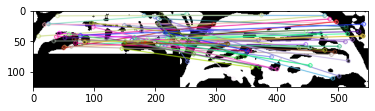

(<matplotlib.image.AxesImage at 0x22c9ac3e898>, None)

In [18]:

# read images
img1 = cv2.imread('C:/SIFT/forhead/s1/1_P1_S1_2.jpg')  
img2 = cv2.imread('C:/SIFT/forhead/s2/1_P1_S2_2.jpg') 
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#kaze
#performing normalization of the images data min max normailzation
img1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = cv2.GaussianBlur(img1,(5,5),2)
img1 = cv2.medianBlur(img1,3) 
img1 = cv2.bilateralFilter(img1,7,100,100)
img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
######################################################################################3
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#gaussian blur
img2 = cv2.GaussianBlur(img2,(5,5),2)
img2 = cv2.medianBlur(img2,3)
img2 = cv2.bilateralFilter(img2,7,100,100) 
img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
                ################################################################################################
    # detect and compute keypoints and descriptors
kaze = cv2.KAZE_create()
keypoints_1, descriptors_1 = kaze.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = kaze.detectAndCompute(img2,None)
#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()

In [4]:
# file to store the results
file1 = open("KAZE.txt", "w")
#path 1 for session1 and path 2 for session 2
#resized data of 512x512 used
path1 = 'C:/SIFT/forhead/s1'
path2 = 'C:/SIFT/forhead/s2'
#initialize the kaze detector
kaze = cv2.KAZE_create()
#bruteforce matches
bf = cv2.BFMatcher()
for images in natsorted(os.listdir(path1)):
    str1 = str(images)
    img1 = os.path.join(path1, images)
    #path for images from session 1
    img1 = cv2.imread(img1)
    #performing normalization of the images data min max normailzation
    img1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.GaussianBlur(img1,(5,5),2)
    img1 = cv2.medianBlur(img1,3) 
    img1 = cv2.bilateralFilter(img1,7,100,100)
    img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
    # detect and compute keypoints and descriptors
    kp1, des1 = kaze.detectAndCompute(img1,None)
    if len(kp1)>0:
        for image in natsorted(os.listdir(path2)):
            img2 = os.path.join(path2, image)
            str2 = str(image)
            if (img1 != img2): # queryImage
                
                
                img2 = cv2.imread(img2) # trainImage
                # normalizing the train image
                img2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
                
                ######################################################################################3
                img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
                #gaussian blur
                img2 = cv2.GaussianBlur(img2,(5,5),2)
                img2 = cv2.medianBlur(img2,3)
                img2 = cv2.bilateralFilter(img2,7,100,100) 
                img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 3)
                ################################################################################################
                
                
                #keypoints and the descriptors of the second image
                kp2, des2 = kaze.detectAndCompute(img2,None)
                if len(kp2) == 0:
                    continue
                matches = bf.knnMatch(des1,des2, k=2)
                dis = bf.match(des1,des2)
            #----------------------------------------------
                number_keypoints = 0
                if len(kp1) <= len(kp2):
                    number_keypoints = len(kp1)
                else:
                    number_keypoints = len(kp2)
                good = []
                for v in matches:
                    if len(v) < 2:
                        continue
                    else:
                        m,n = v
                        if m.distance < 0.7*n.distance:
                            good.append([m])
                score = len(good) / number_keypoints
                file1.write( str1 + " " + str2 + " " + str(score)+"\n")
                print(str1 + " " + str2 + " " + str(score))
file1.close()


C:\Users\Ishu\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


1_P1_S1_1.jpg 1_P1_S2_1.jpg 0.015873015873015872
1_P1_S1_1.jpg 1_P1_S2_2.jpg 0.027777777777777776
1_P1_S1_1.jpg 1_P1_S2_3.jpg 0.007936507936507936
1_P1_S1_1.jpg 1_P2_S2_1.jpg 0.011904761904761904
1_P1_S1_1.jpg 1_P2_S2_2.jpg 0.007936507936507936
1_P1_S1_1.jpg 1_P2_S2_3.jpg 0.011904761904761904
1_P1_S1_1.jpg 2_P1_S2_1.jpg 0.011904761904761904
1_P1_S1_1.jpg 2_P1_S2_2.jpg 0.003968253968253968
1_P1_S1_1.jpg 2_P1_S2_3.jpg 0.00816326530612245
1_P1_S1_1.jpg 2_P2_S2_1.jpg 0.015873015873015872
1_P1_S1_1.jpg 2_P2_S2_2.jpg 0.003968253968253968
1_P1_S1_1.jpg 2_P2_S2_3.jpg 0.015873015873015872
1_P1_S1_1.jpg 3_P1_S2_1.jpg 0.007936507936507936
1_P1_S1_1.jpg 3_P1_S2_2.jpg 0.011904761904761904
1_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
1_P1_S1_1.jpg 3_P2_S2_1.jpg 0.007936507936507936
1_P1_S1_1.jpg 3_P2_S2_2.jpg 0.027777777777777776
1_P1_S1_1.jpg 3_P2_S2_3.jpg 0.011904761904761904
1_P1_S1_1.jpg 4_P1_S2_1.jpg 0.015873015873015872
1_P1_S1_1.jpg 4_P1_S2_2.jpg 0.023809523809523808
1_P1_S1_1.jpg 4_P1_S2_3.jpg 0.02380952

1_P1_S1_2.jpg 2_P2_S2_1.jpg 0.014705882352941176
1_P1_S1_2.jpg 2_P2_S2_2.jpg 0.014705882352941176
1_P1_S1_2.jpg 2_P2_S2_3.jpg 0.0196078431372549
1_P1_S1_2.jpg 3_P1_S2_1.jpg 0.029411764705882353
1_P1_S1_2.jpg 3_P1_S2_2.jpg 0.014705882352941176
1_P1_S1_2.jpg 3_P1_S2_3.jpg 0.014705882352941176
1_P1_S1_2.jpg 3_P2_S2_1.jpg 0.0196078431372549
1_P1_S1_2.jpg 3_P2_S2_2.jpg 0.004901960784313725
1_P1_S1_2.jpg 3_P2_S2_3.jpg 0.004901960784313725
1_P1_S1_2.jpg 4_P1_S2_1.jpg 0.014705882352941176
1_P1_S1_2.jpg 4_P1_S2_2.jpg 0.0196078431372549
1_P1_S1_2.jpg 4_P1_S2_3.jpg 0.004901960784313725
1_P1_S1_2.jpg 4_P2_S2_1.jpg 0.00980392156862745
1_P1_S1_2.jpg 4_P2_S2_2.jpg 0.00980392156862745
1_P1_S1_2.jpg 4_P2_S2_3.jpg 0.014705882352941176
1_P1_S1_2.jpg 5_P1_S2_1.jpg 0.00980392156862745
1_P1_S1_2.jpg 5_P1_S2_2.jpg 0.014705882352941176
1_P1_S1_2.jpg 5_P1_S2_3.jpg 0.0
1_P1_S1_2.jpg 5_P2_S2_1.jpg 0.004901960784313725
1_P1_S1_2.jpg 5_P2_S2_2.jpg 0.004901960784313725
1_P1_S1_2.jpg 5_P2_S2_3.jpg 0.0098039215686274

1_P1_S1_3.jpg 4_P1_S2_3.jpg 0.007905138339920948
1_P1_S1_3.jpg 4_P2_S2_1.jpg 0.011857707509881422
1_P1_S1_3.jpg 4_P2_S2_2.jpg 0.023715415019762844
1_P1_S1_3.jpg 4_P2_S2_3.jpg 0.023715415019762844
1_P1_S1_3.jpg 5_P1_S2_1.jpg 0.0
1_P1_S1_3.jpg 5_P1_S2_2.jpg 0.011857707509881422
1_P1_S1_3.jpg 5_P1_S2_3.jpg 0.011857707509881422
1_P1_S1_3.jpg 5_P2_S2_1.jpg 0.015810276679841896
1_P1_S1_3.jpg 5_P2_S2_2.jpg 0.007905138339920948
1_P1_S1_3.jpg 5_P2_S2_3.jpg 0.007905138339920948
1_P1_S1_3.jpg 6_P1_S2_1.jpg 0.011857707509881422
1_P1_S1_3.jpg 6_P1_S2_2.jpg 0.011857707509881422
1_P1_S1_3.jpg 6_P1_S2_3.jpg 0.019762845849802372
1_P1_S1_3.jpg 6_P2_S2_1.jpg 0.011857707509881422
1_P1_S1_3.jpg 6_P2_S2_2.jpg 0.019762845849802372
1_P1_S1_3.jpg 6_P2_S2_3.jpg 0.007905138339920948
1_P1_S1_3.jpg 7_P1_S2_1.jpg 0.011857707509881422
1_P1_S1_3.jpg 7_P1_S2_2.jpg 0.007905138339920948
1_P1_S1_3.jpg 7_P1_S2_3.jpg 0.03557312252964427
1_P1_S1_3.jpg 7_P2_S2_1.jpg 0.007905138339920948
1_P1_S1_3.jpg 7_P2_S2_2.jpg 0.01976284

1_P2_S1_1.jpg 4_P2_S2_2.jpg 0.00997506234413965
1_P2_S1_1.jpg 4_P2_S2_3.jpg 0.015170670037926675
1_P2_S1_1.jpg 5_P1_S2_1.jpg 0.004987531172069825
1_P2_S1_1.jpg 5_P1_S2_2.jpg 0.00997506234413965
1_P2_S1_1.jpg 5_P1_S2_3.jpg 0.008728179551122194
1_P2_S1_1.jpg 5_P2_S2_1.jpg 0.007481296758104738
1_P2_S1_1.jpg 5_P2_S2_2.jpg 0.006234413965087282
1_P2_S1_1.jpg 5_P2_S2_3.jpg 0.0012468827930174563
1_P2_S1_1.jpg 6_P1_S2_1.jpg 0.01461038961038961
1_P2_S1_1.jpg 6_P1_S2_2.jpg 0.01201923076923077
1_P2_S1_1.jpg 6_P1_S2_3.jpg 0.013927576601671309
1_P2_S1_1.jpg 6_P2_S2_1.jpg 0.00997506234413965
1_P2_S1_1.jpg 6_P2_S2_2.jpg 0.011221945137157107
1_P2_S1_1.jpg 6_P2_S2_3.jpg 0.007481296758104738
1_P2_S1_1.jpg 7_P1_S2_1.jpg 0.019933554817275746
1_P2_S1_1.jpg 7_P1_S2_2.jpg 0.02
1_P2_S1_1.jpg 7_P1_S2_3.jpg 0.011221945137157107
1_P2_S1_1.jpg 7_P2_S2_1.jpg 0.011889035667107
1_P2_S1_1.jpg 7_P2_S2_2.jpg 0.006954102920723227
1_P2_S1_1.jpg 7_P2_S2_3.jpg 0.017316017316017316
1_P2_S1_1.jpg 8_P1_S2_1.jpg 0.0173611111111

1_P2_S1_2.jpg 4_P2_S2_2.jpg 0.01939655172413793
1_P2_S1_2.jpg 4_P2_S2_3.jpg 0.015086206896551725
1_P2_S1_2.jpg 5_P1_S2_1.jpg 0.00646551724137931
1_P2_S1_2.jpg 5_P1_S2_2.jpg 0.01293103448275862
1_P2_S1_2.jpg 5_P1_S2_3.jpg 0.008620689655172414
1_P2_S1_2.jpg 5_P2_S2_1.jpg 0.015086206896551725
1_P2_S1_2.jpg 5_P2_S2_2.jpg 0.00646551724137931
1_P2_S1_2.jpg 5_P2_S2_3.jpg 0.017241379310344827
1_P2_S1_2.jpg 6_P1_S2_1.jpg 0.00646551724137931
1_P2_S1_2.jpg 6_P1_S2_2.jpg 0.007211538461538462
1_P2_S1_2.jpg 6_P1_S2_3.jpg 0.013927576601671309
1_P2_S1_2.jpg 6_P2_S2_1.jpg 0.00646551724137931
1_P2_S1_2.jpg 6_P2_S2_2.jpg 0.00646551724137931
1_P2_S1_2.jpg 6_P2_S2_3.jpg 0.015086206896551725
1_P2_S1_2.jpg 7_P1_S2_1.jpg 0.023706896551724137
1_P2_S1_2.jpg 7_P1_S2_2.jpg 0.0022222222222222222
1_P2_S1_2.jpg 7_P1_S2_3.jpg 0.010775862068965518
1_P2_S1_2.jpg 7_P2_S2_1.jpg 0.010775862068965518
1_P2_S1_2.jpg 7_P2_S2_2.jpg 0.021551724137931036
1_P2_S1_2.jpg 7_P2_S2_3.jpg 0.015086206896551725
1_P2_S1_2.jpg 8_P1_S2_1.jp

1_P2_S1_3.jpg 4_P2_S2_2.jpg 0.010558069381598794
1_P2_S1_3.jpg 4_P2_S2_3.jpg 0.010558069381598794
1_P2_S1_3.jpg 5_P1_S2_1.jpg 0.006033182503770739
1_P2_S1_3.jpg 5_P1_S2_2.jpg 0.0030165912518853697
1_P2_S1_3.jpg 5_P1_S2_3.jpg 0.0030165912518853697
1_P2_S1_3.jpg 5_P2_S2_1.jpg 0.010558069381598794
1_P2_S1_3.jpg 5_P2_S2_2.jpg 0.012066365007541479
1_P2_S1_3.jpg 5_P2_S2_3.jpg 0.012066365007541479
1_P2_S1_3.jpg 6_P1_S2_1.jpg 0.016233766233766232
1_P2_S1_3.jpg 6_P1_S2_2.jpg 0.014423076923076924
1_P2_S1_3.jpg 6_P1_S2_3.jpg 0.013927576601671309
1_P2_S1_3.jpg 6_P2_S2_1.jpg 0.013574660633484163
1_P2_S1_3.jpg 6_P2_S2_2.jpg 0.006033182503770739
1_P2_S1_3.jpg 6_P2_S2_3.jpg 0.012066365007541479
1_P2_S1_3.jpg 7_P1_S2_1.jpg 0.014950166112956811
1_P2_S1_3.jpg 7_P1_S2_2.jpg 0.017777777777777778
1_P2_S1_3.jpg 7_P1_S2_3.jpg 0.01809954751131222
1_P2_S1_3.jpg 7_P2_S2_1.jpg 0.013574660633484163
1_P2_S1_3.jpg 7_P2_S2_2.jpg 0.013574660633484163
1_P2_S1_3.jpg 7_P2_S2_3.jpg 0.007541478129713424
1_P2_S1_3.jpg 8_P1_

2_P1_S1_1.jpg 4_P2_S2_3.jpg 0.017699115044247787
2_P1_S1_1.jpg 5_P1_S2_1.jpg 0.007308160779537149
2_P1_S1_1.jpg 5_P1_S2_2.jpg 0.00243605359317905
2_P1_S1_1.jpg 5_P1_S2_3.jpg 0.007308160779537149
2_P1_S1_1.jpg 5_P2_S2_1.jpg 0.008526187576126675
2_P1_S1_1.jpg 5_P2_S2_2.jpg 0.0048721071863581
2_P1_S1_1.jpg 5_P2_S2_3.jpg 0.0097442143727162
2_P1_S1_1.jpg 6_P1_S2_1.jpg 0.012987012987012988
2_P1_S1_1.jpg 6_P1_S2_2.jpg 0.004807692307692308
2_P1_S1_1.jpg 6_P1_S2_3.jpg 0.033426183844011144
2_P1_S1_1.jpg 6_P2_S2_1.jpg 0.015834348355663823
2_P1_S1_1.jpg 6_P2_S2_2.jpg 0.010962241169305725
2_P1_S1_1.jpg 6_P2_S2_3.jpg 0.011002444987775062
2_P1_S1_1.jpg 7_P1_S2_1.jpg 0.011627906976744186
2_P1_S1_1.jpg 7_P1_S2_2.jpg 0.017777777777777778
2_P1_S1_1.jpg 7_P1_S2_3.jpg 0.013398294762484775
2_P1_S1_1.jpg 7_P2_S2_1.jpg 0.01453104359313078
2_P1_S1_1.jpg 7_P2_S2_2.jpg 0.006954102920723227
2_P1_S1_1.jpg 7_P2_S2_3.jpg 0.008658008658008658
2_P1_S1_1.jpg 8_P1_S2_1.jpg 0.017361111111111112
2_P1_S1_1.jpg 8_P1_S2_2.jp

2_P1_S1_2.jpg 4_P2_S2_3.jpg 0.015238095238095238
2_P1_S1_2.jpg 5_P1_S2_1.jpg 0.013333333333333334
2_P1_S1_2.jpg 5_P1_S2_2.jpg 0.0038095238095238095
2_P1_S1_2.jpg 5_P1_S2_3.jpg 0.009523809523809525
2_P1_S1_2.jpg 5_P2_S2_1.jpg 0.009523809523809525
2_P1_S1_2.jpg 5_P2_S2_2.jpg 0.005714285714285714
2_P1_S1_2.jpg 5_P2_S2_3.jpg 0.01904761904761905
2_P1_S1_2.jpg 6_P1_S2_1.jpg 0.007619047619047619
2_P1_S1_2.jpg 6_P1_S2_2.jpg 0.004807692307692308
2_P1_S1_2.jpg 6_P1_S2_3.jpg 0.022284122562674095
2_P1_S1_2.jpg 6_P2_S2_1.jpg 0.017142857142857144
2_P1_S1_2.jpg 6_P2_S2_2.jpg 0.005714285714285714
2_P1_S1_2.jpg 6_P2_S2_3.jpg 0.015238095238095238
2_P1_S1_2.jpg 7_P1_S2_1.jpg 0.0038095238095238095
2_P1_S1_2.jpg 7_P1_S2_2.jpg 0.015555555555555555
2_P1_S1_2.jpg 7_P1_S2_3.jpg 0.0019047619047619048
2_P1_S1_2.jpg 7_P2_S2_1.jpg 0.013333333333333334
2_P1_S1_2.jpg 7_P2_S2_2.jpg 0.0019047619047619048
2_P1_S1_2.jpg 7_P2_S2_3.jpg 0.015238095238095238
2_P1_S1_2.jpg 8_P1_S2_1.jpg 0.034722222222222224
2_P1_S1_2.jpg 8_P

2_P1_S1_3.jpg 4_P2_S2_1.jpg 0.014134275618374558
2_P1_S1_3.jpg 4_P2_S2_2.jpg 0.007067137809187279
2_P1_S1_3.jpg 4_P2_S2_3.jpg 0.01060070671378092
2_P1_S1_3.jpg 5_P1_S2_1.jpg 0.01060070671378092
2_P1_S1_3.jpg 5_P1_S2_2.jpg 0.007067137809187279
2_P1_S1_3.jpg 5_P1_S2_3.jpg 0.0
2_P1_S1_3.jpg 5_P2_S2_1.jpg 0.0035335689045936395
2_P1_S1_3.jpg 5_P2_S2_2.jpg 0.0035335689045936395
2_P1_S1_3.jpg 5_P2_S2_3.jpg 0.014134275618374558
2_P1_S1_3.jpg 6_P1_S2_1.jpg 0.0
2_P1_S1_3.jpg 6_P1_S2_2.jpg 0.0035335689045936395
2_P1_S1_3.jpg 6_P1_S2_3.jpg 0.007067137809187279
2_P1_S1_3.jpg 6_P2_S2_1.jpg 0.01060070671378092
2_P1_S1_3.jpg 6_P2_S2_2.jpg 0.0035335689045936395
2_P1_S1_3.jpg 6_P2_S2_3.jpg 0.0035335689045936395
2_P1_S1_3.jpg 7_P1_S2_1.jpg 0.007067137809187279
2_P1_S1_3.jpg 7_P1_S2_2.jpg 0.0
2_P1_S1_3.jpg 7_P1_S2_3.jpg 0.007067137809187279
2_P1_S1_3.jpg 7_P2_S2_1.jpg 0.007067137809187279
2_P1_S1_3.jpg 7_P2_S2_2.jpg 0.0
2_P1_S1_3.jpg 7_P2_S2_3.jpg 0.0
2_P1_S1_3.jpg 8_P1_S2_1.jpg 0.01060070671378092
2_P1_S

2_P2_S1_1.jpg 5_P2_S2_3.jpg 0.006398537477148081
2_P2_S1_1.jpg 6_P1_S2_1.jpg 0.01461038961038961
2_P2_S1_1.jpg 6_P1_S2_2.jpg 0.016826923076923076
2_P2_S1_1.jpg 6_P1_S2_3.jpg 0.033426183844011144
2_P2_S1_1.jpg 6_P2_S2_1.jpg 0.006398537477148081
2_P2_S1_1.jpg 6_P2_S2_2.jpg 0.005484460694698354
2_P2_S1_1.jpg 6_P2_S2_3.jpg 0.014669926650366748
2_P2_S1_1.jpg 7_P1_S2_1.jpg 0.023255813953488372
2_P2_S1_1.jpg 7_P1_S2_2.jpg 0.022222222222222223
2_P2_S1_1.jpg 7_P1_S2_3.jpg 0.009673518742442563
2_P2_S1_1.jpg 7_P2_S2_1.jpg 0.009247027741083224
2_P2_S1_1.jpg 7_P2_S2_2.jpg 0.019471488178025034
2_P2_S1_1.jpg 7_P2_S2_3.jpg 0.011544011544011544
2_P2_S1_1.jpg 8_P1_S2_1.jpg 0.017361111111111112
2_P2_S1_1.jpg 8_P1_S2_2.jpg 0.01524390243902439
2_P2_S1_1.jpg 8_P1_S2_3.jpg 0.022435897435897436
2_P2_S1_1.jpg 8_P2_S2_1.jpg 0.018518518518518517
2_P2_S1_1.jpg 8_P2_S2_2.jpg 0.0391304347826087
2_P2_S1_1.jpg 8_P2_S2_3.jpg 0.014209591474245116
2_P2_S1_1.jpg 9_P1_S2_1.jpg 0.004545454545454545
2_P2_S1_1.jpg 9_P1_S2_2.

2_P2_S1_2.jpg 5_P2_S2_2.jpg 0.007535795026375283
2_P2_S1_2.jpg 5_P2_S2_3.jpg 0.004357298474945534
2_P2_S1_2.jpg 6_P1_S2_1.jpg 0.003246753246753247
2_P2_S1_2.jpg 6_P1_S2_2.jpg 0.007211538461538462
2_P2_S1_2.jpg 6_P1_S2_3.jpg 0.013927576601671309
2_P2_S1_2.jpg 6_P2_S2_1.jpg 0.005083514887436456
2_P2_S1_2.jpg 6_P2_S2_2.jpg 0.002259036144578313
2_P2_S1_2.jpg 6_P2_S2_3.jpg 0.011002444987775062
2_P2_S1_2.jpg 7_P1_S2_1.jpg 0.006644518272425249
2_P2_S1_2.jpg 7_P1_S2_2.jpg 0.011111111111111112
2_P2_S1_2.jpg 7_P1_S2_3.jpg 0.007255139056831923
2_P2_S1_2.jpg 7_P2_S2_1.jpg 0.013210039630118891
2_P2_S1_2.jpg 7_P2_S2_2.jpg 0.012517385257301807
2_P2_S1_2.jpg 7_P2_S2_3.jpg 0.008658008658008658
2_P2_S1_2.jpg 8_P1_S2_1.jpg 0.013888888888888888
2_P2_S1_2.jpg 8_P1_S2_2.jpg 0.018292682926829267
2_P2_S1_2.jpg 8_P1_S2_3.jpg 0.009615384615384616
2_P2_S1_2.jpg 8_P2_S2_1.jpg 0.013888888888888888
2_P2_S1_2.jpg 8_P2_S2_2.jpg 0.017391304347826087
2_P2_S1_2.jpg 8_P2_S2_3.jpg 0.012433392539964476
2_P2_S1_2.jpg 9_P1_S

2_P2_S1_3.jpg 5_P2_S2_3.jpg 0.013286093888396812
2_P2_S1_3.jpg 6_P1_S2_1.jpg 0.00974025974025974
2_P2_S1_3.jpg 6_P1_S2_2.jpg 0.007211538461538462
2_P2_S1_3.jpg 6_P1_S2_3.jpg 0.008356545961002786
2_P2_S1_3.jpg 6_P2_S2_1.jpg 0.0044286979627989375
2_P2_S1_3.jpg 6_P2_S2_2.jpg 0.002657218777679362
2_P2_S1_3.jpg 6_P2_S2_3.jpg 0.007334963325183374
2_P2_S1_3.jpg 7_P1_S2_1.jpg 0.009966777408637873
2_P2_S1_3.jpg 7_P1_S2_2.jpg 0.022222222222222223
2_P2_S1_3.jpg 7_P1_S2_3.jpg 0.0036275695284159614
2_P2_S1_3.jpg 7_P2_S2_1.jpg 0.013210039630118891
2_P2_S1_3.jpg 7_P2_S2_2.jpg 0.006954102920723227
2_P2_S1_3.jpg 7_P2_S2_3.jpg 0.001443001443001443
2_P2_S1_3.jpg 8_P1_S2_1.jpg 0.013888888888888888
2_P2_S1_3.jpg 8_P1_S2_2.jpg 0.01524390243902439
2_P2_S1_3.jpg 8_P1_S2_3.jpg 0.016025641025641024
2_P2_S1_3.jpg 8_P2_S2_1.jpg 0.006172839506172839
2_P2_S1_3.jpg 8_P2_S2_2.jpg 0.021739130434782608
2_P2_S1_3.jpg 8_P2_S2_3.jpg 0.017761989342806393
2_P2_S1_3.jpg 9_P1_S2_1.jpg 0.0
2_P2_S1_3.jpg 9_P1_S2_2.jpg 0.0118043

3_P1_S1_1.jpg 5_P2_S2_3.jpg 0.01511879049676026
3_P1_S1_1.jpg 6_P1_S2_1.jpg 0.012958963282937365
3_P1_S1_1.jpg 6_P1_S2_2.jpg 0.019230769230769232
3_P1_S1_1.jpg 6_P1_S2_3.jpg 0.03899721448467967
3_P1_S1_1.jpg 6_P2_S2_1.jpg 0.012958963282937365
3_P1_S1_1.jpg 6_P2_S2_2.jpg 0.01079913606911447
3_P1_S1_1.jpg 6_P2_S2_3.jpg 0.017278617710583154
3_P1_S1_1.jpg 7_P1_S2_1.jpg 0.01079913606911447
3_P1_S1_1.jpg 7_P1_S2_2.jpg 0.011111111111111112
3_P1_S1_1.jpg 7_P1_S2_3.jpg 0.017278617710583154
3_P1_S1_1.jpg 7_P2_S2_1.jpg 0.01511879049676026
3_P1_S1_1.jpg 7_P2_S2_2.jpg 0.017278617710583154
3_P1_S1_1.jpg 7_P2_S2_3.jpg 0.012958963282937365
3_P1_S1_1.jpg 8_P1_S2_1.jpg 0.03125
3_P1_S1_1.jpg 8_P1_S2_2.jpg 0.012195121951219513
3_P1_S1_1.jpg 8_P1_S2_3.jpg 0.02564102564102564
3_P1_S1_1.jpg 8_P2_S2_1.jpg 0.0064794816414686825
3_P1_S1_1.jpg 8_P2_S2_2.jpg 0.017391304347826087
3_P1_S1_1.jpg 8_P2_S2_3.jpg 0.02159827213822894
3_P1_S1_1.jpg 9_P1_S2_1.jpg 0.015909090909090907
3_P1_S1_1.jpg 9_P1_S2_2.jpg 0.006479481

3_P1_S1_2.jpg 5_P2_S2_3.jpg 0.019206145966709345
3_P1_S1_2.jpg 6_P1_S2_1.jpg 0.017857142857142856
3_P1_S1_2.jpg 6_P1_S2_2.jpg 0.021634615384615384
3_P1_S1_2.jpg 6_P1_S2_3.jpg 0.04456824512534819
3_P1_S1_2.jpg 6_P2_S2_1.jpg 0.006402048655569782
3_P1_S1_2.jpg 6_P2_S2_2.jpg 0.008962868117797696
3_P1_S1_2.jpg 6_P2_S2_3.jpg 0.008962868117797696
3_P1_S1_2.jpg 7_P1_S2_1.jpg 0.013289036544850499
3_P1_S1_2.jpg 7_P1_S2_2.jpg 0.022222222222222223
3_P1_S1_2.jpg 7_P1_S2_3.jpg 0.020486555697823303
3_P1_S1_2.jpg 7_P2_S2_1.jpg 0.013210039630118891
3_P1_S1_2.jpg 7_P2_S2_2.jpg 0.01808066759388039
3_P1_S1_2.jpg 7_P2_S2_3.jpg 0.025974025974025976
3_P1_S1_2.jpg 8_P1_S2_1.jpg 0.04513888888888889
3_P1_S1_2.jpg 8_P1_S2_2.jpg 0.036585365853658534
3_P1_S1_2.jpg 8_P1_S2_3.jpg 0.041666666666666664
3_P1_S1_2.jpg 8_P2_S2_1.jpg 0.021604938271604937
3_P1_S1_2.jpg 8_P2_S2_2.jpg 0.015217391304347827
3_P1_S1_2.jpg 8_P2_S2_3.jpg 0.017761989342806393
3_P1_S1_2.jpg 9_P1_S2_1.jpg 0.03409090909090909
3_P1_S1_2.jpg 9_P1_S2_2.

3_P1_S1_3.jpg 5_P2_S2_3.jpg 0.01188707280832095
3_P1_S1_3.jpg 6_P1_S2_1.jpg 0.006493506493506494
3_P1_S1_3.jpg 6_P1_S2_2.jpg 0.014423076923076924
3_P1_S1_3.jpg 6_P1_S2_3.jpg 0.019498607242339833
3_P1_S1_3.jpg 6_P2_S2_1.jpg 0.01188707280832095
3_P1_S1_3.jpg 6_P2_S2_2.jpg 0.007429420505200594
3_P1_S1_3.jpg 6_P2_S2_3.jpg 0.010401188707280832
3_P1_S1_3.jpg 7_P1_S2_1.jpg 0.009966777408637873
3_P1_S1_3.jpg 7_P1_S2_2.jpg 0.011111111111111112
3_P1_S1_3.jpg 7_P1_S2_3.jpg 0.008915304606240713
3_P1_S1_3.jpg 7_P2_S2_1.jpg 0.014858841010401188
3_P1_S1_3.jpg 7_P2_S2_2.jpg 0.005943536404160475
3_P1_S1_3.jpg 7_P2_S2_3.jpg 0.014858841010401188
3_P1_S1_3.jpg 8_P1_S2_1.jpg 0.03125
3_P1_S1_3.jpg 8_P1_S2_2.jpg 0.018292682926829267
3_P1_S1_3.jpg 8_P1_S2_3.jpg 0.016025641025641024
3_P1_S1_3.jpg 8_P2_S2_1.jpg 0.009259259259259259
3_P1_S1_3.jpg 8_P2_S2_2.jpg 0.010869565217391304
3_P1_S1_3.jpg 8_P2_S2_3.jpg 0.017761989342806393
3_P1_S1_3.jpg 9_P1_S2_1.jpg 0.01818181818181818
3_P1_S1_3.jpg 9_P1_S2_2.jpg 0.013490

3_P2_S1_1.jpg 5_P2_S2_3.jpg 0.006044905008635579
3_P2_S1_1.jpg 6_P1_S2_1.jpg 0.016233766233766232
3_P2_S1_1.jpg 6_P1_S2_2.jpg 0.019230769230769232
3_P2_S1_1.jpg 6_P1_S2_3.jpg 0.03899721448467967
3_P2_S1_1.jpg 6_P2_S2_1.jpg 0.0069084628670120895
3_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0025906735751295338
3_P2_S1_1.jpg 6_P2_S2_3.jpg 0.011002444987775062
3_P2_S1_1.jpg 7_P1_S2_1.jpg 0.009966777408637873
3_P2_S1_1.jpg 7_P1_S2_2.jpg 0.02666666666666667
3_P2_S1_1.jpg 7_P1_S2_3.jpg 0.009673518742442563
3_P2_S1_1.jpg 7_P2_S2_1.jpg 0.017173051519154558
3_P2_S1_1.jpg 7_P2_S2_2.jpg 0.02086230876216968
3_P2_S1_1.jpg 7_P2_S2_3.jpg 0.01443001443001443
3_P2_S1_1.jpg 8_P1_S2_1.jpg 0.024305555555555556
3_P2_S1_1.jpg 8_P1_S2_2.jpg 0.012195121951219513
3_P2_S1_1.jpg 8_P1_S2_3.jpg 0.019230769230769232
3_P2_S1_1.jpg 8_P2_S2_1.jpg 0.018518518518518517
3_P2_S1_1.jpg 8_P2_S2_2.jpg 0.0391304347826087
3_P2_S1_1.jpg 8_P2_S2_3.jpg 0.028419182948490232
3_P2_S1_1.jpg 9_P1_S2_1.jpg 0.03409090909090909
3_P2_S1_1.jpg 9_P1_S2_2.j

3_P2_S1_2.jpg 5_P2_S2_3.jpg 0.005150214592274678
3_P2_S1_2.jpg 6_P1_S2_1.jpg 0.00974025974025974
3_P2_S1_2.jpg 6_P1_S2_2.jpg 0.016826923076923076
3_P2_S1_2.jpg 6_P1_S2_3.jpg 0.019498607242339833
3_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0068669527896995704
3_P2_S1_2.jpg 6_P2_S2_2.jpg 0.008583690987124463
3_P2_S1_2.jpg 6_P2_S2_3.jpg 0.006112469437652812
3_P2_S1_2.jpg 7_P1_S2_1.jpg 0.0049833887043189366
3_P2_S1_2.jpg 7_P1_S2_2.jpg 0.03111111111111111
3_P2_S1_2.jpg 7_P1_S2_3.jpg 0.0036275695284159614
3_P2_S1_2.jpg 7_P2_S2_1.jpg 0.01453104359313078
3_P2_S1_2.jpg 7_P2_S2_2.jpg 0.019471488178025034
3_P2_S1_2.jpg 7_P2_S2_3.jpg 0.012987012987012988
3_P2_S1_2.jpg 8_P1_S2_1.jpg 0.027777777777777776
3_P2_S1_2.jpg 8_P1_S2_2.jpg 0.01524390243902439
3_P2_S1_2.jpg 8_P1_S2_3.jpg 0.00641025641025641
3_P2_S1_2.jpg 8_P2_S2_1.jpg 0.015432098765432098
3_P2_S1_2.jpg 8_P2_S2_2.jpg 0.01956521739130435
3_P2_S1_2.jpg 8_P2_S2_3.jpg 0.007104795737122558
3_P2_S1_2.jpg 9_P1_S2_1.jpg 0.011363636363636364
3_P2_S1_2.jpg 9_P1_S2_2

3_P2_S1_3.jpg 5_P2_S2_3.jpg 0.008298755186721992
3_P2_S1_3.jpg 6_P1_S2_1.jpg 0.012987012987012988
3_P2_S1_3.jpg 6_P1_S2_2.jpg 0.009615384615384616
3_P2_S1_3.jpg 6_P1_S2_3.jpg 0.016713091922005572
3_P2_S1_3.jpg 6_P2_S2_1.jpg 0.012448132780082987
3_P2_S1_3.jpg 6_P2_S2_2.jpg 0.006915629322268326
3_P2_S1_3.jpg 6_P2_S2_3.jpg 0.011065006915629323
3_P2_S1_3.jpg 7_P1_S2_1.jpg 0.0033222591362126247
3_P2_S1_3.jpg 7_P1_S2_2.jpg 0.008888888888888889
3_P2_S1_3.jpg 7_P1_S2_3.jpg 0.0013831258644536654
3_P2_S1_3.jpg 7_P2_S2_1.jpg 0.011065006915629323
3_P2_S1_3.jpg 7_P2_S2_2.jpg 0.012517385257301807
3_P2_S1_3.jpg 7_P2_S2_3.jpg 0.005772005772005772
3_P2_S1_3.jpg 8_P1_S2_1.jpg 0.010416666666666666
3_P2_S1_3.jpg 8_P1_S2_2.jpg 0.012195121951219513
3_P2_S1_3.jpg 8_P1_S2_3.jpg 0.00641025641025641
3_P2_S1_3.jpg 8_P2_S2_1.jpg 0.013888888888888888
3_P2_S1_3.jpg 8_P2_S2_2.jpg 0.010869565217391304
3_P2_S1_3.jpg 8_P2_S2_3.jpg 0.008880994671403197
3_P2_S1_3.jpg 9_P1_S2_1.jpg 0.025
3_P2_S1_3.jpg 9_P1_S2_2.jpg 0.0202

4_P1_S1_1.jpg 5_P2_S2_3.jpg 0.015105740181268883
4_P1_S1_1.jpg 6_P1_S2_1.jpg 0.012084592145015106
4_P1_S1_1.jpg 6_P1_S2_2.jpg 0.012084592145015106
4_P1_S1_1.jpg 6_P1_S2_3.jpg 0.006042296072507553
4_P1_S1_1.jpg 6_P2_S2_1.jpg 0.01812688821752266
4_P1_S1_1.jpg 6_P2_S2_2.jpg 0.006042296072507553
4_P1_S1_1.jpg 6_P2_S2_3.jpg 0.01812688821752266
4_P1_S1_1.jpg 7_P1_S2_1.jpg 0.00906344410876133
4_P1_S1_1.jpg 7_P1_S2_2.jpg 0.02416918429003021
4_P1_S1_1.jpg 7_P1_S2_3.jpg 0.01812688821752266
4_P1_S1_1.jpg 7_P2_S2_1.jpg 0.00906344410876133
4_P1_S1_1.jpg 7_P2_S2_2.jpg 0.015105740181268883
4_P1_S1_1.jpg 7_P2_S2_3.jpg 0.015105740181268883
4_P1_S1_1.jpg 8_P1_S2_1.jpg 0.017361111111111112
4_P1_S1_1.jpg 8_P1_S2_2.jpg 0.009146341463414634
4_P1_S1_1.jpg 8_P1_S2_3.jpg 0.016025641025641024
4_P1_S1_1.jpg 8_P2_S2_1.jpg 0.015105740181268883
4_P1_S1_1.jpg 8_P2_S2_2.jpg 0.015105740181268883
4_P1_S1_1.jpg 8_P2_S2_3.jpg 0.00906344410876133
4_P1_S1_1.jpg 9_P1_S2_1.jpg 0.015105740181268883
4_P1_S1_1.jpg 9_P1_S2_2.jpg

4_P1_S1_2.jpg 6_P2_S2_1.jpg 0.016877637130801686
4_P1_S1_2.jpg 6_P2_S2_2.jpg 0.014767932489451477
4_P1_S1_2.jpg 6_P2_S2_3.jpg 0.016877637130801686
4_P1_S1_2.jpg 7_P1_S2_1.jpg 0.010548523206751054
4_P1_S1_2.jpg 7_P1_S2_2.jpg 0.02
4_P1_S1_2.jpg 7_P1_S2_3.jpg 0.02109704641350211
4_P1_S1_2.jpg 7_P2_S2_1.jpg 0.014767932489451477
4_P1_S1_2.jpg 7_P2_S2_2.jpg 0.006329113924050633
4_P1_S1_2.jpg 7_P2_S2_3.jpg 0.012658227848101266
4_P1_S1_2.jpg 8_P1_S2_1.jpg 0.024305555555555556
4_P1_S1_2.jpg 8_P1_S2_2.jpg 0.021341463414634148
4_P1_S1_2.jpg 8_P1_S2_3.jpg 0.02564102564102564
4_P1_S1_2.jpg 8_P2_S2_1.jpg 0.010548523206751054
4_P1_S1_2.jpg 8_P2_S2_2.jpg 0.013043478260869565
4_P1_S1_2.jpg 8_P2_S2_3.jpg 0.008438818565400843
4_P1_S1_2.jpg 9_P1_S2_1.jpg 0.011363636363636364
4_P1_S1_2.jpg 9_P1_S2_2.jpg 0.023206751054852322
4_P1_S1_2.jpg 9_P1_S2_3.jpg 0.012658227848101266
4_P1_S1_2.jpg 9_P2_S2_1.jpg 0.012658227848101266
4_P1_S1_2.jpg 9_P2_S2_2.jpg 0.023206751054852322
4_P1_S1_2.jpg 9_P2_S2_3.jpg 0.01265822

4_P1_S1_3.jpg 6_P2_S2_1.jpg 0.017632241813602016
4_P1_S1_3.jpg 6_P2_S2_2.jpg 0.017632241813602016
4_P1_S1_3.jpg 6_P2_S2_3.jpg 0.007556675062972292
4_P1_S1_3.jpg 7_P1_S2_1.jpg 0.007556675062972292
4_P1_S1_3.jpg 7_P1_S2_2.jpg 0.012594458438287154
4_P1_S1_3.jpg 7_P1_S2_3.jpg 0.007556675062972292
4_P1_S1_3.jpg 7_P2_S2_1.jpg 0.017632241813602016
4_P1_S1_3.jpg 7_P2_S2_2.jpg 0.007556675062972292
4_P1_S1_3.jpg 7_P2_S2_3.jpg 0.007556675062972292
4_P1_S1_3.jpg 8_P1_S2_1.jpg 0.006944444444444444
4_P1_S1_3.jpg 8_P1_S2_2.jpg 0.006097560975609756
4_P1_S1_3.jpg 8_P1_S2_3.jpg 0.022435897435897436
4_P1_S1_3.jpg 8_P2_S2_1.jpg 0.015113350125944584
4_P1_S1_3.jpg 8_P2_S2_2.jpg 0.012594458438287154
4_P1_S1_3.jpg 8_P2_S2_3.jpg 0.010075566750629723
4_P1_S1_3.jpg 9_P1_S2_1.jpg 0.015113350125944584
4_P1_S1_3.jpg 9_P1_S2_2.jpg 0.037783375314861464
4_P1_S1_3.jpg 9_P1_S2_3.jpg 0.010075566750629723
4_P1_S1_3.jpg 9_P2_S2_1.jpg 0.022670025188916875
4_P1_S1_3.jpg 9_P2_S2_2.jpg 0.0
4_P1_S1_3.jpg 9_P2_S2_3.jpg 0.0100755

4_P2_S1_1.jpg 6_P1_S2_3.jpg 0.021148036253776436
4_P2_S1_1.jpg 6_P2_S2_1.jpg 0.015105740181268883
4_P2_S1_1.jpg 6_P2_S2_2.jpg 0.006042296072507553
4_P2_S1_1.jpg 6_P2_S2_3.jpg 0.00906344410876133
4_P2_S1_1.jpg 7_P1_S2_1.jpg 0.012084592145015106
4_P2_S1_1.jpg 7_P1_S2_2.jpg 0.01812688821752266
4_P2_S1_1.jpg 7_P1_S2_3.jpg 0.006042296072507553
4_P2_S1_1.jpg 7_P2_S2_1.jpg 0.006042296072507553
4_P2_S1_1.jpg 7_P2_S2_2.jpg 0.012084592145015106
4_P2_S1_1.jpg 7_P2_S2_3.jpg 0.012084592145015106
4_P2_S1_1.jpg 8_P1_S2_1.jpg 0.0
4_P2_S1_1.jpg 8_P1_S2_2.jpg 0.012195121951219513
4_P2_S1_1.jpg 8_P1_S2_3.jpg 0.009615384615384616
4_P2_S1_1.jpg 8_P2_S2_1.jpg 0.021148036253776436
4_P2_S1_1.jpg 8_P2_S2_2.jpg 0.027190332326283987
4_P2_S1_1.jpg 8_P2_S2_3.jpg 0.006042296072507553
4_P2_S1_1.jpg 9_P1_S2_1.jpg 0.027190332326283987
4_P2_S1_1.jpg 9_P1_S2_2.jpg 0.02416918429003021
4_P2_S1_1.jpg 9_P1_S2_3.jpg 0.021148036253776436
4_P2_S1_1.jpg 9_P2_S2_1.jpg 0.015105740181268883
4_P2_S1_1.jpg 9_P2_S2_2.jpg 0.0090634441

4_P2_S1_2.jpg 6_P2_S2_1.jpg 0.0158311345646438
4_P2_S1_2.jpg 6_P2_S2_2.jpg 0.010554089709762533
4_P2_S1_2.jpg 6_P2_S2_3.jpg 0.013192612137203167
4_P2_S1_2.jpg 7_P1_S2_1.jpg 0.005277044854881266
4_P2_S1_2.jpg 7_P1_S2_2.jpg 0.021108179419525065
4_P2_S1_2.jpg 7_P1_S2_3.jpg 0.018469656992084433
4_P2_S1_2.jpg 7_P2_S2_1.jpg 0.013192612137203167
4_P2_S1_2.jpg 7_P2_S2_2.jpg 0.0079155672823219
4_P2_S1_2.jpg 7_P2_S2_3.jpg 0.023746701846965697
4_P2_S1_2.jpg 8_P1_S2_1.jpg 0.010416666666666666
4_P2_S1_2.jpg 8_P1_S2_2.jpg 0.006097560975609756
4_P2_S1_2.jpg 8_P1_S2_3.jpg 0.019230769230769232
4_P2_S1_2.jpg 8_P2_S2_1.jpg 0.021108179419525065
4_P2_S1_2.jpg 8_P2_S2_2.jpg 0.0158311345646438
4_P2_S1_2.jpg 8_P2_S2_3.jpg 0.0079155672823219
4_P2_S1_2.jpg 9_P1_S2_1.jpg 0.0158311345646438
4_P2_S1_2.jpg 9_P1_S2_2.jpg 0.023746701846965697
4_P2_S1_2.jpg 9_P1_S2_3.jpg 0.021108179419525065
4_P2_S1_2.jpg 9_P2_S2_1.jpg 0.0158311345646438
4_P2_S1_2.jpg 9_P2_S2_2.jpg 0.018469656992084433
4_P2_S1_2.jpg 9_P2_S2_3.jpg 0.01

4_P2_S1_3.jpg 6_P2_S2_1.jpg 0.016666666666666666
4_P2_S1_3.jpg 6_P2_S2_2.jpg 0.011904761904761904
4_P2_S1_3.jpg 6_P2_S2_3.jpg 0.016666666666666666
4_P2_S1_3.jpg 7_P1_S2_1.jpg 0.02619047619047619
4_P2_S1_3.jpg 7_P1_S2_2.jpg 0.01904761904761905
4_P2_S1_3.jpg 7_P1_S2_3.jpg 0.030952380952380953
4_P2_S1_3.jpg 7_P2_S2_1.jpg 0.030952380952380953
4_P2_S1_3.jpg 7_P2_S2_2.jpg 0.02142857142857143
4_P2_S1_3.jpg 7_P2_S2_3.jpg 0.023809523809523808
4_P2_S1_3.jpg 8_P1_S2_1.jpg 0.03125
4_P2_S1_3.jpg 8_P1_S2_2.jpg 0.01524390243902439
4_P2_S1_3.jpg 8_P1_S2_3.jpg 0.02564102564102564
4_P2_S1_3.jpg 8_P2_S2_1.jpg 0.02142857142857143
4_P2_S1_3.jpg 8_P2_S2_2.jpg 0.02142857142857143
4_P2_S1_3.jpg 8_P2_S2_3.jpg 0.011904761904761904
4_P2_S1_3.jpg 9_P1_S2_1.jpg 0.011904761904761904
4_P2_S1_3.jpg 9_P1_S2_2.jpg 0.05476190476190476
4_P2_S1_3.jpg 9_P1_S2_3.jpg 0.030952380952380953
4_P2_S1_3.jpg 9_P2_S2_1.jpg 0.016666666666666666
4_P2_S1_3.jpg 9_P2_S2_2.jpg 0.014285714285714285
4_P2_S1_3.jpg 9_P2_S2_3.jpg 0.00952380952

5_P1_S1_1.jpg 6_P2_S2_1.jpg 0.021505376344086023
5_P1_S1_1.jpg 6_P2_S2_2.jpg 0.004301075268817204
5_P1_S1_1.jpg 6_P2_S2_3.jpg 0.034408602150537634
5_P1_S1_1.jpg 7_P1_S2_1.jpg 0.010752688172043012
5_P1_S1_1.jpg 7_P1_S2_2.jpg 0.011111111111111112
5_P1_S1_1.jpg 7_P1_S2_3.jpg 0.017204301075268817
5_P1_S1_1.jpg 7_P2_S2_1.jpg 0.03655913978494624
5_P1_S1_1.jpg 7_P2_S2_2.jpg 0.025806451612903226
5_P1_S1_1.jpg 7_P2_S2_3.jpg 0.015053763440860216
5_P1_S1_1.jpg 8_P1_S2_1.jpg 0.0625
5_P1_S1_1.jpg 8_P1_S2_2.jpg 0.04878048780487805
5_P1_S1_1.jpg 8_P1_S2_3.jpg 0.04487179487179487
5_P1_S1_1.jpg 8_P2_S2_1.jpg 0.03870967741935484
5_P1_S1_1.jpg 8_P2_S2_2.jpg 0.010869565217391304
5_P1_S1_1.jpg 8_P2_S2_3.jpg 0.02795698924731183
5_P1_S1_1.jpg 9_P1_S2_1.jpg 0.013636363636363636
5_P1_S1_1.jpg 9_P1_S2_2.jpg 0.03225806451612903
5_P1_S1_1.jpg 9_P1_S2_3.jpg 0.012903225806451613
5_P1_S1_1.jpg 9_P2_S2_1.jpg 0.017204301075268817
5_P1_S1_1.jpg 9_P2_S2_2.jpg 0.002150537634408602
5_P1_S1_1.jpg 9_P2_S2_3.jpg 0.0021505376

5_P1_S1_2.jpg 6_P2_S2_2.jpg 0.0027662517289073307
5_P1_S1_2.jpg 6_P2_S2_3.jpg 0.012448132780082987
5_P1_S1_2.jpg 7_P1_S2_1.jpg 0.008305647840531562
5_P1_S1_2.jpg 7_P1_S2_2.jpg 0.02
5_P1_S1_2.jpg 7_P1_S2_3.jpg 0.008298755186721992
5_P1_S1_2.jpg 7_P2_S2_1.jpg 0.012448132780082987
5_P1_S1_2.jpg 7_P2_S2_2.jpg 0.015299026425591099
5_P1_S1_2.jpg 7_P2_S2_3.jpg 0.010101010101010102
5_P1_S1_2.jpg 8_P1_S2_1.jpg 0.041666666666666664
5_P1_S1_2.jpg 8_P1_S2_2.jpg 0.04878048780487805
5_P1_S1_2.jpg 8_P1_S2_3.jpg 0.035256410256410256
5_P1_S1_2.jpg 8_P2_S2_1.jpg 0.016975308641975308
5_P1_S1_2.jpg 8_P2_S2_2.jpg 0.01956521739130435
5_P1_S1_2.jpg 8_P2_S2_3.jpg 0.021314387211367674
5_P1_S1_2.jpg 9_P1_S2_1.jpg 0.00909090909090909
5_P1_S1_2.jpg 9_P1_S2_2.jpg 0.02023608768971332
5_P1_S1_2.jpg 9_P1_S2_3.jpg 0.0106951871657754
5_P1_S1_2.jpg 9_P2_S2_1.jpg 0.006915629322268326
5_P1_S1_2.jpg 9_P2_S2_2.jpg 0.011065006915629323
5_P1_S1_2.jpg 9_P2_S2_3.jpg 0.004149377593360996
5_P1_S1_2.jpg 10_P1_S2_1.jpg 0.0
5_P1_S1_

5_P1_S1_3.jpg 6_P2_S2_1.jpg 0.0047789725209080045
5_P1_S1_3.jpg 6_P2_S2_2.jpg 0.005973715651135006
5_P1_S1_3.jpg 6_P2_S2_3.jpg 0.004889975550122249
5_P1_S1_3.jpg 7_P1_S2_1.jpg 0.018272425249169437
5_P1_S1_3.jpg 7_P1_S2_2.jpg 0.035555555555555556
5_P1_S1_3.jpg 7_P1_S2_3.jpg 0.006045949214026602
5_P1_S1_3.jpg 7_P2_S2_1.jpg 0.011889035667107
5_P1_S1_3.jpg 7_P2_S2_2.jpg 0.011126564673157162
5_P1_S1_3.jpg 7_P2_S2_3.jpg 0.007215007215007215
5_P1_S1_3.jpg 8_P1_S2_1.jpg 0.010416666666666666
5_P1_S1_3.jpg 8_P1_S2_2.jpg 0.009146341463414634
5_P1_S1_3.jpg 8_P1_S2_3.jpg 0.019230769230769232
5_P1_S1_3.jpg 8_P2_S2_1.jpg 0.009259259259259259
5_P1_S1_3.jpg 8_P2_S2_2.jpg 0.008695652173913044
5_P1_S1_3.jpg 8_P2_S2_3.jpg 0.007104795737122558
5_P1_S1_3.jpg 9_P1_S2_1.jpg 0.022727272727272728
5_P1_S1_3.jpg 9_P1_S2_2.jpg 0.01854974704890388
5_P1_S1_3.jpg 9_P1_S2_3.jpg 0.0053475935828877
5_P1_S1_3.jpg 9_P2_S2_1.jpg 0.010752688172043012
5_P1_S1_3.jpg 9_P2_S2_2.jpg 0.007168458781362007
5_P1_S1_3.jpg 9_P2_S2_3.j

5_P2_S1_1.jpg 6_P2_S2_1.jpg 0.00702576112412178
5_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0078064012490242
5_P2_S1_1.jpg 6_P2_S2_3.jpg 0.017114914425427872
5_P2_S1_1.jpg 7_P1_S2_1.jpg 0.014950166112956811
5_P2_S1_1.jpg 7_P1_S2_2.jpg 0.044444444444444446
5_P2_S1_1.jpg 7_P1_S2_3.jpg 0.022974607013301087
5_P2_S1_1.jpg 7_P2_S2_1.jpg 0.02906208718626156
5_P2_S1_1.jpg 7_P2_S2_2.jpg 0.02364394993045897
5_P2_S1_1.jpg 7_P2_S2_3.jpg 0.027417027417027416
5_P2_S1_1.jpg 8_P1_S2_1.jpg 0.020833333333333332
5_P2_S1_1.jpg 8_P1_S2_2.jpg 0.024390243902439025
5_P2_S1_1.jpg 8_P1_S2_3.jpg 0.019230769230769232
5_P2_S1_1.jpg 8_P2_S2_1.jpg 0.021604938271604937
5_P2_S1_1.jpg 8_P2_S2_2.jpg 0.030434782608695653
5_P2_S1_1.jpg 8_P2_S2_3.jpg 0.023090586145648313
5_P2_S1_1.jpg 9_P1_S2_1.jpg 0.03409090909090909
5_P2_S1_1.jpg 9_P1_S2_2.jpg 0.03204047217537943
5_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0142602495543672
5_P2_S1_1.jpg 9_P2_S2_1.jpg 0.0078064012490242
5_P2_S1_1.jpg 9_P2_S2_2.jpg 0.013675213675213675
5_P2_S1_1.jpg 9_P2_S2_3.jpg 0.0

5_P2_S1_2.jpg 6_P2_S2_1.jpg 0.006060606060606061
5_P2_S1_2.jpg 6_P2_S2_2.jpg 0.007792207792207792
5_P2_S1_2.jpg 6_P2_S2_3.jpg 0.014669926650366748
5_P2_S1_2.jpg 7_P1_S2_1.jpg 0.02159468438538206
5_P2_S1_2.jpg 7_P1_S2_2.jpg 0.03111111111111111
5_P2_S1_2.jpg 7_P1_S2_3.jpg 0.016928657799274487
5_P2_S1_2.jpg 7_P2_S2_1.jpg 0.03038309114927345
5_P2_S1_2.jpg 7_P2_S2_2.jpg 0.009735744089012517
5_P2_S1_2.jpg 7_P2_S2_3.jpg 0.030303030303030304
5_P2_S1_2.jpg 8_P1_S2_1.jpg 0.03819444444444445
5_P2_S1_2.jpg 8_P1_S2_2.jpg 0.03048780487804878
5_P2_S1_2.jpg 8_P1_S2_3.jpg 0.03205128205128205
5_P2_S1_2.jpg 8_P2_S2_1.jpg 0.006172839506172839
5_P2_S1_2.jpg 8_P2_S2_2.jpg 0.02826086956521739
5_P2_S1_2.jpg 8_P2_S2_3.jpg 0.012433392539964476
5_P2_S1_2.jpg 9_P1_S2_1.jpg 0.00909090909090909
5_P2_S1_2.jpg 9_P1_S2_2.jpg 0.00505902192242833
5_P2_S1_2.jpg 9_P1_S2_3.jpg 0.0106951871657754
5_P2_S1_2.jpg 9_P2_S2_1.jpg 0.009523809523809525
5_P2_S1_2.jpg 9_P2_S2_2.jpg 0.006926406926406926
5_P2_S1_2.jpg 9_P2_S2_3.jpg 0.0

5_P2_S1_3.jpg 6_P2_S2_1.jpg 0.0056179775280898875
5_P2_S1_3.jpg 6_P2_S2_2.jpg 0.011295180722891566
5_P2_S1_3.jpg 6_P2_S2_3.jpg 0.023227383863080684
5_P2_S1_3.jpg 7_P1_S2_1.jpg 0.023255813953488372
5_P2_S1_3.jpg 7_P1_S2_2.jpg 0.017777777777777778
5_P2_S1_3.jpg 7_P1_S2_3.jpg 0.007255139056831923
5_P2_S1_3.jpg 7_P2_S2_1.jpg 0.018494055482166448
5_P2_S1_3.jpg 7_P2_S2_2.jpg 0.011126564673157162
5_P2_S1_3.jpg 7_P2_S2_3.jpg 0.012987012987012988
5_P2_S1_3.jpg 8_P1_S2_1.jpg 0.03125
5_P2_S1_3.jpg 8_P1_S2_2.jpg 0.039634146341463415
5_P2_S1_3.jpg 8_P1_S2_3.jpg 0.022435897435897436
5_P2_S1_3.jpg 8_P2_S2_1.jpg 0.013888888888888888
5_P2_S1_3.jpg 8_P2_S2_2.jpg 0.010869565217391304
5_P2_S1_3.jpg 8_P2_S2_3.jpg 0.021314387211367674
5_P2_S1_3.jpg 9_P1_S2_1.jpg 0.01818181818181818
5_P2_S1_3.jpg 9_P1_S2_2.jpg 0.013490725126475547
5_P2_S1_3.jpg 9_P1_S2_3.jpg 0.017825311942959002
5_P2_S1_3.jpg 9_P2_S2_1.jpg 0.004791238877481177
5_P2_S1_3.jpg 9_P2_S2_2.jpg 0.005982905982905983
5_P2_S1_3.jpg 9_P2_S2_3.jpg 0.008

6_P1_S1_1.jpg 6_P1_S2_3.jpg 0.01910828025477707
6_P1_S1_1.jpg 6_P2_S2_1.jpg 0.009554140127388535
6_P1_S1_1.jpg 6_P2_S2_2.jpg 0.012738853503184714
6_P1_S1_1.jpg 6_P2_S2_3.jpg 0.012738853503184714
6_P1_S1_1.jpg 7_P1_S2_1.jpg 0.009554140127388535
6_P1_S1_1.jpg 7_P1_S2_2.jpg 0.009554140127388535
6_P1_S1_1.jpg 7_P1_S2_3.jpg 0.009554140127388535
6_P1_S1_1.jpg 7_P2_S2_1.jpg 0.012738853503184714
6_P1_S1_1.jpg 7_P2_S2_2.jpg 0.041401273885350316
6_P1_S1_1.jpg 7_P2_S2_3.jpg 0.009554140127388535
6_P1_S1_1.jpg 8_P1_S2_1.jpg 0.010416666666666666
6_P1_S1_1.jpg 8_P1_S2_2.jpg 0.025477707006369428
6_P1_S1_1.jpg 8_P1_S2_3.jpg 0.009615384615384616
6_P1_S1_1.jpg 8_P2_S2_1.jpg 0.03503184713375796
6_P1_S1_1.jpg 8_P2_S2_2.jpg 0.01592356687898089
6_P1_S1_1.jpg 8_P2_S2_3.jpg 0.01910828025477707
6_P1_S1_1.jpg 9_P1_S2_1.jpg 0.0031847133757961785
6_P1_S1_1.jpg 9_P1_S2_2.jpg 0.01910828025477707
6_P1_S1_1.jpg 9_P1_S2_3.jpg 0.012738853503184714
6_P1_S1_1.jpg 9_P2_S2_1.jpg 0.01592356687898089
6_P1_S1_1.jpg 9_P2_S2_2.j

6_P1_S1_2.jpg 6_P2_S2_1.jpg 0.006493506493506494
6_P1_S1_2.jpg 6_P2_S2_2.jpg 0.010822510822510822
6_P1_S1_2.jpg 6_P2_S2_3.jpg 0.012987012987012988
6_P1_S1_2.jpg 7_P1_S2_1.jpg 0.004329004329004329
6_P1_S1_2.jpg 7_P1_S2_2.jpg 0.013333333333333334
6_P1_S1_2.jpg 7_P1_S2_3.jpg 0.012987012987012988
6_P1_S1_2.jpg 7_P2_S2_1.jpg 0.004329004329004329
6_P1_S1_2.jpg 7_P2_S2_2.jpg 0.006493506493506494
6_P1_S1_2.jpg 7_P2_S2_3.jpg 0.017316017316017316
6_P1_S1_2.jpg 8_P1_S2_1.jpg 0.006944444444444444
6_P1_S1_2.jpg 8_P1_S2_2.jpg 0.006097560975609756
6_P1_S1_2.jpg 8_P1_S2_3.jpg 0.00641025641025641
6_P1_S1_2.jpg 8_P2_S2_1.jpg 0.010822510822510822
6_P1_S1_2.jpg 8_P2_S2_2.jpg 0.006521739130434782
6_P1_S1_2.jpg 8_P2_S2_3.jpg 0.006493506493506494
6_P1_S1_2.jpg 9_P1_S2_1.jpg 0.006818181818181818
6_P1_S1_2.jpg 9_P1_S2_2.jpg 0.021645021645021644
6_P1_S1_2.jpg 9_P1_S2_3.jpg 0.006493506493506494
6_P1_S1_2.jpg 9_P2_S2_1.jpg 0.017316017316017316
6_P1_S1_2.jpg 9_P2_S2_2.jpg 0.004329004329004329
6_P1_S1_2.jpg 9_P2_S2

6_P1_S1_3.jpg 6_P2_S2_1.jpg 0.025547445255474453
6_P1_S1_3.jpg 6_P2_S2_2.jpg 0.046228710462287104
6_P1_S1_3.jpg 6_P2_S2_3.jpg 0.029339853300733496
6_P1_S1_3.jpg 7_P1_S2_1.jpg 0.008305647840531562
6_P1_S1_3.jpg 7_P1_S2_2.jpg 0.008888888888888889
6_P1_S1_3.jpg 7_P1_S2_3.jpg 0.010948905109489052
6_P1_S1_3.jpg 7_P2_S2_1.jpg 0.009247027741083224
6_P1_S1_3.jpg 7_P2_S2_2.jpg 0.0027816411682892906
6_P1_S1_3.jpg 7_P2_S2_3.jpg 0.010101010101010102
6_P1_S1_3.jpg 8_P1_S2_1.jpg 0.017361111111111112
6_P1_S1_3.jpg 8_P1_S2_2.jpg 0.021341463414634148
6_P1_S1_3.jpg 8_P1_S2_3.jpg 0.028846153846153848
6_P1_S1_3.jpg 8_P2_S2_1.jpg 0.009259259259259259
6_P1_S1_3.jpg 8_P2_S2_2.jpg 0.015217391304347827
6_P1_S1_3.jpg 8_P2_S2_3.jpg 0.015985790408525755
6_P1_S1_3.jpg 9_P1_S2_1.jpg 0.015909090909090907
6_P1_S1_3.jpg 9_P1_S2_2.jpg 0.01011804384485666
6_P1_S1_3.jpg 9_P1_S2_3.jpg 0.0071301247771836
6_P1_S1_3.jpg 9_P2_S2_1.jpg 0.012165450121654502
6_P1_S1_3.jpg 9_P2_S2_2.jpg 0.0024330900243309003
6_P1_S1_3.jpg 9_P2_S2

6_P2_S1_1.jpg 6_P2_S2_1.jpg 0.009970089730807577
6_P2_S1_1.jpg 6_P2_S2_2.jpg 0.003988035892323031
6_P2_S1_1.jpg 6_P2_S2_3.jpg 0.007334963325183374
6_P2_S1_1.jpg 7_P1_S2_1.jpg 0.013289036544850499
6_P2_S1_1.jpg 7_P1_S2_2.jpg 0.008888888888888889
6_P2_S1_1.jpg 7_P1_S2_3.jpg 0.008464328899637243
6_P2_S1_1.jpg 7_P2_S2_1.jpg 0.011889035667107
6_P2_S1_1.jpg 7_P2_S2_2.jpg 0.008344923504867872
6_P2_S1_1.jpg 7_P2_S2_3.jpg 0.005772005772005772
6_P2_S1_1.jpg 8_P1_S2_1.jpg 0.03125
6_P2_S1_1.jpg 8_P1_S2_2.jpg 0.03353658536585366
6_P2_S1_1.jpg 8_P1_S2_3.jpg 0.035256410256410256
6_P2_S1_1.jpg 8_P2_S2_1.jpg 0.004629629629629629
6_P2_S1_1.jpg 8_P2_S2_2.jpg 0.02391304347826087
6_P2_S1_1.jpg 8_P2_S2_3.jpg 0.010657193605683837
6_P2_S1_1.jpg 9_P1_S2_1.jpg 0.020454545454545454
6_P2_S1_1.jpg 9_P1_S2_2.jpg 0.01517706576728499
6_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0106951871657754
6_P2_S1_1.jpg 9_P2_S2_1.jpg 0.004985044865403789
6_P2_S1_1.jpg 9_P2_S2_2.jpg 0.007976071784646061
6_P2_S1_1.jpg 9_P2_S2_3.jpg 0.00697906281

6_P2_S1_2.jpg 6_P2_S2_1.jpg 0.042837078651685394
6_P2_S1_2.jpg 6_P2_S2_2.jpg 0.039909638554216864
6_P2_S1_2.jpg 6_P2_S2_3.jpg 0.009779951100244499
6_P2_S1_2.jpg 7_P1_S2_1.jpg 0.02823920265780731
6_P2_S1_2.jpg 7_P1_S2_2.jpg 0.035555555555555556
6_P2_S1_2.jpg 7_P1_S2_3.jpg 0.016928657799274487
6_P2_S1_2.jpg 7_P2_S2_1.jpg 0.013210039630118891
6_P2_S1_2.jpg 7_P2_S2_2.jpg 0.01808066759388039
6_P2_S1_2.jpg 7_P2_S2_3.jpg 0.008658008658008658
6_P2_S1_2.jpg 8_P1_S2_1.jpg 0.027777777777777776
6_P2_S1_2.jpg 8_P1_S2_2.jpg 0.027439024390243903
6_P2_S1_2.jpg 8_P1_S2_3.jpg 0.02564102564102564
6_P2_S1_2.jpg 8_P2_S2_1.jpg 0.009259259259259259
6_P2_S1_2.jpg 8_P2_S2_2.jpg 0.02826086956521739
6_P2_S1_2.jpg 8_P2_S2_3.jpg 0.014209591474245116
6_P2_S1_2.jpg 9_P1_S2_1.jpg 0.013636363636363636
6_P2_S1_2.jpg 9_P1_S2_2.jpg 0.03035413153456998
6_P2_S1_2.jpg 9_P1_S2_3.jpg 0.017825311942959002
6_P2_S1_2.jpg 9_P2_S2_1.jpg 0.0054757015742642025
6_P2_S1_2.jpg 9_P2_S2_2.jpg 0.005128205128205128
6_P2_S1_2.jpg 9_P2_S2_3.

6_P2_S1_3.jpg 6_P2_S2_1.jpg 0.03300561797752809
6_P2_S1_3.jpg 6_P2_S2_2.jpg 0.03162650602409638
6_P2_S1_3.jpg 6_P2_S2_3.jpg 0.01589242053789731
6_P2_S1_3.jpg 7_P1_S2_1.jpg 0.023255813953488372
6_P2_S1_3.jpg 7_P1_S2_2.jpg 0.05555555555555555
6_P2_S1_3.jpg 7_P1_S2_3.jpg 0.019347037484885126
6_P2_S1_3.jpg 7_P2_S2_1.jpg 0.019815059445178335
6_P2_S1_3.jpg 7_P2_S2_2.jpg 0.02364394993045897
6_P2_S1_3.jpg 7_P2_S2_3.jpg 0.02886002886002886
6_P2_S1_3.jpg 8_P1_S2_1.jpg 0.020833333333333332
6_P2_S1_3.jpg 8_P1_S2_2.jpg 0.036585365853658534
6_P2_S1_3.jpg 8_P1_S2_3.jpg 0.05128205128205128
6_P2_S1_3.jpg 8_P2_S2_1.jpg 0.030864197530864196
6_P2_S1_3.jpg 8_P2_S2_2.jpg 0.043478260869565216
6_P2_S1_3.jpg 8_P2_S2_3.jpg 0.023090586145648313
6_P2_S1_3.jpg 9_P1_S2_1.jpg 0.04772727272727273
6_P2_S1_3.jpg 9_P1_S2_2.jpg 0.026981450252951095
6_P2_S1_3.jpg 9_P1_S2_3.jpg 0.023172905525846704
6_P2_S1_3.jpg 9_P2_S2_1.jpg 0.010951403148528405
6_P2_S1_3.jpg 9_P2_S2_2.jpg 0.015384615384615385
6_P2_S1_3.jpg 9_P2_S2_3.jpg 

7_P1_S1_1.jpg 6_P2_S2_1.jpg 0.01651376146788991
7_P1_S1_1.jpg 6_P2_S2_2.jpg 0.005504587155963303
7_P1_S1_1.jpg 6_P2_S2_3.jpg 0.02018348623853211
7_P1_S1_1.jpg 7_P1_S2_1.jpg 0.02018348623853211
7_P1_S1_1.jpg 7_P1_S2_2.jpg 0.022222222222222223
7_P1_S1_1.jpg 7_P1_S2_3.jpg 0.014678899082568808
7_P1_S1_1.jpg 7_P2_S2_1.jpg 0.022018348623853212
7_P1_S1_1.jpg 7_P2_S2_2.jpg 0.014678899082568808
7_P1_S1_1.jpg 7_P2_S2_3.jpg 0.012844036697247707
7_P1_S1_1.jpg 8_P1_S2_1.jpg 0.020833333333333332
7_P1_S1_1.jpg 8_P1_S2_2.jpg 0.012195121951219513
7_P1_S1_1.jpg 8_P1_S2_3.jpg 0.022435897435897436
7_P1_S1_1.jpg 8_P2_S2_1.jpg 0.014678899082568808
7_P1_S1_1.jpg 8_P2_S2_2.jpg 0.008695652173913044
7_P1_S1_1.jpg 8_P2_S2_3.jpg 0.014678899082568808
7_P1_S1_1.jpg 9_P1_S2_1.jpg 0.00909090909090909
7_P1_S1_1.jpg 9_P1_S2_2.jpg 0.023853211009174313
7_P1_S1_1.jpg 9_P1_S2_3.jpg 0.014678899082568808
7_P1_S1_1.jpg 9_P2_S2_1.jpg 0.01834862385321101
7_P1_S1_1.jpg 9_P2_S2_2.jpg 0.003669724770642202
7_P1_S1_1.jpg 9_P2_S2_3.j

7_P1_S1_2.jpg 6_P1_S2_2.jpg 0.009615384615384616
7_P1_S1_2.jpg 6_P1_S2_3.jpg 0.027855153203342618
7_P1_S1_2.jpg 6_P2_S2_1.jpg 0.03285420944558522
7_P1_S1_2.jpg 6_P2_S2_2.jpg 0.01642710472279261
7_P1_S1_2.jpg 6_P2_S2_3.jpg 0.014373716632443531
7_P1_S1_2.jpg 7_P1_S2_1.jpg 0.014373716632443531
7_P1_S1_2.jpg 7_P1_S2_2.jpg 0.04
7_P1_S1_2.jpg 7_P1_S2_3.jpg 0.022587268993839837
7_P1_S1_2.jpg 7_P2_S2_1.jpg 0.03285420944558522
7_P1_S1_2.jpg 7_P2_S2_2.jpg 0.008213552361396304
7_P1_S1_2.jpg 7_P2_S2_3.jpg 0.024640657084188913
7_P1_S1_2.jpg 8_P1_S2_1.jpg 0.017361111111111112
7_P1_S1_2.jpg 8_P1_S2_2.jpg 0.01524390243902439
7_P1_S1_2.jpg 8_P1_S2_3.jpg 0.038461538461538464
7_P1_S1_2.jpg 8_P2_S2_1.jpg 0.024640657084188913
7_P1_S1_2.jpg 8_P2_S2_2.jpg 0.02608695652173913
7_P1_S1_2.jpg 8_P2_S2_3.jpg 0.012320328542094456
7_P1_S1_2.jpg 9_P1_S2_1.jpg 0.01818181818181818
7_P1_S1_2.jpg 9_P1_S2_2.jpg 0.03696098562628337
7_P1_S1_2.jpg 9_P1_S2_3.jpg 0.008213552361396304
7_P1_S1_2.jpg 9_P2_S2_1.jpg 0.0061601642710

7_P1_S1_3.jpg 6_P1_S2_2.jpg 0.016826923076923076
7_P1_S1_3.jpg 6_P1_S2_3.jpg 0.025069637883008356
7_P1_S1_3.jpg 6_P2_S2_1.jpg 0.001755926251097454
7_P1_S1_3.jpg 6_P2_S2_2.jpg 0.009657594381035996
7_P1_S1_3.jpg 6_P2_S2_3.jpg 0.008557457212713936
7_P1_S1_3.jpg 7_P1_S2_1.jpg 0.009966777408637873
7_P1_S1_3.jpg 7_P1_S2_2.jpg 0.022222222222222223
7_P1_S1_3.jpg 7_P1_S2_3.jpg 0.03385731559854897
7_P1_S1_3.jpg 7_P2_S2_1.jpg 0.023778071334214
7_P1_S1_3.jpg 7_P2_S2_2.jpg 0.012517385257301807
7_P1_S1_3.jpg 7_P2_S2_3.jpg 0.03896103896103896
7_P1_S1_3.jpg 8_P1_S2_1.jpg 0.017361111111111112
7_P1_S1_3.jpg 8_P1_S2_2.jpg 0.01524390243902439
7_P1_S1_3.jpg 8_P1_S2_3.jpg 0.01282051282051282
7_P1_S1_3.jpg 8_P2_S2_1.jpg 0.015432098765432098
7_P1_S1_3.jpg 8_P2_S2_2.jpg 0.013043478260869565
7_P1_S1_3.jpg 8_P2_S2_3.jpg 0.012433392539964476
7_P1_S1_3.jpg 9_P1_S2_1.jpg 0.03409090909090909
7_P1_S1_3.jpg 9_P1_S2_2.jpg 0.008431703204047217
7_P1_S1_3.jpg 9_P1_S2_3.jpg 0.0106951871657754
7_P1_S1_3.jpg 9_P2_S2_1.jpg 0.

7_P2_S1_1.jpg 6_P1_S2_2.jpg 0.01201923076923077
7_P2_S1_1.jpg 6_P1_S2_3.jpg 0.03064066852367688
7_P2_S1_1.jpg 6_P2_S2_1.jpg 0.006033182503770739
7_P2_S1_1.jpg 6_P2_S2_2.jpg 0.012066365007541479
7_P2_S1_1.jpg 6_P2_S2_3.jpg 0.015082956259426848
7_P2_S1_1.jpg 7_P1_S2_1.jpg 0.04152823920265781
7_P2_S1_1.jpg 7_P1_S2_2.jpg 0.022222222222222223
7_P2_S1_1.jpg 7_P1_S2_3.jpg 0.0693815987933635
7_P2_S1_1.jpg 7_P2_S2_1.jpg 0.06485671191553545
7_P2_S1_1.jpg 7_P2_S2_2.jpg 0.024132730015082957
7_P2_S1_1.jpg 7_P2_S2_3.jpg 0.07088989441930618
7_P2_S1_1.jpg 8_P1_S2_1.jpg 0.03125
7_P2_S1_1.jpg 8_P1_S2_2.jpg 0.021341463414634148
7_P2_S1_1.jpg 8_P1_S2_3.jpg 0.022435897435897436
7_P2_S1_1.jpg 8_P2_S2_1.jpg 0.023148148148148147
7_P2_S1_1.jpg 8_P2_S2_2.jpg 0.01956521739130435
7_P2_S1_1.jpg 8_P2_S2_3.jpg 0.015985790408525755
7_P2_S1_1.jpg 9_P1_S2_1.jpg 0.013636363636363636
7_P2_S1_1.jpg 9_P1_S2_2.jpg 0.01517706576728499
7_P2_S1_1.jpg 9_P1_S2_3.jpg 0.008912655971479501
7_P2_S1_1.jpg 9_P2_S2_1.jpg 0.009049773755

7_P2_S1_2.jpg 6_P1_S2_2.jpg 0.01201923076923077
7_P2_S1_2.jpg 6_P1_S2_3.jpg 0.019498607242339833
7_P2_S1_2.jpg 6_P2_S2_1.jpg 0.014248704663212436
7_P2_S1_2.jpg 6_P2_S2_2.jpg 0.006476683937823834
7_P2_S1_2.jpg 6_P2_S2_3.jpg 0.011658031088082901
7_P2_S1_2.jpg 7_P1_S2_1.jpg 0.013289036544850499
7_P2_S1_2.jpg 7_P1_S2_2.jpg 0.035555555555555556
7_P2_S1_2.jpg 7_P1_S2_3.jpg 0.04792746113989637
7_P2_S1_2.jpg 7_P2_S2_1.jpg 0.02906208718626156
7_P2_S1_2.jpg 7_P2_S2_2.jpg 0.013908205841446454
7_P2_S1_2.jpg 7_P2_S2_3.jpg 0.06493506493506493
7_P2_S1_2.jpg 8_P1_S2_1.jpg 0.024305555555555556
7_P2_S1_2.jpg 8_P1_S2_2.jpg 0.027439024390243903
7_P2_S1_2.jpg 8_P1_S2_3.jpg 0.041666666666666664
7_P2_S1_2.jpg 8_P2_S2_1.jpg 0.027777777777777776
7_P2_S1_2.jpg 8_P2_S2_2.jpg 0.017391304347826087
7_P2_S1_2.jpg 8_P2_S2_3.jpg 0.008880994671403197
7_P2_S1_2.jpg 9_P1_S2_1.jpg 0.020454545454545454
7_P2_S1_2.jpg 9_P1_S2_2.jpg 0.02023608768971332
7_P2_S1_2.jpg 9_P1_S2_3.jpg 0.008912655971479501
7_P2_S1_2.jpg 9_P2_S2_1.j

7_P2_S1_3.jpg 6_P1_S2_2.jpg 0.01201923076923077
7_P2_S1_3.jpg 6_P1_S2_3.jpg 0.011142061281337047
7_P2_S1_3.jpg 6_P2_S2_1.jpg 0.0022935779816513763
7_P2_S1_3.jpg 6_P2_S2_2.jpg 0.005733944954128441
7_P2_S1_3.jpg 6_P2_S2_3.jpg 0.009779951100244499
7_P2_S1_3.jpg 7_P1_S2_1.jpg 0.016611295681063124
7_P2_S1_3.jpg 7_P1_S2_2.jpg 0.03333333333333333
7_P2_S1_3.jpg 7_P1_S2_3.jpg 0.02902055622732769
7_P2_S1_3.jpg 7_P2_S2_1.jpg 0.043593130779392336
7_P2_S1_3.jpg 7_P2_S2_2.jpg 0.012517385257301807
7_P2_S1_3.jpg 7_P2_S2_3.jpg 0.03318903318903319
7_P2_S1_3.jpg 8_P1_S2_1.jpg 0.024305555555555556
7_P2_S1_3.jpg 8_P1_S2_2.jpg 0.024390243902439025
7_P2_S1_3.jpg 8_P1_S2_3.jpg 0.016025641025641024
7_P2_S1_3.jpg 8_P2_S2_1.jpg 0.010802469135802469
7_P2_S1_3.jpg 8_P2_S2_2.jpg 0.010869565217391304
7_P2_S1_3.jpg 8_P2_S2_3.jpg 0.007104795737122558
7_P2_S1_3.jpg 9_P1_S2_1.jpg 0.00909090909090909
7_P2_S1_3.jpg 9_P1_S2_2.jpg 0.02023608768971332
7_P2_S1_3.jpg 9_P1_S2_3.jpg 0.023172905525846704
7_P2_S1_3.jpg 9_P2_S2_1.j

8_P1_S1_1.jpg 6_P1_S2_2.jpg 0.029850746268656716
8_P1_S1_1.jpg 6_P1_S2_3.jpg 0.06467661691542288
8_P1_S1_1.jpg 6_P2_S2_1.jpg 0.024875621890547265
8_P1_S1_1.jpg 6_P2_S2_2.jpg 0.029850746268656716
8_P1_S1_1.jpg 6_P2_S2_3.jpg 0.03482587064676617
8_P1_S1_1.jpg 7_P1_S2_1.jpg 0.01990049751243781
8_P1_S1_1.jpg 7_P1_S2_2.jpg 0.01990049751243781
8_P1_S1_1.jpg 7_P1_S2_3.jpg 0.04477611940298507
8_P1_S1_1.jpg 7_P2_S2_1.jpg 0.024875621890547265
8_P1_S1_1.jpg 7_P2_S2_2.jpg 0.024875621890547265
8_P1_S1_1.jpg 7_P2_S2_3.jpg 0.009950248756218905
8_P1_S1_1.jpg 8_P1_S2_1.jpg 0.09950248756218906
8_P1_S1_1.jpg 8_P1_S2_2.jpg 0.009950248756218905
8_P1_S1_1.jpg 8_P1_S2_3.jpg 0.06467661691542288
8_P1_S1_1.jpg 8_P2_S2_1.jpg 0.03482587064676617
8_P1_S1_1.jpg 8_P2_S2_2.jpg 0.04975124378109453
8_P1_S1_1.jpg 8_P2_S2_3.jpg 0.03482587064676617
8_P1_S1_1.jpg 9_P1_S2_1.jpg 0.01990049751243781
8_P1_S1_1.jpg 9_P1_S2_2.jpg 0.029850746268656716
8_P1_S1_1.jpg 9_P1_S2_3.jpg 0.024875621890547265
8_P1_S1_1.jpg 9_P2_S2_1.jpg 0.0

8_P1_S1_2.jpg 6_P2_S2_1.jpg 0.00946372239747634
8_P1_S1_2.jpg 6_P2_S2_2.jpg 0.012618296529968454
8_P1_S1_2.jpg 6_P2_S2_3.jpg 0.025236593059936908
8_P1_S1_2.jpg 7_P1_S2_1.jpg 0.015772870662460567
8_P1_S1_2.jpg 7_P1_S2_2.jpg 0.04416403785488959
8_P1_S1_2.jpg 7_P1_S2_3.jpg 0.01892744479495268
8_P1_S1_2.jpg 7_P2_S2_1.jpg 0.028391167192429023
8_P1_S1_2.jpg 7_P2_S2_2.jpg 0.012618296529968454
8_P1_S1_2.jpg 7_P2_S2_3.jpg 0.012618296529968454
8_P1_S1_2.jpg 8_P1_S2_1.jpg 0.0625
8_P1_S1_2.jpg 8_P1_S2_2.jpg 0.03785488958990536
8_P1_S1_2.jpg 8_P1_S2_3.jpg 0.07051282051282051
8_P1_S1_2.jpg 8_P2_S2_1.jpg 0.07255520504731862
8_P1_S1_2.jpg 8_P2_S2_2.jpg 0.04416403785488959
8_P1_S1_2.jpg 8_P2_S2_3.jpg 0.05362776025236593
8_P1_S1_2.jpg 9_P1_S2_1.jpg 0.00946372239747634
8_P1_S1_2.jpg 9_P1_S2_2.jpg 0.03785488958990536
8_P1_S1_2.jpg 9_P1_S2_3.jpg 0.01892744479495268
8_P1_S1_2.jpg 9_P2_S2_1.jpg 0.012618296529968454
8_P1_S1_2.jpg 9_P2_S2_2.jpg 0.022082018927444796
8_P1_S1_2.jpg 9_P2_S2_3.jpg 0.015772870662460

8_P1_S1_3.jpg 6_P2_S2_1.jpg 0.007462686567164179
8_P1_S1_3.jpg 6_P2_S2_2.jpg 0.026119402985074626
8_P1_S1_3.jpg 6_P2_S2_3.jpg 0.018656716417910446
8_P1_S1_3.jpg 7_P1_S2_1.jpg 0.0037313432835820895
8_P1_S1_3.jpg 7_P1_S2_2.jpg 0.022388059701492536
8_P1_S1_3.jpg 7_P1_S2_3.jpg 0.007462686567164179
8_P1_S1_3.jpg 7_P2_S2_1.jpg 0.014925373134328358
8_P1_S1_3.jpg 7_P2_S2_2.jpg 0.014925373134328358
8_P1_S1_3.jpg 7_P2_S2_3.jpg 0.018656716417910446
8_P1_S1_3.jpg 8_P1_S2_1.jpg 0.06716417910447761
8_P1_S1_3.jpg 8_P1_S2_2.jpg 0.03731343283582089
8_P1_S1_3.jpg 8_P1_S2_3.jpg 0.033582089552238806
8_P1_S1_3.jpg 8_P2_S2_1.jpg 0.033582089552238806
8_P1_S1_3.jpg 8_P2_S2_2.jpg 0.029850746268656716
8_P1_S1_3.jpg 8_P2_S2_3.jpg 0.026119402985074626
8_P1_S1_3.jpg 9_P1_S2_1.jpg 0.022388059701492536
8_P1_S1_3.jpg 9_P1_S2_2.jpg 0.033582089552238806
8_P1_S1_3.jpg 9_P1_S2_3.jpg 0.018656716417910446
8_P1_S1_3.jpg 9_P2_S2_1.jpg 0.011194029850746268
8_P1_S1_3.jpg 9_P2_S2_2.jpg 0.007462686567164179
8_P1_S1_3.jpg 9_P2_S2

8_P2_S1_1.jpg 6_P2_S2_1.jpg 0.03304347826086956
8_P2_S1_1.jpg 6_P2_S2_2.jpg 0.03826086956521739
8_P2_S1_1.jpg 6_P2_S2_3.jpg 0.017391304347826087
8_P2_S1_1.jpg 7_P1_S2_1.jpg 0.01391304347826087
8_P2_S1_1.jpg 7_P1_S2_2.jpg 0.02
8_P2_S1_1.jpg 7_P1_S2_3.jpg 0.02434782608695652
8_P2_S1_1.jpg 7_P2_S2_1.jpg 0.01565217391304348
8_P2_S1_1.jpg 7_P2_S2_2.jpg 0.02782608695652174
8_P2_S1_1.jpg 7_P2_S2_3.jpg 0.019130434782608695
8_P2_S1_1.jpg 8_P1_S2_1.jpg 0.059027777777777776
8_P2_S1_1.jpg 8_P1_S2_2.jpg 0.054878048780487805
8_P2_S1_1.jpg 8_P1_S2_3.jpg 0.060897435897435896
8_P2_S1_1.jpg 8_P2_S2_1.jpg 0.06956521739130435
8_P2_S1_1.jpg 8_P2_S2_2.jpg 0.05652173913043478
8_P2_S1_1.jpg 8_P2_S2_3.jpg 0.06216696269982238
8_P2_S1_1.jpg 9_P1_S2_1.jpg 0.02727272727272727
8_P2_S1_1.jpg 9_P1_S2_2.jpg 0.043478260869565216
8_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0285204991087344
8_P2_S1_1.jpg 9_P2_S2_1.jpg 0.022608695652173914
8_P2_S1_1.jpg 9_P2_S2_2.jpg 0.01391304347826087
8_P2_S1_1.jpg 9_P2_S2_3.jpg 0.006956521739130435


8_P2_S1_2.jpg 6_P2_S2_1.jpg 0.012968299711815562
8_P2_S1_2.jpg 6_P2_S2_2.jpg 0.021613832853025938
8_P2_S1_2.jpg 6_P2_S2_3.jpg 0.012968299711815562
8_P2_S1_2.jpg 7_P1_S2_1.jpg 0.018272425249169437
8_P2_S1_2.jpg 7_P1_S2_2.jpg 0.044444444444444446
8_P2_S1_2.jpg 7_P1_S2_3.jpg 0.025936599423631124
8_P2_S1_2.jpg 7_P2_S2_1.jpg 0.01440922190201729
8_P2_S1_2.jpg 7_P2_S2_2.jpg 0.027377521613832854
8_P2_S1_2.jpg 7_P2_S2_3.jpg 0.015873015873015872
8_P2_S1_2.jpg 8_P1_S2_1.jpg 0.05555555555555555
8_P2_S1_2.jpg 8_P1_S2_2.jpg 0.039634146341463415
8_P2_S1_2.jpg 8_P1_S2_3.jpg 0.060897435897435896
8_P2_S1_2.jpg 8_P2_S2_1.jpg 0.12345679012345678
8_P2_S1_2.jpg 8_P2_S2_2.jpg 0.05217391304347826
8_P2_S1_2.jpg 8_P2_S2_3.jpg 0.06571936056838366
8_P2_S1_2.jpg 9_P1_S2_1.jpg 0.05
8_P2_S1_2.jpg 9_P1_S2_2.jpg 0.03204047217537943
8_P2_S1_2.jpg 9_P1_S2_3.jpg 0.0142602495543672
8_P2_S1_2.jpg 9_P2_S2_1.jpg 0.027377521613832854
8_P2_S1_2.jpg 9_P2_S2_2.jpg 0.020172910662824207
8_P2_S1_2.jpg 9_P2_S2_3.jpg 0.02161383285302

8_P2_S1_3.jpg 6_P2_S2_1.jpg 0.010802469135802469
8_P2_S1_3.jpg 6_P2_S2_2.jpg 0.010802469135802469
8_P2_S1_3.jpg 6_P2_S2_3.jpg 0.021604938271604937
8_P2_S1_3.jpg 7_P1_S2_1.jpg 0.013289036544850499
8_P2_S1_3.jpg 7_P1_S2_2.jpg 0.03333333333333333
8_P2_S1_3.jpg 7_P1_S2_3.jpg 0.021604938271604937
8_P2_S1_3.jpg 7_P2_S2_1.jpg 0.026234567901234566
8_P2_S1_3.jpg 7_P2_S2_2.jpg 0.033950617283950615
8_P2_S1_3.jpg 7_P2_S2_3.jpg 0.024691358024691357
8_P2_S1_3.jpg 8_P1_S2_1.jpg 0.06597222222222222
8_P2_S1_3.jpg 8_P1_S2_2.jpg 0.04878048780487805
8_P2_S1_3.jpg 8_P1_S2_3.jpg 0.0641025641025641
8_P2_S1_3.jpg 8_P2_S2_1.jpg 0.05709876543209876
8_P2_S1_3.jpg 8_P2_S2_2.jpg 0.03260869565217391
8_P2_S1_3.jpg 8_P2_S2_3.jpg 0.035523978685612786
8_P2_S1_3.jpg 9_P1_S2_1.jpg 0.031818181818181815
8_P2_S1_3.jpg 9_P1_S2_2.jpg 0.023608768971332208
8_P2_S1_3.jpg 9_P1_S2_3.jpg 0.012477718360071301
8_P2_S1_3.jpg 9_P2_S2_1.jpg 0.006172839506172839
8_P2_S1_3.jpg 9_P2_S2_2.jpg 0.010802469135802469
8_P2_S1_3.jpg 9_P2_S2_3.jpg

9_P1_S1_1.jpg 6_P1_S2_2.jpg 0.0
9_P1_S1_1.jpg 6_P1_S2_3.jpg 0.008645533141210375
9_P1_S1_1.jpg 6_P2_S2_1.jpg 0.008645533141210375
9_P1_S1_1.jpg 6_P2_S2_2.jpg 0.005763688760806916
9_P1_S1_1.jpg 6_P2_S2_3.jpg 0.005763688760806916
9_P1_S1_1.jpg 7_P1_S2_1.jpg 0.008645533141210375
9_P1_S1_1.jpg 7_P1_S2_2.jpg 0.01440922190201729
9_P1_S1_1.jpg 7_P1_S2_3.jpg 0.008645533141210375
9_P1_S1_1.jpg 7_P2_S2_1.jpg 0.02881844380403458
9_P1_S1_1.jpg 7_P2_S2_2.jpg 0.008645533141210375
9_P1_S1_1.jpg 7_P2_S2_3.jpg 0.01440922190201729
9_P1_S1_1.jpg 8_P1_S2_1.jpg 0.034722222222222224
9_P1_S1_1.jpg 8_P1_S2_2.jpg 0.018292682926829267
9_P1_S1_1.jpg 8_P1_S2_3.jpg 0.022435897435897436
9_P1_S1_1.jpg 8_P2_S2_1.jpg 0.025936599423631124
9_P1_S1_1.jpg 8_P2_S2_2.jpg 0.01440922190201729
9_P1_S1_1.jpg 8_P2_S2_3.jpg 0.011527377521613832
9_P1_S1_1.jpg 9_P1_S2_1.jpg 0.11239193083573487
9_P1_S1_1.jpg 9_P1_S2_2.jpg 0.03170028818443804
9_P1_S1_1.jpg 9_P1_S2_3.jpg 0.043227665706051875
9_P1_S1_1.jpg 9_P2_S2_1.jpg 0.0230547550432

9_P1_S1_2.jpg 9_P1_S2_1.jpg 0.028
9_P1_S1_2.jpg 9_P1_S2_2.jpg 0.016
9_P1_S1_2.jpg 9_P1_S2_3.jpg 0.008
9_P1_S1_2.jpg 9_P2_S2_1.jpg 0.016
9_P1_S1_2.jpg 9_P2_S2_2.jpg 0.008
9_P1_S1_2.jpg 9_P2_S2_3.jpg 0.012
9_P1_S1_2.jpg 10_P1_S2_1.jpg 0.02
9_P1_S1_2.jpg 10_P1_S2_2.jpg 0.016
9_P1_S1_2.jpg 10_P1_S2_3.jpg 0.004
9_P1_S1_2.jpg 10_P2_S2_1.jpg 0.016
9_P1_S1_2.jpg 10_P2_S2_2.jpg 0.012
9_P1_S1_2.jpg 10_P2_S2_3.jpg 0.008
9_P1_S1_2.jpg 11_P1_S2_1.jpg 0.008
9_P1_S1_2.jpg 11_P1_S2_2.jpg 0.008
9_P1_S1_2.jpg 11_P1_S2_3.jpg 0.016
9_P1_S1_2.jpg 11_P2_S2_1.jpg 0.004
9_P1_S1_2.jpg 11_P2_S2_2.jpg 0.032
9_P1_S1_2.jpg 11_P2_S2_3.jpg 0.016
9_P1_S1_2.jpg 12_P1_S2_1.jpg 0.008
9_P1_S1_2.jpg 12_P1_S2_2.jpg 0.012
9_P1_S1_2.jpg 12_P1_S2_3.jpg 0.008
9_P1_S1_2.jpg 12_P2_S2_1.jpg 0.004
9_P1_S1_2.jpg 12_P2_S2_2.jpg 0.012
9_P1_S1_2.jpg 12_P2_S2_3.jpg 0.004
9_P1_S1_2.jpg 13_P1_S2_1.jpg 0.02
9_P1_S1_2.jpg 13_P1_S2_2.jpg 0.016
9_P1_S1_2.jpg 13_P1_S2_3.jpg 0.02
9_P1_S1_2.jpg 13_P2_S2_1.jpg 0.02
9_P1_S1_2.jpg 13_P2_S2_2.jpg 0

9_P1_S1_3.jpg 13_P2_S2_2.jpg 0.009009009009009009
9_P1_S1_3.jpg 13_P2_S2_3.jpg 0.018018018018018018
9_P1_S1_3.jpg 14_P1_S2_1.jpg 0.036036036036036036
9_P1_S1_3.jpg 14_P1_S2_2.jpg 0.02702702702702703
9_P1_S1_3.jpg 14_P1_S2_3.jpg 0.009009009009009009
9_P1_S1_3.jpg 14_P2_S2_1.jpg 0.02702702702702703
9_P1_S1_3.jpg 14_P2_S2_2.jpg 0.018018018018018018
9_P1_S1_3.jpg 14_P2_S2_3.jpg 0.015015015015015015
9_P1_S1_3.jpg 15_P1_S2_1.jpg 0.0743801652892562
9_P1_S1_3.jpg 15_P1_S2_2.jpg 0.04430379746835443
9_P1_S1_3.jpg 15_P1_S2_3.jpg 0.006060606060606061
9_P1_S1_3.jpg 15_P2_S2_1.jpg 0.031446540880503145
9_P1_S1_3.jpg 15_P2_S2_2.jpg 0.012012012012012012
9_P1_S1_3.jpg 15_P2_S2_3.jpg 0.018018018018018018
9_P1_S1_3.jpg 16_P1_S2_1.jpg 0.006006006006006006
9_P1_S1_3.jpg 16_P1_S2_2.jpg 0.003003003003003003
9_P1_S1_3.jpg 16_P1_S2_3.jpg 0.012012012012012012
9_P1_S1_3.jpg 16_P2_S2_1.jpg 0.006006006006006006
9_P1_S1_3.jpg 16_P2_S2_2.jpg 0.015015015015015015
9_P1_S1_3.jpg 16_P2_S2_3.jpg 0.012012012012012012
9_P1_

9_P2_S1_1.jpg 13_P2_S2_1.jpg 0.016184971098265895
9_P2_S1_1.jpg 13_P2_S2_2.jpg 0.011560693641618497
9_P2_S1_1.jpg 13_P2_S2_3.jpg 0.011587485515643106
9_P2_S1_1.jpg 14_P1_S2_1.jpg 0.07100591715976332
9_P2_S1_1.jpg 14_P1_S2_2.jpg 0.0166358595194085
9_P2_S1_1.jpg 14_P1_S2_3.jpg 0.04020100502512563
9_P2_S1_1.jpg 14_P2_S2_1.jpg 0.012547051442910916
9_P2_S1_1.jpg 14_P2_S2_2.jpg 0.016666666666666666
9_P2_S1_1.jpg 14_P2_S2_3.jpg 0.03636363636363636
9_P2_S1_1.jpg 15_P1_S2_1.jpg 0.12396694214876033
9_P2_S1_1.jpg 15_P1_S2_2.jpg 0.0189873417721519
9_P2_S1_1.jpg 15_P1_S2_3.jpg 0.030303030303030304
9_P2_S1_1.jpg 15_P2_S2_1.jpg 0.0440251572327044
9_P2_S1_1.jpg 15_P2_S2_2.jpg 0.03571428571428571
9_P2_S1_1.jpg 15_P2_S2_3.jpg 0.03024193548387097
9_P2_S1_1.jpg 16_P1_S2_1.jpg 0.016184971098265895
9_P2_S1_1.jpg 16_P1_S2_2.jpg 0.005780346820809248
9_P2_S1_1.jpg 16_P1_S2_3.jpg 0.01308139534883721
9_P2_S1_1.jpg 16_P2_S2_1.jpg 0.009248554913294798
9_P2_S1_1.jpg 16_P2_S2_2.jpg 0.012716763005780347
9_P2_S1_1.jpg

9_P2_S1_2.jpg 13_P2_S2_1.jpg 0.01652892561983471
9_P2_S1_2.jpg 13_P2_S2_2.jpg 0.01652892561983471
9_P2_S1_2.jpg 13_P2_S2_3.jpg 0.02066115702479339
9_P2_S1_2.jpg 14_P1_S2_1.jpg 0.04142011834319527
9_P2_S1_2.jpg 14_P1_S2_2.jpg 0.012396694214876033
9_P2_S1_2.jpg 14_P1_S2_3.jpg 0.02763819095477387
9_P2_S1_2.jpg 14_P2_S2_1.jpg 0.008264462809917356
9_P2_S1_2.jpg 14_P2_S2_2.jpg 0.008264462809917356
9_P2_S1_2.jpg 14_P2_S2_3.jpg 0.014462809917355372
9_P2_S1_2.jpg 15_P1_S2_1.jpg 0.08264462809917356
9_P2_S1_2.jpg 15_P1_S2_2.jpg 0.0379746835443038
9_P2_S1_2.jpg 15_P1_S2_3.jpg 0.03636363636363636
9_P2_S1_2.jpg 15_P2_S2_1.jpg 0.031446540880503145
9_P2_S1_2.jpg 15_P2_S2_2.jpg 0.012605042016806723
9_P2_S1_2.jpg 15_P2_S2_3.jpg 0.008264462809917356
9_P2_S1_2.jpg 16_P1_S2_1.jpg 0.01859504132231405
9_P2_S1_2.jpg 16_P1_S2_2.jpg 0.010330578512396695
9_P2_S1_2.jpg 16_P1_S2_3.jpg 0.010330578512396695
9_P2_S1_2.jpg 16_P2_S2_1.jpg 0.006198347107438017
9_P2_S1_2.jpg 16_P2_S2_2.jpg 0.014462809917355372
9_P2_S1_2.

9_P2_S1_3.jpg 13_P2_S2_1.jpg 0.0032858707557502738
9_P2_S1_3.jpg 13_P2_S2_2.jpg 0.014213197969543147
9_P2_S1_3.jpg 13_P2_S2_3.jpg 0.01738122827346466
9_P2_S1_3.jpg 14_P1_S2_1.jpg 0.09467455621301775
9_P2_S1_3.jpg 14_P1_S2_2.jpg 0.011090573012939002
9_P2_S1_3.jpg 14_P1_S2_3.jpg 0.03768844221105527
9_P2_S1_3.jpg 14_P2_S2_1.jpg 0.013801756587202008
9_P2_S1_3.jpg 14_P2_S2_2.jpg 0.016666666666666666
9_P2_S1_3.jpg 14_P2_S2_3.jpg 0.01818181818181818
9_P2_S1_3.jpg 15_P1_S2_1.jpg 0.05785123966942149
9_P2_S1_3.jpg 15_P1_S2_2.jpg 0.02531645569620253
9_P2_S1_3.jpg 15_P1_S2_3.jpg 0.07272727272727272
9_P2_S1_3.jpg 15_P2_S2_1.jpg 0.025157232704402517
9_P2_S1_3.jpg 15_P2_S2_2.jpg 0.01680672268907563
9_P2_S1_3.jpg 15_P2_S2_3.jpg 0.046370967741935484
9_P2_S1_3.jpg 16_P1_S2_1.jpg 0.02463605823068309
9_P2_S1_3.jpg 16_P1_S2_2.jpg 0.010834236186348862
9_P2_S1_3.jpg 16_P1_S2_3.jpg 0.020348837209302327
9_P2_S1_3.jpg 16_P2_S2_1.jpg 0.005076142131979695
9_P2_S1_3.jpg 16_P2_S2_2.jpg 0.017258883248730966
9_P2_S1_

10_P1_S1_1.jpg 13_P2_S2_1.jpg 0.02643171806167401
10_P1_S1_1.jpg 13_P2_S2_2.jpg 0.004405286343612335
10_P1_S1_1.jpg 13_P2_S2_3.jpg 0.00881057268722467
10_P1_S1_1.jpg 14_P1_S2_1.jpg 0.004405286343612335
10_P1_S1_1.jpg 14_P1_S2_2.jpg 0.02643171806167401
10_P1_S1_1.jpg 14_P1_S2_3.jpg 0.013215859030837005
10_P1_S1_1.jpg 14_P2_S2_1.jpg 0.004405286343612335
10_P1_S1_1.jpg 14_P2_S2_2.jpg 0.013215859030837005
10_P1_S1_1.jpg 14_P2_S2_3.jpg 0.00881057268722467
10_P1_S1_1.jpg 15_P1_S2_1.jpg 0.024793388429752067
10_P1_S1_1.jpg 15_P1_S2_2.jpg 0.02531645569620253
10_P1_S1_1.jpg 15_P1_S2_3.jpg 0.006060606060606061
10_P1_S1_1.jpg 15_P2_S2_1.jpg 0.0
10_P1_S1_1.jpg 15_P2_S2_2.jpg 0.0
10_P1_S1_1.jpg 15_P2_S2_3.jpg 0.00881057268722467
10_P1_S1_1.jpg 16_P1_S2_1.jpg 0.02643171806167401
10_P1_S1_1.jpg 16_P1_S2_2.jpg 0.00881057268722467
10_P1_S1_1.jpg 16_P1_S2_3.jpg 0.00881057268722467
10_P1_S1_1.jpg 16_P2_S2_1.jpg 0.004405286343612335
10_P1_S1_1.jpg 16_P2_S2_2.jpg 0.01762114537444934
10_P1_S1_1.jpg 16_P2_S2_

10_P1_S1_2.jpg 13_P1_S2_2.jpg 0.014970059880239521
10_P1_S1_2.jpg 13_P1_S2_3.jpg 0.014970059880239521
10_P1_S1_2.jpg 13_P2_S2_1.jpg 0.005988023952095809
10_P1_S1_2.jpg 13_P2_S2_2.jpg 0.008982035928143712
10_P1_S1_2.jpg 13_P2_S2_3.jpg 0.014970059880239521
10_P1_S1_2.jpg 14_P1_S2_1.jpg 0.03293413173652695
10_P1_S1_2.jpg 14_P1_S2_2.jpg 0.03293413173652695
10_P1_S1_2.jpg 14_P1_S2_3.jpg 0.014970059880239521
10_P1_S1_2.jpg 14_P2_S2_1.jpg 0.017964071856287425
10_P1_S1_2.jpg 14_P2_S2_2.jpg 0.008982035928143712
10_P1_S1_2.jpg 14_P2_S2_3.jpg 0.020958083832335328
10_P1_S1_2.jpg 15_P1_S2_1.jpg 0.04132231404958678
10_P1_S1_2.jpg 15_P1_S2_2.jpg 0.04430379746835443
10_P1_S1_2.jpg 15_P1_S2_3.jpg 0.04242424242424243
10_P1_S1_2.jpg 15_P2_S2_1.jpg 0.0220125786163522
10_P1_S1_2.jpg 15_P2_S2_2.jpg 0.014970059880239521
10_P1_S1_2.jpg 15_P2_S2_3.jpg 0.023952095808383235
10_P1_S1_2.jpg 16_P1_S2_1.jpg 0.017964071856287425
10_P1_S1_2.jpg 16_P1_S2_2.jpg 0.017964071856287425
10_P1_S1_2.jpg 16_P1_S2_3.jpg 0.017964

10_P1_S1_3.jpg 12_P2_S2_1.jpg 0.0
10_P1_S1_3.jpg 12_P2_S2_2.jpg 0.0030211480362537764
10_P1_S1_3.jpg 12_P2_S2_3.jpg 0.006042296072507553
10_P1_S1_3.jpg 13_P1_S2_1.jpg 0.0030211480362537764
10_P1_S1_3.jpg 13_P1_S2_2.jpg 0.012084592145015106
10_P1_S1_3.jpg 13_P1_S2_3.jpg 0.006042296072507553
10_P1_S1_3.jpg 13_P2_S2_1.jpg 0.006042296072507553
10_P1_S1_3.jpg 13_P2_S2_2.jpg 0.00906344410876133
10_P1_S1_3.jpg 13_P2_S2_3.jpg 0.00906344410876133
10_P1_S1_3.jpg 14_P1_S2_1.jpg 0.006042296072507553
10_P1_S1_3.jpg 14_P1_S2_2.jpg 0.006042296072507553
10_P1_S1_3.jpg 14_P1_S2_3.jpg 0.00906344410876133
10_P1_S1_3.jpg 14_P2_S2_1.jpg 0.012084592145015106
10_P1_S1_3.jpg 14_P2_S2_2.jpg 0.0030211480362537764
10_P1_S1_3.jpg 14_P2_S2_3.jpg 0.012084592145015106
10_P1_S1_3.jpg 15_P1_S2_1.jpg 0.01652892561983471
10_P1_S1_3.jpg 15_P1_S2_2.jpg 0.012658227848101266
10_P1_S1_3.jpg 15_P1_S2_3.jpg 0.03636363636363636
10_P1_S1_3.jpg 15_P2_S2_1.jpg 0.006289308176100629
10_P1_S1_3.jpg 15_P2_S2_2.jpg 0.006042296072507553

10_P2_S1_1.jpg 12_P1_S2_2.jpg 0.014084507042253521
10_P2_S1_1.jpg 12_P1_S2_3.jpg 0.01056338028169014
10_P2_S1_1.jpg 12_P2_S2_1.jpg 0.01056338028169014
10_P2_S1_1.jpg 12_P2_S2_2.jpg 0.014084507042253521
10_P2_S1_1.jpg 12_P2_S2_3.jpg 0.01232394366197183
10_P2_S1_1.jpg 13_P1_S2_1.jpg 0.002277904328018223
10_P2_S1_1.jpg 13_P1_S2_2.jpg 0.01056338028169014
10_P2_S1_1.jpg 13_P1_S2_3.jpg 0.008802816901408451
10_P2_S1_1.jpg 13_P2_S2_1.jpg 0.01232394366197183
10_P2_S1_1.jpg 13_P2_S2_2.jpg 0.01056338028169014
10_P2_S1_1.jpg 13_P2_S2_3.jpg 0.01232394366197183
10_P2_S1_1.jpg 14_P1_S2_1.jpg 0.014792899408284023
10_P2_S1_1.jpg 14_P1_S2_2.jpg 0.024029574861367836
10_P2_S1_1.jpg 14_P1_S2_3.jpg 0.02763819095477387
10_P2_S1_1.jpg 14_P2_S2_1.jpg 0.01056338028169014
10_P2_S1_1.jpg 14_P2_S2_2.jpg 0.007042253521126761
10_P2_S1_1.jpg 14_P2_S2_3.jpg 0.022887323943661973
10_P2_S1_1.jpg 15_P1_S2_1.jpg 0.03305785123966942
10_P2_S1_1.jpg 15_P1_S2_2.jpg 0.0
10_P2_S1_1.jpg 15_P1_S2_3.jpg 0.05454545454545454
10_P2_S1

10_P2_S1_2.jpg 11_P2_S2_3.jpg 0.013157894736842105
10_P2_S1_2.jpg 12_P1_S2_1.jpg 0.002631578947368421
10_P2_S1_2.jpg 12_P1_S2_2.jpg 0.010526315789473684
10_P2_S1_2.jpg 12_P1_S2_3.jpg 0.005263157894736842
10_P2_S1_2.jpg 12_P2_S2_1.jpg 0.010526315789473684
10_P2_S1_2.jpg 12_P2_S2_2.jpg 0.010526315789473684
10_P2_S1_2.jpg 12_P2_S2_3.jpg 0.005263157894736842
10_P2_S1_2.jpg 13_P1_S2_1.jpg 0.0
10_P2_S1_2.jpg 13_P1_S2_2.jpg 0.002631578947368421
10_P2_S1_2.jpg 13_P1_S2_3.jpg 0.005263157894736842
10_P2_S1_2.jpg 13_P2_S2_1.jpg 0.002631578947368421
10_P2_S1_2.jpg 13_P2_S2_2.jpg 0.007894736842105263
10_P2_S1_2.jpg 13_P2_S2_3.jpg 0.0
10_P2_S1_2.jpg 14_P1_S2_1.jpg 0.0029585798816568047
10_P2_S1_2.jpg 14_P1_S2_2.jpg 0.018421052631578946
10_P2_S1_2.jpg 14_P1_S2_3.jpg 0.007894736842105263
10_P2_S1_2.jpg 14_P2_S2_1.jpg 0.002631578947368421
10_P2_S1_2.jpg 14_P2_S2_2.jpg 0.021052631578947368
10_P2_S1_2.jpg 14_P2_S2_3.jpg 0.005263157894736842
10_P2_S1_2.jpg 15_P1_S2_1.jpg 0.03305785123966942
10_P2_S1_2.jpg

10_P2_S1_3.jpg 11_P1_S2_3.jpg 0.008902077151335312
10_P2_S1_3.jpg 11_P2_S2_1.jpg 0.007587253414264037
10_P2_S1_3.jpg 11_P2_S2_2.jpg 0.012139605462822459
10_P2_S1_3.jpg 11_P2_S2_3.jpg 0.009104704097116844
10_P2_S1_3.jpg 12_P1_S2_1.jpg 0.005136986301369863
10_P2_S1_3.jpg 12_P1_S2_2.jpg 0.012139605462822459
10_P2_S1_3.jpg 12_P1_S2_3.jpg 0.009104704097116844
10_P2_S1_3.jpg 12_P2_S2_1.jpg 0.010622154779969651
10_P2_S1_3.jpg 12_P2_S2_2.jpg 0.004552352048558422
10_P2_S1_3.jpg 12_P2_S2_3.jpg 0.004702194357366771
10_P2_S1_3.jpg 13_P1_S2_1.jpg 0.004555808656036446
10_P2_S1_3.jpg 13_P1_S2_2.jpg 0.0015174506828528073
10_P2_S1_3.jpg 13_P1_S2_3.jpg 0.004552352048558422
10_P2_S1_3.jpg 13_P2_S2_1.jpg 0.004552352048558422
10_P2_S1_3.jpg 13_P2_S2_2.jpg 0.015174506828528073
10_P2_S1_3.jpg 13_P2_S2_3.jpg 0.007587253414264037
10_P2_S1_3.jpg 14_P1_S2_1.jpg 0.011834319526627219
10_P2_S1_3.jpg 14_P1_S2_2.jpg 0.014787430683918669
10_P2_S1_3.jpg 14_P1_S2_3.jpg 0.02763819095477387
10_P2_S1_3.jpg 14_P2_S2_1.jpg 0

11_P1_S1_1.jpg 10_P2_S2_3.jpg 0.012121212121212121
11_P1_S1_1.jpg 11_P1_S2_1.jpg 0.030501089324618737
11_P1_S1_1.jpg 11_P1_S2_2.jpg 0.02869757174392936
11_P1_S1_1.jpg 11_P1_S2_3.jpg 0.03560830860534125
11_P1_S1_1.jpg 11_P2_S2_1.jpg 0.044444444444444446
11_P1_S1_1.jpg 11_P2_S2_2.jpg 0.03434343434343434
11_P1_S1_1.jpg 11_P2_S2_3.jpg 0.030303030303030304
11_P1_S1_1.jpg 12_P1_S2_1.jpg 0.010101010101010102
11_P1_S1_1.jpg 12_P1_S2_2.jpg 0.030303030303030304
11_P1_S1_1.jpg 12_P1_S2_3.jpg 0.01818181818181818
11_P1_S1_1.jpg 12_P2_S2_1.jpg 0.00808080808080808
11_P1_S1_1.jpg 12_P2_S2_2.jpg 0.01616161616161616
11_P1_S1_1.jpg 12_P2_S2_3.jpg 0.022222222222222223
11_P1_S1_1.jpg 13_P1_S2_1.jpg 0.004555808656036446
11_P1_S1_1.jpg 13_P1_S2_2.jpg 0.00202020202020202
11_P1_S1_1.jpg 13_P1_S2_3.jpg 0.006060606060606061
11_P1_S1_1.jpg 13_P2_S2_1.jpg 0.00404040404040404
11_P1_S1_1.jpg 13_P2_S2_2.jpg 0.00808080808080808
11_P1_S1_1.jpg 13_P2_S2_3.jpg 0.010101010101010102
11_P1_S1_1.jpg 14_P1_S2_1.jpg 0.00887573

11_P1_S1_2.jpg 10_P2_S2_1.jpg 0.012096774193548387
11_P1_S1_2.jpg 10_P2_S2_2.jpg 0.012096774193548387
11_P1_S1_2.jpg 10_P2_S2_3.jpg 0.006048387096774193
11_P1_S1_2.jpg 11_P1_S2_1.jpg 0.030501089324618737
11_P1_S1_2.jpg 11_P1_S2_2.jpg 0.02869757174392936
11_P1_S1_2.jpg 11_P1_S2_3.jpg 0.017804154302670624
11_P1_S1_2.jpg 11_P2_S2_1.jpg 0.008064516129032258
11_P1_S1_2.jpg 11_P2_S2_2.jpg 0.008064516129032258
11_P1_S1_2.jpg 11_P2_S2_3.jpg 0.018145161290322582
11_P1_S1_2.jpg 12_P1_S2_1.jpg 0.0
11_P1_S1_2.jpg 12_P1_S2_2.jpg 0.012096774193548387
11_P1_S1_2.jpg 12_P1_S2_3.jpg 0.018145161290322582
11_P1_S1_2.jpg 12_P2_S2_1.jpg 0.006048387096774193
11_P1_S1_2.jpg 12_P2_S2_2.jpg 0.014112903225806451
11_P1_S1_2.jpg 12_P2_S2_3.jpg 0.006048387096774193
11_P1_S1_2.jpg 13_P1_S2_1.jpg 0.004555808656036446
11_P1_S1_2.jpg 13_P1_S2_2.jpg 0.004032258064516129
11_P1_S1_2.jpg 13_P1_S2_3.jpg 0.0
11_P1_S1_2.jpg 13_P2_S2_1.jpg 0.0020161290322580645
11_P1_S1_2.jpg 13_P2_S2_2.jpg 0.006048387096774193
11_P1_S1_2.jpg

11_P1_S1_3.jpg 10_P2_S2_1.jpg 0.012987012987012988
11_P1_S1_3.jpg 10_P2_S2_2.jpg 0.008658008658008658
11_P1_S1_3.jpg 10_P2_S2_3.jpg 0.008658008658008658
11_P1_S1_3.jpg 11_P1_S2_1.jpg 0.017429193899782137
11_P1_S1_3.jpg 11_P1_S2_2.jpg 0.04415011037527594
11_P1_S1_3.jpg 11_P1_S2_3.jpg 0.04747774480712166
11_P1_S1_3.jpg 11_P2_S2_1.jpg 0.012987012987012988
11_P1_S1_3.jpg 11_P2_S2_2.jpg 0.030303030303030304
11_P1_S1_3.jpg 11_P2_S2_3.jpg 0.012987012987012988
11_P1_S1_3.jpg 12_P1_S2_1.jpg 0.004329004329004329
11_P1_S1_3.jpg 12_P1_S2_2.jpg 0.010822510822510822
11_P1_S1_3.jpg 12_P1_S2_3.jpg 0.004329004329004329
11_P1_S1_3.jpg 12_P2_S2_1.jpg 0.010822510822510822
11_P1_S1_3.jpg 12_P2_S2_2.jpg 0.010822510822510822
11_P1_S1_3.jpg 12_P2_S2_3.jpg 0.006493506493506494
11_P1_S1_3.jpg 13_P1_S2_1.jpg 0.002277904328018223
11_P1_S1_3.jpg 13_P1_S2_2.jpg 0.0021645021645021645
11_P1_S1_3.jpg 13_P1_S2_3.jpg 0.006493506493506494
11_P1_S1_3.jpg 13_P2_S2_1.jpg 0.008658008658008658
11_P1_S1_3.jpg 13_P2_S2_2.jpg 0.

11_P2_S1_1.jpg 10_P2_S2_1.jpg 0.005050505050505051
11_P2_S1_1.jpg 10_P2_S2_2.jpg 0.007575757575757576
11_P2_S1_1.jpg 10_P2_S2_3.jpg 0.010101010101010102
11_P2_S1_1.jpg 11_P1_S2_1.jpg 0.005050505050505051
11_P2_S1_1.jpg 11_P1_S2_2.jpg 0.025252525252525252
11_P2_S1_1.jpg 11_P1_S2_3.jpg 0.01483679525222552
11_P2_S1_1.jpg 11_P2_S2_1.jpg 0.010101010101010102
11_P2_S1_1.jpg 11_P2_S2_2.jpg 0.017676767676767676
11_P2_S1_1.jpg 11_P2_S2_3.jpg 0.022727272727272728
11_P2_S1_1.jpg 12_P1_S2_1.jpg 0.005050505050505051
11_P2_S1_1.jpg 12_P1_S2_2.jpg 0.0025252525252525255
11_P2_S1_1.jpg 12_P1_S2_3.jpg 0.005050505050505051
11_P2_S1_1.jpg 12_P2_S2_1.jpg 0.005050505050505051
11_P2_S1_1.jpg 12_P2_S2_2.jpg 0.0025252525252525255
11_P2_S1_1.jpg 12_P2_S2_3.jpg 0.012626262626262626
11_P2_S1_1.jpg 13_P1_S2_1.jpg 0.007575757575757576
11_P2_S1_1.jpg 13_P1_S2_2.jpg 0.005050505050505051
11_P2_S1_1.jpg 13_P1_S2_3.jpg 0.0
11_P2_S1_1.jpg 13_P2_S2_1.jpg 0.0
11_P2_S1_1.jpg 13_P2_S2_2.jpg 0.005050505050505051
11_P2_S1_1.jp

11_P2_S1_2.jpg 11_P1_S2_1.jpg 0.015250544662309368
11_P2_S1_2.jpg 11_P1_S2_2.jpg 0.03532008830022075
11_P2_S1_2.jpg 11_P1_S2_3.jpg 0.020771513353115726
11_P2_S1_2.jpg 11_P2_S2_1.jpg 0.024429967426710098
11_P2_S1_2.jpg 11_P2_S2_2.jpg 0.04317180616740088
11_P2_S1_2.jpg 11_P2_S2_3.jpg 0.01768990634755463
11_P2_S1_2.jpg 12_P1_S2_1.jpg 0.03595890410958904
11_P2_S1_2.jpg 12_P1_S2_2.jpg 0.034023668639053255
11_P2_S1_2.jpg 12_P1_S2_3.jpg 0.022004889975550123
11_P2_S1_2.jpg 12_P2_S2_1.jpg 0.021494370522006142
11_P2_S1_2.jpg 12_P2_S2_2.jpg 0.03272727272727273
11_P2_S1_2.jpg 12_P2_S2_3.jpg 0.03761755485893417
11_P2_S1_2.jpg 13_P1_S2_1.jpg 0.03416856492027335
11_P2_S1_2.jpg 13_P1_S2_2.jpg 0.008633093525179856
11_P2_S1_2.jpg 13_P1_S2_3.jpg 0.012012012012012012
11_P2_S1_2.jpg 13_P2_S2_1.jpg 0.009857612267250822
11_P2_S1_2.jpg 13_P2_S2_2.jpg 0.01433389544688027
11_P2_S1_2.jpg 13_P2_S2_3.jpg 0.01738122827346466
11_P2_S1_2.jpg 14_P1_S2_1.jpg 0.08875739644970414
11_P2_S1_2.jpg 14_P1_S2_2.jpg 0.022181146

11_P2_S1_3.jpg 10_P2_S2_2.jpg 0.02395964691046658
11_P2_S1_3.jpg 10_P2_S2_3.jpg 0.02648171500630517
11_P2_S1_3.jpg 11_P1_S2_1.jpg 0.023965141612200435
11_P2_S1_3.jpg 11_P1_S2_2.jpg 0.019867549668874173
11_P2_S1_3.jpg 11_P1_S2_3.jpg 0.026706231454005934
11_P2_S1_3.jpg 11_P2_S2_1.jpg 0.017654476670870115
11_P2_S1_3.jpg 11_P2_S2_2.jpg 0.02395964691046658
11_P2_S1_3.jpg 11_P2_S2_3.jpg 0.03278688524590164
11_P2_S1_3.jpg 12_P1_S2_1.jpg 0.015410958904109588
11_P2_S1_3.jpg 12_P1_S2_2.jpg 0.020710059171597635
11_P2_S1_3.jpg 12_P1_S2_3.jpg 0.013871374527112233
11_P2_S1_3.jpg 12_P2_S2_1.jpg 0.02269861286254729
11_P2_S1_3.jpg 12_P2_S2_2.jpg 0.02395964691046658
11_P2_S1_3.jpg 12_P2_S2_3.jpg 0.03134796238244514
11_P2_S1_3.jpg 13_P1_S2_1.jpg 0.03416856492027335
11_P2_S1_3.jpg 13_P1_S2_2.jpg 0.010071942446043165
11_P2_S1_3.jpg 13_P1_S2_3.jpg 0.0075075075075075074
11_P2_S1_3.jpg 13_P2_S2_1.jpg 0.0025220680958385876
11_P2_S1_3.jpg 13_P2_S2_2.jpg 0.011349306431273645
11_P2_S1_3.jpg 13_P2_S2_3.jpg 0.02017

12_P1_S1_1.jpg 10_P1_S2_3.jpg 0.033950617283950615
12_P1_S1_1.jpg 10_P2_S2_1.jpg 0.0110062893081761
12_P1_S1_1.jpg 10_P2_S2_2.jpg 0.0220125786163522
12_P1_S1_1.jpg 10_P2_S2_3.jpg 0.014150943396226415
12_P1_S1_1.jpg 11_P1_S2_1.jpg 0.0196078431372549
12_P1_S1_1.jpg 11_P1_S2_2.jpg 0.013245033112582781
12_P1_S1_1.jpg 11_P1_S2_3.jpg 0.032640949554896145
12_P1_S1_1.jpg 11_P2_S2_1.jpg 0.009433962264150943
12_P1_S1_1.jpg 11_P2_S2_2.jpg 0.014150943396226415
12_P1_S1_1.jpg 11_P2_S2_3.jpg 0.0220125786163522
12_P1_S1_1.jpg 12_P1_S2_1.jpg 0.06335616438356165
12_P1_S1_1.jpg 12_P1_S2_2.jpg 0.05188679245283019
12_P1_S1_1.jpg 12_P1_S2_3.jpg 0.04716981132075472
12_P1_S1_1.jpg 12_P2_S2_1.jpg 0.01729559748427673
12_P1_S1_1.jpg 12_P2_S2_2.jpg 0.04716981132075472
12_P1_S1_1.jpg 12_P2_S2_3.jpg 0.06289308176100629
12_P1_S1_1.jpg 13_P1_S2_1.jpg 0.025056947608200455
12_P1_S1_1.jpg 13_P1_S2_2.jpg 0.015723270440251572
12_P1_S1_1.jpg 13_P1_S2_3.jpg 0.014150943396226415
12_P1_S1_1.jpg 13_P2_S2_1.jpg 0.0078616352201

12_P1_S1_2.jpg 9_P2_S2_3.jpg 0.014018691588785047
12_P1_S1_2.jpg 10_P1_S2_1.jpg 0.011730205278592375
12_P1_S1_2.jpg 10_P1_S2_2.jpg 0.04371584699453552
12_P1_S1_2.jpg 10_P1_S2_3.jpg 0.030864197530864196
12_P1_S1_2.jpg 10_P2_S2_1.jpg 0.014018691588785047
12_P1_S1_2.jpg 10_P2_S2_2.jpg 0.006230529595015576
12_P1_S1_2.jpg 10_P2_S2_3.jpg 0.010903426791277258
12_P1_S1_2.jpg 11_P1_S2_1.jpg 0.008714596949891068
12_P1_S1_2.jpg 11_P1_S2_2.jpg 0.006622516556291391
12_P1_S1_2.jpg 11_P1_S2_3.jpg 0.03857566765578635
12_P1_S1_2.jpg 11_P2_S2_1.jpg 0.010903426791277258
12_P1_S1_2.jpg 11_P2_S2_2.jpg 0.017133956386292833
12_P1_S1_2.jpg 11_P2_S2_3.jpg 0.01557632398753894
12_P1_S1_2.jpg 12_P1_S2_1.jpg 0.039383561643835614
12_P1_S1_2.jpg 12_P1_S2_2.jpg 0.05451713395638629
12_P1_S1_2.jpg 12_P1_S2_3.jpg 0.045171339563862926
12_P1_S1_2.jpg 12_P2_S2_1.jpg 0.014018691588785047
12_P1_S1_2.jpg 12_P2_S2_2.jpg 0.05763239875389408
12_P1_S1_2.jpg 12_P2_S2_3.jpg 0.03605015673981191
12_P1_S1_2.jpg 13_P1_S2_1.jpg 0.015945

12_P1_S1_3.jpg 9_P1_S2_2.jpg 0.026981450252951095
12_P1_S1_3.jpg 9_P1_S2_3.jpg 0.0196078431372549
12_P1_S1_3.jpg 9_P2_S2_1.jpg 0.009779951100244499
12_P1_S1_3.jpg 9_P2_S2_2.jpg 0.013447432762836185
12_P1_S1_3.jpg 9_P2_S2_3.jpg 0.012224938875305624
12_P1_S1_3.jpg 10_P1_S2_1.jpg 0.017595307917888565
12_P1_S1_3.jpg 10_P1_S2_2.jpg 0.01639344262295082
12_P1_S1_3.jpg 10_P1_S2_3.jpg 0.030864197530864196
12_P1_S1_3.jpg 10_P2_S2_1.jpg 0.022156573116691284
12_P1_S1_3.jpg 10_P2_S2_2.jpg 0.014833127317676144
12_P1_S1_3.jpg 10_P2_S2_3.jpg 0.017114914425427872
12_P1_S1_3.jpg 11_P1_S2_1.jpg 0.002178649237472767
12_P1_S1_3.jpg 11_P1_S2_2.jpg 0.02207505518763797
12_P1_S1_3.jpg 11_P1_S2_3.jpg 0.02967359050445104
12_P1_S1_3.jpg 11_P2_S2_1.jpg 0.009779951100244499
12_P1_S1_3.jpg 11_P2_S2_2.jpg 0.013447432762836185
12_P1_S1_3.jpg 11_P2_S2_3.jpg 0.011002444987775062
12_P1_S1_3.jpg 12_P1_S2_1.jpg 0.02226027397260274
12_P1_S1_3.jpg 12_P1_S2_2.jpg 0.023668639053254437
12_P1_S1_3.jpg 12_P1_S2_3.jpg 0.0158924205

12_P2_S1_1.jpg 8_P2_S2_1.jpg 0.029320987654320986
12_P2_S1_1.jpg 8_P2_S2_2.jpg 0.01956521739130435
12_P2_S1_1.jpg 8_P2_S2_3.jpg 0.019538188277087035
12_P2_S1_1.jpg 9_P1_S2_1.jpg 0.02727272727272727
12_P2_S1_1.jpg 9_P1_S2_2.jpg 0.026981450252951095
12_P2_S1_1.jpg 9_P1_S2_3.jpg 0.0213903743315508
12_P2_S1_1.jpg 9_P2_S2_1.jpg 0.011638316920322292
12_P2_S1_1.jpg 9_P2_S2_2.jpg 0.012533572068039392
12_P2_S1_1.jpg 9_P2_S2_3.jpg 0.005371530886302597
12_P2_S1_1.jpg 10_P1_S2_1.jpg 0.03519061583577713
12_P2_S1_1.jpg 10_P1_S2_2.jpg 0.030054644808743168
12_P2_S1_1.jpg 10_P1_S2_3.jpg 0.021604938271604937
12_P2_S1_1.jpg 10_P2_S2_1.jpg 0.04431314623338257
12_P2_S1_1.jpg 10_P2_S2_2.jpg 0.027194066749072928
12_P2_S1_1.jpg 10_P2_S2_3.jpg 0.024277456647398842
12_P2_S1_1.jpg 11_P1_S2_1.jpg 0.008714596949891068
12_P2_S1_1.jpg 11_P1_S2_2.jpg 0.04194260485651214
12_P2_S1_1.jpg 11_P1_S2_3.jpg 0.02373887240356083
12_P2_S1_1.jpg 11_P2_S2_1.jpg 0.01432408236347359
12_P2_S1_1.jpg 11_P2_S2_2.jpg 0.01432408236347359

12_P2_S1_2.jpg 8_P1_S2_2.jpg 0.06097560975609756
12_P2_S1_2.jpg 8_P1_S2_3.jpg 0.057692307692307696
12_P2_S1_2.jpg 8_P2_S2_1.jpg 0.032407407407407406
12_P2_S1_2.jpg 8_P2_S2_2.jpg 0.043478260869565216
12_P2_S1_2.jpg 8_P2_S2_3.jpg 0.02664298401420959
12_P2_S1_2.jpg 9_P1_S2_1.jpg 0.02727272727272727
12_P2_S1_2.jpg 9_P1_S2_2.jpg 0.02866779089376054
12_P2_S1_2.jpg 9_P1_S2_3.jpg 0.017825311942959002
12_P2_S1_2.jpg 9_P2_S2_1.jpg 0.017085427135678392
12_P2_S1_2.jpg 9_P2_S2_2.jpg 0.023115577889447236
12_P2_S1_2.jpg 9_P2_S2_3.jpg 0.010050251256281407
12_P2_S1_2.jpg 10_P1_S2_1.jpg 0.02932551319648094
12_P2_S1_2.jpg 10_P1_S2_2.jpg 0.030054644808743168
12_P2_S1_2.jpg 10_P1_S2_3.jpg 0.033950617283950615
12_P2_S1_2.jpg 10_P2_S2_1.jpg 0.026587887740029542
12_P2_S1_2.jpg 10_P2_S2_2.jpg 0.024721878862793572
12_P2_S1_2.jpg 10_P2_S2_3.jpg 0.015028901734104046
12_P2_S1_2.jpg 11_P1_S2_1.jpg 0.017429193899782137
12_P2_S1_2.jpg 11_P1_S2_2.jpg 0.039735099337748346
12_P2_S1_2.jpg 11_P1_S2_3.jpg 0.035608308605341

12_P2_S1_3.jpg 7_P2_S2_2.jpg 0.008344923504867872
12_P2_S1_3.jpg 7_P2_S2_3.jpg 0.01443001443001443
12_P2_S1_3.jpg 8_P1_S2_1.jpg 0.027777777777777776
12_P2_S1_3.jpg 8_P1_S2_2.jpg 0.036585365853658534
12_P2_S1_3.jpg 8_P1_S2_3.jpg 0.028846153846153848
12_P2_S1_3.jpg 8_P2_S2_1.jpg 0.016975308641975308
12_P2_S1_3.jpg 8_P2_S2_2.jpg 0.017391304347826087
12_P2_S1_3.jpg 8_P2_S2_3.jpg 0.023090586145648313
12_P2_S1_3.jpg 9_P1_S2_1.jpg 0.015909090909090907
12_P2_S1_3.jpg 9_P1_S2_2.jpg 0.02023608768971332
12_P2_S1_3.jpg 9_P1_S2_3.jpg 0.0071301247771836
12_P2_S1_3.jpg 9_P2_S2_1.jpg 0.012127894156560088
12_P2_S1_3.jpg 9_P2_S2_2.jpg 0.008820286659316428
12_P2_S1_3.jpg 9_P2_S2_3.jpg 0.011025358324145534
12_P2_S1_3.jpg 10_P1_S2_1.jpg 0.026392961876832845
12_P2_S1_3.jpg 10_P1_S2_2.jpg 0.0273224043715847
12_P2_S1_3.jpg 10_P1_S2_3.jpg 0.018518518518518517
12_P2_S1_3.jpg 10_P2_S2_1.jpg 0.023633677991137372
12_P2_S1_3.jpg 10_P2_S2_2.jpg 0.011124845488257108
12_P2_S1_3.jpg 10_P2_S2_3.jpg 0.020809248554913295


13_P1_S1_1.jpg 7_P1_S2_2.jpg 0.017777777777777778
13_P1_S1_1.jpg 7_P1_S2_3.jpg 0.011267605633802818
13_P1_S1_1.jpg 7_P2_S2_1.jpg 0.01267605633802817
13_P1_S1_1.jpg 7_P2_S2_2.jpg 0.009859154929577466
13_P1_S1_1.jpg 7_P2_S2_3.jpg 0.012987012987012988
13_P1_S1_1.jpg 8_P1_S2_1.jpg 0.013888888888888888
13_P1_S1_1.jpg 8_P1_S2_2.jpg 0.03048780487804878
13_P1_S1_1.jpg 8_P1_S2_3.jpg 0.02564102564102564
13_P1_S1_1.jpg 8_P2_S2_1.jpg 0.006172839506172839
13_P1_S1_1.jpg 8_P2_S2_2.jpg 0.02608695652173913
13_P1_S1_1.jpg 8_P2_S2_3.jpg 0.015985790408525755
13_P1_S1_1.jpg 9_P1_S2_1.jpg 0.006818181818181818
13_P1_S1_1.jpg 9_P1_S2_2.jpg 0.021922428330522766
13_P1_S1_1.jpg 9_P1_S2_3.jpg 0.012477718360071301
13_P1_S1_1.jpg 9_P2_S2_1.jpg 0.01267605633802817
13_P1_S1_1.jpg 9_P2_S2_2.jpg 0.009859154929577466
13_P1_S1_1.jpg 9_P2_S2_3.jpg 0.0028169014084507044
13_P1_S1_1.jpg 10_P1_S2_1.jpg 0.03225806451612903
13_P1_S1_1.jpg 10_P1_S2_2.jpg 0.03278688524590164
13_P1_S1_1.jpg 10_P1_S2_3.jpg 0.027777777777777776
13_

13_P1_S1_2.jpg 6_P2_S2_1.jpg 0.025522041763341066
13_P1_S1_2.jpg 6_P2_S2_2.jpg 0.02088167053364269
13_P1_S1_2.jpg 6_P2_S2_3.jpg 0.025522041763341066
13_P1_S1_2.jpg 7_P1_S2_1.jpg 0.02320185614849188
13_P1_S1_2.jpg 7_P1_S2_2.jpg 0.018561484918793503
13_P1_S1_2.jpg 7_P1_S2_3.jpg 0.025522041763341066
13_P1_S1_2.jpg 7_P2_S2_1.jpg 0.02320185614849188
13_P1_S1_2.jpg 7_P2_S2_2.jpg 0.016241299303944315
13_P1_S1_2.jpg 7_P2_S2_3.jpg 0.018561484918793503
13_P1_S1_2.jpg 8_P1_S2_1.jpg 0.020833333333333332
13_P1_S1_2.jpg 8_P1_S2_2.jpg 0.03353658536585366
13_P1_S1_2.jpg 8_P1_S2_3.jpg 0.04487179487179487
13_P1_S1_2.jpg 8_P2_S2_1.jpg 0.025522041763341066
13_P1_S1_2.jpg 8_P2_S2_2.jpg 0.030162412993039442
13_P1_S1_2.jpg 8_P2_S2_3.jpg 0.03480278422273782
13_P1_S1_2.jpg 9_P1_S2_1.jpg 0.013921113689095127
13_P1_S1_2.jpg 9_P1_S2_2.jpg 0.030162412993039442
13_P1_S1_2.jpg 9_P1_S2_3.jpg 0.018561484918793503
13_P1_S1_2.jpg 9_P2_S2_1.jpg 0.009280742459396751
13_P1_S1_2.jpg 9_P2_S2_2.jpg 0.004640371229698376
13_P1_

13_P1_S1_3.jpg 5_P2_S2_3.jpg 0.014056224899598393
13_P1_S1_3.jpg 6_P1_S2_1.jpg 0.021103896103896104
13_P1_S1_3.jpg 6_P1_S2_2.jpg 0.009615384615384616
13_P1_S1_3.jpg 6_P1_S2_3.jpg 0.052924791086350974
13_P1_S1_3.jpg 6_P2_S2_1.jpg 0.012048192771084338
13_P1_S1_3.jpg 6_P2_S2_2.jpg 0.013052208835341365
13_P1_S1_3.jpg 6_P2_S2_3.jpg 0.017114914425427872
13_P1_S1_3.jpg 7_P1_S2_1.jpg 0.03156146179401993
13_P1_S1_3.jpg 7_P1_S2_2.jpg 0.028888888888888888
13_P1_S1_3.jpg 7_P1_S2_3.jpg 0.019347037484885126
13_P1_S1_3.jpg 7_P2_S2_1.jpg 0.02509907529722589
13_P1_S1_3.jpg 7_P2_S2_2.jpg 0.022253129346314324
13_P1_S1_3.jpg 7_P2_S2_3.jpg 0.011544011544011544
13_P1_S1_3.jpg 8_P1_S2_1.jpg 0.041666666666666664
13_P1_S1_3.jpg 8_P1_S2_2.jpg 0.04573170731707317
13_P1_S1_3.jpg 8_P1_S2_3.jpg 0.04487179487179487
13_P1_S1_3.jpg 8_P2_S2_1.jpg 0.020061728395061727
13_P1_S1_3.jpg 8_P2_S2_2.jpg 0.030434782608695653
13_P1_S1_3.jpg 8_P2_S2_3.jpg 0.03197158081705151
13_P1_S1_3.jpg 9_P1_S2_1.jpg 0.022727272727272728
13_P1

13_P2_S1_1.jpg 5_P1_S2_2.jpg 0.014124293785310734
13_P2_S1_1.jpg 5_P1_S2_3.jpg 0.010348071495766699
13_P2_S1_1.jpg 5_P2_S2_1.jpg 0.01317027281279398
13_P2_S1_1.jpg 5_P2_S2_2.jpg 0.004703668861712135
13_P2_S1_1.jpg 5_P2_S2_3.jpg 0.008466603951081843
13_P2_S1_1.jpg 6_P1_S2_1.jpg 0.01461038961038961
13_P2_S1_1.jpg 6_P1_S2_2.jpg 0.01201923076923077
13_P2_S1_1.jpg 6_P1_S2_3.jpg 0.03064066852367688
13_P2_S1_1.jpg 6_P2_S2_1.jpg 0.00940733772342427
13_P2_S1_1.jpg 6_P2_S2_2.jpg 0.017873941674506115
13_P2_S1_1.jpg 6_P2_S2_3.jpg 0.017114914425427872
13_P2_S1_1.jpg 7_P1_S2_1.jpg 0.023255813953488372
13_P2_S1_1.jpg 7_P1_S2_2.jpg 0.028888888888888888
13_P2_S1_1.jpg 7_P1_S2_3.jpg 0.009673518742442563
13_P2_S1_1.jpg 7_P2_S2_1.jpg 0.013210039630118891
13_P2_S1_1.jpg 7_P2_S2_2.jpg 0.012517385257301807
13_P2_S1_1.jpg 7_P2_S2_3.jpg 0.01875901875901876
13_P2_S1_1.jpg 8_P1_S2_1.jpg 0.041666666666666664
13_P2_S1_1.jpg 8_P1_S2_2.jpg 0.04573170731707317
13_P2_S1_1.jpg 8_P1_S2_3.jpg 0.035256410256410256
13_P2_S

13_P2_S1_2.jpg 4_P2_S2_2.jpg 0.021788990825688075
13_P2_S1_2.jpg 4_P2_S2_3.jpg 0.020227560050568902
13_P2_S1_2.jpg 5_P1_S2_1.jpg 0.01120162932790224
13_P2_S1_2.jpg 5_P1_S2_2.jpg 0.009416195856873822
13_P2_S1_2.jpg 5_P1_S2_3.jpg 0.007444168734491315
13_P2_S1_2.jpg 5_P2_S2_1.jpg 0.015706806282722512
13_P2_S1_2.jpg 5_P2_S2_2.jpg 0.008333333333333333
13_P2_S1_2.jpg 5_P2_S2_3.jpg 0.006818181818181818
13_P2_S1_2.jpg 6_P1_S2_1.jpg 0.022727272727272728
13_P2_S1_2.jpg 6_P1_S2_2.jpg 0.007211538461538462
13_P2_S1_2.jpg 6_P1_S2_3.jpg 0.036211699164345405
13_P2_S1_2.jpg 6_P2_S2_1.jpg 0.010606060606060607
13_P2_S1_2.jpg 6_P2_S2_2.jpg 0.006060606060606061
13_P2_S1_2.jpg 6_P2_S2_3.jpg 0.023227383863080684
13_P2_S1_2.jpg 7_P1_S2_1.jpg 0.024916943521594685
13_P2_S1_2.jpg 7_P1_S2_2.jpg 0.04
13_P2_S1_2.jpg 7_P1_S2_3.jpg 0.015719467956469165
13_P2_S1_2.jpg 7_P2_S2_1.jpg 0.017173051519154558
13_P2_S1_2.jpg 7_P2_S2_2.jpg 0.019471488178025034
13_P2_S1_2.jpg 7_P2_S2_3.jpg 0.01875901875901876
13_P2_S1_2.jpg 8_P

13_P2_S1_3.jpg 4_P2_S2_1.jpg 0.011156186612576065
13_P2_S1_3.jpg 4_P2_S2_2.jpg 0.008027522935779817
13_P2_S1_3.jpg 4_P2_S2_3.jpg 0.0316055625790139
13_P2_S1_3.jpg 5_P1_S2_1.jpg 0.012219959266802444
13_P2_S1_3.jpg 5_P1_S2_2.jpg 0.014822134387351778
13_P2_S1_3.jpg 5_P1_S2_3.jpg 0.011857707509881422
13_P2_S1_3.jpg 5_P2_S2_1.jpg 0.014822134387351778
13_P2_S1_3.jpg 5_P2_S2_2.jpg 0.012845849802371542
13_P2_S1_3.jpg 5_P2_S2_3.jpg 0.012845849802371542
13_P2_S1_3.jpg 6_P1_S2_1.jpg 0.016233766233766232
13_P2_S1_3.jpg 6_P1_S2_2.jpg 0.007211538461538462
13_P2_S1_3.jpg 6_P1_S2_3.jpg 0.04735376044568245
13_P2_S1_3.jpg 6_P2_S2_1.jpg 0.016798418972332016
13_P2_S1_3.jpg 6_P2_S2_2.jpg 0.020750988142292492
13_P2_S1_3.jpg 6_P2_S2_3.jpg 0.017114914425427872
13_P2_S1_3.jpg 7_P1_S2_1.jpg 0.02823920265780731
13_P2_S1_3.jpg 7_P1_S2_2.jpg 0.02
13_P2_S1_3.jpg 7_P1_S2_3.jpg 0.014510278113663845
13_P2_S1_3.jpg 7_P2_S2_1.jpg 0.013210039630118891
13_P2_S1_3.jpg 7_P2_S2_2.jpg 0.01808066759388039
13_P2_S1_3.jpg 7_P2_S

14_P1_S1_1.jpg 4_P1_S2_1.jpg 0.005571030640668524
14_P1_S1_1.jpg 4_P1_S2_2.jpg 0.009230769230769232
14_P1_S1_1.jpg 4_P1_S2_3.jpg 0.003205128205128205
14_P1_S1_1.jpg 4_P2_S2_1.jpg 0.01092896174863388
14_P1_S1_1.jpg 4_P2_S2_2.jpg 0.00819672131147541
14_P1_S1_1.jpg 4_P2_S2_3.jpg 0.00819672131147541
14_P1_S1_1.jpg 5_P1_S2_1.jpg 0.01092896174863388
14_P1_S1_1.jpg 5_P1_S2_2.jpg 0.00273224043715847
14_P1_S1_1.jpg 5_P1_S2_3.jpg 0.00546448087431694
14_P1_S1_1.jpg 5_P2_S2_1.jpg 0.01366120218579235
14_P1_S1_1.jpg 5_P2_S2_2.jpg 0.00273224043715847
14_P1_S1_1.jpg 5_P2_S2_3.jpg 0.00819672131147541
14_P1_S1_1.jpg 6_P1_S2_1.jpg 0.00546448087431694
14_P1_S1_1.jpg 6_P1_S2_2.jpg 0.01639344262295082
14_P1_S1_1.jpg 6_P1_S2_3.jpg 0.013927576601671309
14_P1_S1_1.jpg 6_P2_S2_1.jpg 0.01366120218579235
14_P1_S1_1.jpg 6_P2_S2_2.jpg 0.00273224043715847
14_P1_S1_1.jpg 6_P2_S2_3.jpg 0.00546448087431694
14_P1_S1_1.jpg 7_P1_S2_1.jpg 0.00273224043715847
14_P1_S1_1.jpg 7_P1_S2_2.jpg 0.00546448087431694
14_P1_S1_1.jpg 7

14_P1_S1_2.jpg 4_P1_S2_3.jpg 0.019543973941368076
14_P1_S1_2.jpg 4_P2_S2_1.jpg 0.016286644951140065
14_P1_S1_2.jpg 4_P2_S2_2.jpg 0.013029315960912053
14_P1_S1_2.jpg 4_P2_S2_3.jpg 0.016286644951140065
14_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0
14_P1_S1_2.jpg 5_P1_S2_2.jpg 0.006514657980456026
14_P1_S1_2.jpg 5_P1_S2_3.jpg 0.003257328990228013
14_P1_S1_2.jpg 5_P2_S2_1.jpg 0.006514657980456026
14_P1_S1_2.jpg 5_P2_S2_2.jpg 0.003257328990228013
14_P1_S1_2.jpg 5_P2_S2_3.jpg 0.006514657980456026
14_P1_S1_2.jpg 6_P1_S2_1.jpg 0.013029315960912053
14_P1_S1_2.jpg 6_P1_S2_2.jpg 0.013029315960912053
14_P1_S1_2.jpg 6_P1_S2_3.jpg 0.006514657980456026
14_P1_S1_2.jpg 6_P2_S2_1.jpg 0.016286644951140065
14_P1_S1_2.jpg 6_P2_S2_2.jpg 0.016286644951140065
14_P1_S1_2.jpg 6_P2_S2_3.jpg 0.009771986970684038
14_P1_S1_2.jpg 7_P1_S2_1.jpg 0.013029315960912053
14_P1_S1_2.jpg 7_P1_S2_2.jpg 0.03257328990228013
14_P1_S1_2.jpg 7_P1_S2_3.jpg 0.003257328990228013
14_P1_S1_2.jpg 7_P2_S2_1.jpg 0.003257328990228013
14_P1_S1_2.jpg 7_P

14_P1_S1_3.jpg 3_P2_S2_2.jpg 0.0027472527472527475
14_P1_S1_3.jpg 3_P2_S2_3.jpg 0.01707317073170732
14_P1_S1_3.jpg 4_P1_S2_1.jpg 0.016713091922005572
14_P1_S1_3.jpg 4_P1_S2_2.jpg 0.027692307692307693
14_P1_S1_3.jpg 4_P1_S2_3.jpg 0.00641025641025641
14_P1_S1_3.jpg 4_P2_S2_1.jpg 0.007317073170731708
14_P1_S1_3.jpg 4_P2_S2_2.jpg 0.0
14_P1_S1_3.jpg 4_P2_S2_3.jpg 0.012195121951219513
14_P1_S1_3.jpg 5_P1_S2_1.jpg 0.0
14_P1_S1_3.jpg 5_P1_S2_2.jpg 0.0
14_P1_S1_3.jpg 5_P1_S2_3.jpg 0.00975609756097561
14_P1_S1_3.jpg 5_P2_S2_1.jpg 0.007317073170731708
14_P1_S1_3.jpg 5_P2_S2_2.jpg 0.0024390243902439024
14_P1_S1_3.jpg 5_P2_S2_3.jpg 0.007317073170731708
14_P1_S1_3.jpg 6_P1_S2_1.jpg 0.012195121951219513
14_P1_S1_3.jpg 6_P1_S2_2.jpg 0.007317073170731708
14_P1_S1_3.jpg 6_P1_S2_3.jpg 0.025069637883008356
14_P1_S1_3.jpg 6_P2_S2_1.jpg 0.007317073170731708
14_P1_S1_3.jpg 6_P2_S2_2.jpg 0.012195121951219513
14_P1_S1_3.jpg 6_P2_S2_3.jpg 0.007317073170731708
14_P1_S1_3.jpg 7_P1_S2_1.jpg 0.024390243902439025
14

14_P2_S1_1.jpg 3_P2_S2_2.jpg 0.013736263736263736
14_P2_S1_1.jpg 3_P2_S2_3.jpg 0.008528784648187633
14_P2_S1_1.jpg 4_P1_S2_1.jpg 0.022284122562674095
14_P2_S1_1.jpg 4_P1_S2_2.jpg 0.021538461538461538
14_P2_S1_1.jpg 4_P1_S2_3.jpg 0.01282051282051282
14_P2_S1_1.jpg 4_P2_S2_1.jpg 0.008528784648187633
14_P2_S1_1.jpg 4_P2_S2_2.jpg 0.010660980810234541
14_P2_S1_1.jpg 4_P2_S2_3.jpg 0.0042643923240938165
14_P2_S1_1.jpg 5_P1_S2_1.jpg 0.0021321961620469083
14_P2_S1_1.jpg 5_P1_S2_2.jpg 0.0
14_P2_S1_1.jpg 5_P1_S2_3.jpg 0.0042643923240938165
14_P2_S1_1.jpg 5_P2_S2_1.jpg 0.006396588486140725
14_P2_S1_1.jpg 5_P2_S2_2.jpg 0.006396588486140725
14_P2_S1_1.jpg 5_P2_S2_3.jpg 0.01279317697228145
14_P2_S1_1.jpg 6_P1_S2_1.jpg 0.006396588486140725
14_P2_S1_1.jpg 6_P1_S2_2.jpg 0.016826923076923076
14_P2_S1_1.jpg 6_P1_S2_3.jpg 0.002785515320334262
14_P2_S1_1.jpg 6_P2_S2_1.jpg 0.017057569296375266
14_P2_S1_1.jpg 6_P2_S2_2.jpg 0.010660980810234541
14_P2_S1_1.jpg 6_P2_S2_3.jpg 0.0042643923240938165
14_P2_S1_1.jpg 

14_P2_S1_2.jpg 3_P1_S2_2.jpg 0.0243161094224924
14_P2_S1_2.jpg 3_P1_S2_3.jpg 0.011764705882352941
14_P2_S1_2.jpg 3_P2_S2_1.jpg 0.015197568389057751
14_P2_S1_2.jpg 3_P2_S2_2.jpg 0.0121580547112462
14_P2_S1_2.jpg 3_P2_S2_3.jpg 0.0060790273556231
14_P2_S1_2.jpg 4_P1_S2_1.jpg 0.0121580547112462
14_P2_S1_2.jpg 4_P1_S2_2.jpg 0.024615384615384615
14_P2_S1_2.jpg 4_P1_S2_3.jpg 0.003205128205128205
14_P2_S1_2.jpg 4_P2_S2_1.jpg 0.0060790273556231
14_P2_S1_2.jpg 4_P2_S2_2.jpg 0.00911854103343465
14_P2_S1_2.jpg 4_P2_S2_3.jpg 0.0060790273556231
14_P2_S1_2.jpg 5_P1_S2_1.jpg 0.0
14_P2_S1_2.jpg 5_P1_S2_2.jpg 0.00303951367781155
14_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0060790273556231
14_P2_S1_2.jpg 5_P2_S2_1.jpg 0.00303951367781155
14_P2_S1_2.jpg 5_P2_S2_2.jpg 0.0121580547112462
14_P2_S1_2.jpg 5_P2_S2_3.jpg 0.0
14_P2_S1_2.jpg 6_P1_S2_1.jpg 0.0060790273556231
14_P2_S1_2.jpg 6_P1_S2_2.jpg 0.0121580547112462
14_P2_S1_2.jpg 6_P1_S2_3.jpg 0.030395136778115502
14_P2_S1_2.jpg 6_P2_S2_1.jpg 0.015197568389057751
14_P2_S

14_P2_S1_3.jpg 3_P1_S2_2.jpg 0.008426966292134831
14_P2_S1_3.jpg 3_P1_S2_3.jpg 0.01568627450980392
14_P2_S1_3.jpg 3_P2_S2_1.jpg 0.011834319526627219
14_P2_S1_3.jpg 3_P2_S2_2.jpg 0.008241758241758242
14_P2_S1_3.jpg 3_P2_S2_3.jpg 0.006507592190889371
14_P2_S1_3.jpg 4_P1_S2_1.jpg 0.008356545961002786
14_P2_S1_3.jpg 4_P1_S2_2.jpg 0.006153846153846154
14_P2_S1_3.jpg 4_P1_S2_3.jpg 0.003205128205128205
14_P2_S1_3.jpg 4_P2_S2_1.jpg 0.004338394793926247
14_P2_S1_3.jpg 4_P2_S2_2.jpg 0.004338394793926247
14_P2_S1_3.jpg 4_P2_S2_3.jpg 0.004338394793926247
14_P2_S1_3.jpg 5_P1_S2_1.jpg 0.006507592190889371
14_P2_S1_3.jpg 5_P1_S2_2.jpg 0.0
14_P2_S1_3.jpg 5_P1_S2_3.jpg 0.004338394793926247
14_P2_S1_3.jpg 5_P2_S2_1.jpg 0.0021691973969631237
14_P2_S1_3.jpg 5_P2_S2_2.jpg 0.0
14_P2_S1_3.jpg 5_P2_S2_3.jpg 0.006507592190889371
14_P2_S1_3.jpg 6_P1_S2_1.jpg 0.010845986984815618
14_P2_S1_3.jpg 6_P1_S2_2.jpg 0.007211538461538462
14_P2_S1_3.jpg 6_P1_S2_3.jpg 0.019498607242339833
14_P2_S1_3.jpg 6_P2_S2_1.jpg 0.002

15_P1_S1_1.jpg 2_P2_S2_3.jpg 0.010638297872340425
15_P1_S1_1.jpg 3_P1_S2_1.jpg 0.015957446808510637
15_P1_S1_1.jpg 3_P1_S2_2.jpg 0.02127659574468085
15_P1_S1_1.jpg 3_P1_S2_3.jpg 0.015957446808510637
15_P1_S1_1.jpg 3_P2_S2_1.jpg 0.026595744680851064
15_P1_S1_1.jpg 3_P2_S2_2.jpg 0.015957446808510637
15_P1_S1_1.jpg 3_P2_S2_3.jpg 0.015957446808510637
15_P1_S1_1.jpg 4_P1_S2_1.jpg 0.03723404255319149
15_P1_S1_1.jpg 4_P1_S2_2.jpg 0.015957446808510637
15_P1_S1_1.jpg 4_P1_S2_3.jpg 0.015957446808510637
15_P1_S1_1.jpg 4_P2_S2_1.jpg 0.026595744680851064
15_P1_S1_1.jpg 4_P2_S2_2.jpg 0.010638297872340425
15_P1_S1_1.jpg 4_P2_S2_3.jpg 0.031914893617021274
15_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0
15_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
15_P1_S1_1.jpg 5_P1_S2_3.jpg 0.015957446808510637
15_P1_S1_1.jpg 5_P2_S2_1.jpg 0.005319148936170213
15_P1_S1_1.jpg 5_P2_S2_2.jpg 0.02127659574468085
15_P1_S1_1.jpg 5_P2_S2_3.jpg 0.010638297872340425
15_P1_S1_1.jpg 6_P1_S2_1.jpg 0.026595744680851064
15_P1_S1_1.jpg 6_P1_S2_2.jpg 0.026595

15_P1_S1_2.jpg 2_P2_S2_3.jpg 0.015267175572519083
15_P1_S1_2.jpg 3_P1_S2_1.jpg 0.022900763358778626
15_P1_S1_2.jpg 3_P1_S2_2.jpg 0.015267175572519083
15_P1_S1_2.jpg 3_P1_S2_3.jpg 0.0
15_P1_S1_2.jpg 3_P2_S2_1.jpg 0.015267175572519083
15_P1_S1_2.jpg 3_P2_S2_2.jpg 0.022900763358778626
15_P1_S1_2.jpg 3_P2_S2_3.jpg 0.007633587786259542
15_P1_S1_2.jpg 4_P1_S2_1.jpg 0.04580152671755725
15_P1_S1_2.jpg 4_P1_S2_2.jpg 0.007633587786259542
15_P1_S1_2.jpg 4_P1_S2_3.jpg 0.030534351145038167
15_P1_S1_2.jpg 4_P2_S2_1.jpg 0.015267175572519083
15_P1_S1_2.jpg 4_P2_S2_2.jpg 0.022900763358778626
15_P1_S1_2.jpg 4_P2_S2_3.jpg 0.05343511450381679
15_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0
15_P1_S1_2.jpg 5_P1_S2_2.jpg 0.007633587786259542
15_P1_S1_2.jpg 5_P1_S2_3.jpg 0.022900763358778626
15_P1_S1_2.jpg 5_P2_S2_1.jpg 0.007633587786259542
15_P1_S1_2.jpg 5_P2_S2_2.jpg 0.007633587786259542
15_P1_S1_2.jpg 5_P2_S2_3.jpg 0.030534351145038167
15_P1_S1_2.jpg 6_P1_S2_1.jpg 0.007633587786259542
15_P1_S1_2.jpg 6_P1_S2_2.jpg 0.01526

15_P1_S1_3.jpg 2_P2_S2_3.jpg 0.006944444444444444
15_P1_S1_3.jpg 3_P1_S2_1.jpg 0.006944444444444444
15_P1_S1_3.jpg 3_P1_S2_2.jpg 0.020833333333333332
15_P1_S1_3.jpg 3_P1_S2_3.jpg 0.041666666666666664
15_P1_S1_3.jpg 3_P2_S2_1.jpg 0.034722222222222224
15_P1_S1_3.jpg 3_P2_S2_2.jpg 0.041666666666666664
15_P1_S1_3.jpg 3_P2_S2_3.jpg 0.020833333333333332
15_P1_S1_3.jpg 4_P1_S2_1.jpg 0.027777777777777776
15_P1_S1_3.jpg 4_P1_S2_2.jpg 0.020833333333333332
15_P1_S1_3.jpg 4_P1_S2_3.jpg 0.006944444444444444
15_P1_S1_3.jpg 4_P2_S2_1.jpg 0.041666666666666664
15_P1_S1_3.jpg 4_P2_S2_2.jpg 0.027777777777777776
15_P1_S1_3.jpg 4_P2_S2_3.jpg 0.013888888888888888
15_P1_S1_3.jpg 5_P1_S2_1.jpg 0.006944444444444444
15_P1_S1_3.jpg 5_P1_S2_2.jpg 0.013888888888888888
15_P1_S1_3.jpg 5_P1_S2_3.jpg 0.006944444444444444
15_P1_S1_3.jpg 5_P2_S2_1.jpg 0.006944444444444444
15_P1_S1_3.jpg 5_P2_S2_2.jpg 0.013888888888888888
15_P1_S1_3.jpg 5_P2_S2_3.jpg 0.006944444444444444
15_P1_S1_3.jpg 6_P1_S2_1.jpg 0.027777777777777776


15_P2_S1_1.jpg 3_P1_S2_2.jpg 0.03651685393258427
15_P2_S1_1.jpg 3_P1_S2_3.jpg 0.011764705882352941
15_P2_S1_1.jpg 3_P2_S2_1.jpg 0.01775147928994083
15_P2_S1_1.jpg 3_P2_S2_2.jpg 0.03571428571428571
15_P2_S1_1.jpg 3_P2_S2_3.jpg 0.014644351464435146
15_P2_S1_1.jpg 4_P1_S2_1.jpg 0.013927576601671309
15_P2_S1_1.jpg 4_P1_S2_2.jpg 0.043076923076923075
15_P2_S1_1.jpg 4_P1_S2_3.jpg 0.00641025641025641
15_P2_S1_1.jpg 4_P2_S2_1.jpg 0.02510460251046025
15_P2_S1_1.jpg 4_P2_S2_2.jpg 0.016736401673640166
15_P2_S1_1.jpg 4_P2_S2_3.jpg 0.02092050209205021
15_P2_S1_1.jpg 5_P1_S2_1.jpg 0.0041841004184100415
15_P2_S1_1.jpg 5_P1_S2_2.jpg 0.010460251046025104
15_P2_S1_1.jpg 5_P1_S2_3.jpg 0.008368200836820083
15_P2_S1_1.jpg 5_P2_S2_1.jpg 0.012552301255230125
15_P2_S1_1.jpg 5_P2_S2_2.jpg 0.008368200836820083
15_P2_S1_1.jpg 5_P2_S2_3.jpg 0.010460251046025104
15_P2_S1_1.jpg 6_P1_S2_1.jpg 0.008368200836820083
15_P2_S1_1.jpg 6_P1_S2_2.jpg 0.014423076923076924
15_P2_S1_1.jpg 6_P1_S2_3.jpg 0.013927576601671309
15_P2

15_P2_S1_2.jpg 2_P2_S2_1.jpg 0.018276762402088774
15_P2_S1_2.jpg 2_P2_S2_2.jpg 0.02349869451697128
15_P2_S1_2.jpg 2_P2_S2_3.jpg 0.007832898172323759
15_P2_S1_2.jpg 3_P1_S2_1.jpg 0.013054830287206266
15_P2_S1_2.jpg 3_P1_S2_2.jpg 0.016853932584269662
15_P2_S1_2.jpg 3_P1_S2_3.jpg 0.011764705882352941
15_P2_S1_2.jpg 3_P2_S2_1.jpg 0.01775147928994083
15_P2_S1_2.jpg 3_P2_S2_2.jpg 0.03296703296703297
15_P2_S1_2.jpg 3_P2_S2_3.jpg 0.02349869451697128
15_P2_S1_2.jpg 4_P1_S2_1.jpg 0.011142061281337047
15_P2_S1_2.jpg 4_P1_S2_2.jpg 0.024615384615384615
15_P2_S1_2.jpg 4_P1_S2_3.jpg 0.009615384615384616
15_P2_S1_2.jpg 4_P2_S2_1.jpg 0.031331592689295036
15_P2_S1_2.jpg 4_P2_S2_2.jpg 0.031331592689295036
15_P2_S1_2.jpg 4_P2_S2_3.jpg 0.04177545691906005
15_P2_S1_2.jpg 5_P1_S2_1.jpg 0.005221932114882507
15_P2_S1_2.jpg 5_P1_S2_2.jpg 0.0026109660574412533
15_P2_S1_2.jpg 5_P1_S2_3.jpg 0.020887728459530026
15_P2_S1_2.jpg 5_P2_S2_1.jpg 0.015665796344647518
15_P2_S1_2.jpg 5_P2_S2_2.jpg 0.007832898172323759
15_P

15_P2_S1_3.jpg 1_P2_S2_3.jpg 0.006741573033707865
15_P2_S1_3.jpg 2_P1_S2_1.jpg 0.017421602787456445
15_P2_S1_3.jpg 2_P1_S2_2.jpg 0.06619385342789598
15_P2_S1_3.jpg 2_P1_S2_3.jpg 0.02857142857142857
15_P2_S1_3.jpg 2_P2_S2_1.jpg 0.02247191011235955
15_P2_S1_3.jpg 2_P2_S2_2.jpg 0.035955056179775284
15_P2_S1_3.jpg 2_P2_S2_3.jpg 0.008988764044943821
15_P2_S1_3.jpg 3_P1_S2_1.jpg 0.020224719101123594
15_P2_S1_3.jpg 3_P1_S2_2.jpg 0.028089887640449437
15_P2_S1_3.jpg 3_P1_S2_3.jpg 0.023529411764705882
15_P2_S1_3.jpg 3_P2_S2_1.jpg 0.01775147928994083
15_P2_S1_3.jpg 3_P2_S2_2.jpg 0.027472527472527472
15_P2_S1_3.jpg 3_P2_S2_3.jpg 0.01348314606741573
15_P2_S1_3.jpg 4_P1_S2_1.jpg 0.025069637883008356
15_P2_S1_3.jpg 4_P1_S2_2.jpg 0.036923076923076927
15_P2_S1_3.jpg 4_P1_S2_3.jpg 0.016025641025641024
15_P2_S1_3.jpg 4_P2_S2_1.jpg 0.04269662921348315
15_P2_S1_3.jpg 4_P2_S2_2.jpg 0.015730337078651686
15_P2_S1_3.jpg 4_P2_S2_3.jpg 0.024719101123595506
15_P2_S1_3.jpg 5_P1_S2_1.jpg 0.0044943820224719105
15_P2

16_P1_S1_1.jpg 1_P2_S2_1.jpg 0.017391304347826087
16_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
16_P1_S1_1.jpg 1_P2_S2_3.jpg 0.008695652173913044
16_P1_S1_1.jpg 2_P1_S2_1.jpg 0.017391304347826087
16_P1_S1_1.jpg 2_P1_S2_2.jpg 0.017391304347826087
16_P1_S1_1.jpg 2_P1_S2_3.jpg 0.017391304347826087
16_P1_S1_1.jpg 2_P2_S2_1.jpg 0.02608695652173913
16_P1_S1_1.jpg 2_P2_S2_2.jpg 0.017391304347826087
16_P1_S1_1.jpg 2_P2_S2_3.jpg 0.008695652173913044
16_P1_S1_1.jpg 3_P1_S2_1.jpg 0.017391304347826087
16_P1_S1_1.jpg 3_P1_S2_2.jpg 0.02608695652173913
16_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
16_P1_S1_1.jpg 3_P2_S2_1.jpg 0.008695652173913044
16_P1_S1_1.jpg 3_P2_S2_2.jpg 0.017391304347826087
16_P1_S1_1.jpg 3_P2_S2_3.jpg 0.008695652173913044
16_P1_S1_1.jpg 4_P1_S2_1.jpg 0.034782608695652174
16_P1_S1_1.jpg 4_P1_S2_2.jpg 0.017391304347826087
16_P1_S1_1.jpg 4_P1_S2_3.jpg 0.0
16_P1_S1_1.jpg 4_P2_S2_1.jpg 0.008695652173913044
16_P1_S1_1.jpg 4_P2_S2_2.jpg 0.0
16_P1_S1_1.jpg 4_P2_S2_3.jpg 0.017391304347826087
16_P1_S1_1.jpg 5_P1_

16_P1_S1_2.jpg 2_P2_S2_3.jpg 0.0040650406504065045
16_P1_S1_2.jpg 3_P1_S2_1.jpg 0.016260162601626018
16_P1_S1_2.jpg 3_P1_S2_2.jpg 0.008130081300813009
16_P1_S1_2.jpg 3_P1_S2_3.jpg 0.0040650406504065045
16_P1_S1_2.jpg 3_P2_S2_1.jpg 0.012195121951219513
16_P1_S1_2.jpg 3_P2_S2_2.jpg 0.0040650406504065045
16_P1_S1_2.jpg 3_P2_S2_3.jpg 0.0040650406504065045
16_P1_S1_2.jpg 4_P1_S2_1.jpg 0.008130081300813009
16_P1_S1_2.jpg 4_P1_S2_2.jpg 0.028455284552845527
16_P1_S1_2.jpg 4_P1_S2_3.jpg 0.008130081300813009
16_P1_S1_2.jpg 4_P2_S2_1.jpg 0.012195121951219513
16_P1_S1_2.jpg 4_P2_S2_2.jpg 0.0
16_P1_S1_2.jpg 4_P2_S2_3.jpg 0.0040650406504065045
16_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0040650406504065045
16_P1_S1_2.jpg 5_P1_S2_2.jpg 0.012195121951219513
16_P1_S1_2.jpg 5_P1_S2_3.jpg 0.0040650406504065045
16_P1_S1_2.jpg 5_P2_S2_1.jpg 0.0
16_P1_S1_2.jpg 5_P2_S2_2.jpg 0.0
16_P1_S1_2.jpg 5_P2_S2_3.jpg 0.012195121951219513
16_P1_S1_2.jpg 6_P1_S2_1.jpg 0.02032520325203252
16_P1_S1_2.jpg 6_P1_S2_2.jpg 0.02032520325203

16_P1_S1_3.jpg 3_P1_S2_2.jpg 0.03076923076923077
16_P1_S1_3.jpg 3_P1_S2_3.jpg 0.03137254901960784
16_P1_S1_3.jpg 3_P2_S2_1.jpg 0.043076923076923075
16_P1_S1_3.jpg 3_P2_S2_2.jpg 0.003076923076923077
16_P1_S1_3.jpg 3_P2_S2_3.jpg 0.015384615384615385
16_P1_S1_3.jpg 4_P1_S2_1.jpg 0.027692307692307693
16_P1_S1_3.jpg 4_P1_S2_2.jpg 0.018461538461538463
16_P1_S1_3.jpg 4_P1_S2_3.jpg 0.01282051282051282
16_P1_S1_3.jpg 4_P2_S2_1.jpg 0.015384615384615385
16_P1_S1_3.jpg 4_P2_S2_2.jpg 0.021538461538461538
16_P1_S1_3.jpg 4_P2_S2_3.jpg 0.009230769230769232
16_P1_S1_3.jpg 5_P1_S2_1.jpg 0.006153846153846154
16_P1_S1_3.jpg 5_P1_S2_2.jpg 0.018461538461538463
16_P1_S1_3.jpg 5_P1_S2_3.jpg 0.027692307692307693
16_P1_S1_3.jpg 5_P2_S2_1.jpg 0.006153846153846154
16_P1_S1_3.jpg 5_P2_S2_2.jpg 0.012307692307692308
16_P1_S1_3.jpg 5_P2_S2_3.jpg 0.036923076923076927
16_P1_S1_3.jpg 6_P1_S2_1.jpg 0.018461538461538463
16_P1_S1_3.jpg 6_P1_S2_2.jpg 0.018461538461538463
16_P1_S1_3.jpg 6_P1_S2_3.jpg 0.03076923076923077
16_P

16_P2_S1_1.jpg 2_P2_S2_3.jpg 0.0029411764705882353
16_P2_S1_1.jpg 3_P1_S2_1.jpg 0.014519056261343012
16_P2_S1_1.jpg 3_P1_S2_2.jpg 0.02247191011235955
16_P2_S1_1.jpg 3_P1_S2_3.jpg 0.00392156862745098
16_P2_S1_1.jpg 3_P2_S2_1.jpg 0.005917159763313609
16_P2_S1_1.jpg 3_P2_S2_2.jpg 0.027472527472527472
16_P2_S1_1.jpg 3_P2_S2_3.jpg 0.008823529411764706
16_P2_S1_1.jpg 4_P1_S2_1.jpg 0.04178272980501393
16_P2_S1_1.jpg 4_P1_S2_2.jpg 0.015384615384615385
16_P2_S1_1.jpg 4_P1_S2_3.jpg 0.003205128205128205
16_P2_S1_1.jpg 4_P2_S2_1.jpg 0.011764705882352941
16_P2_S1_1.jpg 4_P2_S2_2.jpg 0.011764705882352941
16_P2_S1_1.jpg 4_P2_S2_3.jpg 0.014705882352941176
16_P2_S1_1.jpg 5_P1_S2_1.jpg 0.0029411764705882353
16_P2_S1_1.jpg 5_P1_S2_2.jpg 0.011764705882352941
16_P2_S1_1.jpg 5_P1_S2_3.jpg 0.013235294117647059
16_P2_S1_1.jpg 5_P2_S2_1.jpg 0.011764705882352941
16_P2_S1_1.jpg 5_P2_S2_2.jpg 0.008823529411764706
16_P2_S1_1.jpg 5_P2_S2_3.jpg 0.027941176470588237
16_P2_S1_1.jpg 6_P1_S2_1.jpg 0.016233766233766232
1

16_P2_S1_2.jpg 2_P1_S2_2.jpg 0.04491725768321513
16_P2_S1_2.jpg 2_P1_S2_3.jpg 0.0163265306122449
16_P2_S1_2.jpg 2_P2_S2_1.jpg 0.009057971014492754
16_P2_S1_2.jpg 2_P2_S2_2.jpg 0.02717391304347826
16_P2_S1_2.jpg 2_P2_S2_3.jpg 0.010869565217391304
16_P2_S1_2.jpg 3_P1_S2_1.jpg 0.018148820326678767
16_P2_S1_2.jpg 3_P1_S2_2.jpg 0.016853932584269662
16_P2_S1_2.jpg 3_P1_S2_3.jpg 0.023529411764705882
16_P2_S1_2.jpg 3_P2_S2_1.jpg 0.014792899408284023
16_P2_S1_2.jpg 3_P2_S2_2.jpg 0.019230769230769232
16_P2_S1_2.jpg 3_P2_S2_3.jpg 0.019927536231884056
16_P2_S1_2.jpg 4_P1_S2_1.jpg 0.025069637883008356
16_P2_S1_2.jpg 4_P1_S2_2.jpg 0.03076923076923077
16_P2_S1_2.jpg 4_P1_S2_3.jpg 0.03205128205128205
16_P2_S1_2.jpg 4_P2_S2_1.jpg 0.016304347826086956
16_P2_S1_2.jpg 4_P2_S2_2.jpg 0.018115942028985508
16_P2_S1_2.jpg 4_P2_S2_3.jpg 0.010869565217391304
16_P2_S1_2.jpg 5_P1_S2_1.jpg 0.007246376811594203
16_P2_S1_2.jpg 5_P1_S2_2.jpg 0.016304347826086956
16_P2_S1_2.jpg 5_P1_S2_3.jpg 0.012681159420289856
16_P2_

16_P2_S1_3.jpg 1_P2_S2_1.jpg 0.01220865704772475
16_P2_S1_3.jpg 1_P2_S2_2.jpg 0.009988901220865706
16_P2_S1_3.jpg 1_P2_S2_3.jpg 0.006659267480577136
16_P2_S1_3.jpg 2_P1_S2_1.jpg 0.024390243902439025
16_P2_S1_3.jpg 2_P1_S2_2.jpg 0.01182033096926714
16_P2_S1_3.jpg 2_P1_S2_3.jpg 0.024489795918367346
16_P2_S1_3.jpg 2_P2_S2_1.jpg 0.006659267480577136
16_P2_S1_3.jpg 2_P2_S2_2.jpg 0.006659267480577136
16_P2_S1_3.jpg 2_P2_S2_3.jpg 0.0022197558268590455
16_P2_S1_3.jpg 3_P1_S2_1.jpg 0.019963702359346643
16_P2_S1_3.jpg 3_P1_S2_2.jpg 0.014044943820224719
16_P2_S1_3.jpg 3_P1_S2_3.jpg 0.03137254901960784
16_P2_S1_3.jpg 3_P2_S2_1.jpg 0.029585798816568046
16_P2_S1_3.jpg 3_P2_S2_2.jpg 0.016483516483516484
16_P2_S1_3.jpg 3_P2_S2_3.jpg 0.004618937644341801
16_P2_S1_3.jpg 4_P1_S2_1.jpg 0.013927576601671309
16_P2_S1_3.jpg 4_P1_S2_2.jpg 0.027692307692307693
16_P2_S1_3.jpg 4_P1_S2_3.jpg 0.016025641025641024
16_P2_S1_3.jpg 4_P2_S2_1.jpg 0.018867924528301886
16_P2_S1_3.jpg 4_P2_S2_2.jpg 0.006880733944954129
16

16_P2_S1_3.jpg 28_P2_S2_3.jpg 0.013232514177693762
17_P1_S1_1.jpg 1_P1_S2_1.jpg 0.04954954954954955
17_P1_S1_1.jpg 1_P1_S2_2.jpg 0.04504504504504504
17_P1_S1_1.jpg 1_P1_S2_3.jpg 0.03153153153153153
17_P1_S1_1.jpg 1_P2_S2_1.jpg 0.02702702702702703
17_P1_S1_1.jpg 1_P2_S2_2.jpg 0.02702702702702703
17_P1_S1_1.jpg 1_P2_S2_3.jpg 0.013513513513513514
17_P1_S1_1.jpg 2_P1_S2_1.jpg 0.0045045045045045045
17_P1_S1_1.jpg 2_P1_S2_2.jpg 0.02702702702702703
17_P1_S1_1.jpg 2_P1_S2_3.jpg 0.018018018018018018
17_P1_S1_1.jpg 2_P2_S2_1.jpg 0.02702702702702703
17_P1_S1_1.jpg 2_P2_S2_2.jpg 0.02702702702702703
17_P1_S1_1.jpg 2_P2_S2_3.jpg 0.013513513513513514
17_P1_S1_1.jpg 3_P1_S2_1.jpg 0.018018018018018018
17_P1_S1_1.jpg 3_P1_S2_2.jpg 0.018018018018018018
17_P1_S1_1.jpg 3_P1_S2_3.jpg 0.009009009009009009
17_P1_S1_1.jpg 3_P2_S2_1.jpg 0.018018018018018018
17_P1_S1_1.jpg 3_P2_S2_2.jpg 0.013513513513513514
17_P1_S1_1.jpg 3_P2_S2_3.jpg 0.036036036036036036
17_P1_S1_1.jpg 4_P1_S2_1.jpg 0.03153153153153153
17_P1_S

17_P1_S1_1.jpg 28_P2_S2_3.jpg 0.036036036036036036
17_P1_S1_2.jpg 1_P1_S2_1.jpg 0.02336448598130841
17_P1_S1_2.jpg 1_P1_S2_2.jpg 0.018691588785046728
17_P1_S1_2.jpg 1_P1_S2_3.jpg 0.014018691588785047
17_P1_S1_2.jpg 1_P2_S2_1.jpg 0.018691588785046728
17_P1_S1_2.jpg 1_P2_S2_2.jpg 0.018691588785046728
17_P1_S1_2.jpg 1_P2_S2_3.jpg 0.014018691588785047
17_P1_S1_2.jpg 2_P1_S2_1.jpg 0.018691588785046728
17_P1_S1_2.jpg 2_P1_S2_2.jpg 0.018691588785046728
17_P1_S1_2.jpg 2_P1_S2_3.jpg 0.018691588785046728
17_P1_S1_2.jpg 2_P2_S2_1.jpg 0.028037383177570093
17_P1_S1_2.jpg 2_P2_S2_2.jpg 0.03271028037383177
17_P1_S1_2.jpg 2_P2_S2_3.jpg 0.014018691588785047
17_P1_S1_2.jpg 3_P1_S2_1.jpg 0.004672897196261682
17_P1_S1_2.jpg 3_P1_S2_2.jpg 0.014018691588785047
17_P1_S1_2.jpg 3_P1_S2_3.jpg 0.03271028037383177
17_P1_S1_2.jpg 3_P2_S2_1.jpg 0.028037383177570093
17_P1_S1_2.jpg 3_P2_S2_2.jpg 0.009345794392523364
17_P1_S1_2.jpg 3_P2_S2_3.jpg 0.04672897196261682
17_P1_S1_2.jpg 4_P1_S2_1.jpg 0.014018691588785047
17_

17_P1_S1_2.jpg 28_P2_S2_3.jpg 0.018691588785046728
17_P1_S1_3.jpg 1_P1_S2_1.jpg 0.011152416356877323
17_P1_S1_3.jpg 1_P1_S2_2.jpg 0.01486988847583643
17_P1_S1_3.jpg 1_P1_S2_3.jpg 0.007434944237918215
17_P1_S1_3.jpg 1_P2_S2_1.jpg 0.02973977695167286
17_P1_S1_3.jpg 1_P2_S2_2.jpg 0.0037174721189591076
17_P1_S1_3.jpg 1_P2_S2_3.jpg 0.01486988847583643
17_P1_S1_3.jpg 2_P1_S2_1.jpg 0.01486988847583643
17_P1_S1_3.jpg 2_P1_S2_2.jpg 0.022304832713754646
17_P1_S1_3.jpg 2_P1_S2_3.jpg 0.02040816326530612
17_P1_S1_3.jpg 2_P2_S2_1.jpg 0.01486988847583643
17_P1_S1_3.jpg 2_P2_S2_2.jpg 0.022304832713754646
17_P1_S1_3.jpg 2_P2_S2_3.jpg 0.007434944237918215
17_P1_S1_3.jpg 3_P1_S2_1.jpg 0.011152416356877323
17_P1_S1_3.jpg 3_P1_S2_2.jpg 0.01858736059479554
17_P1_S1_3.jpg 3_P1_S2_3.jpg 0.023529411764705882
17_P1_S1_3.jpg 3_P2_S2_1.jpg 0.022304832713754646
17_P1_S1_3.jpg 3_P2_S2_2.jpg 0.011152416356877323
17_P1_S1_3.jpg 3_P2_S2_3.jpg 0.01858736059479554
17_P1_S1_3.jpg 4_P1_S2_1.jpg 0.022304832713754646
17_P1_

17_P1_S1_3.jpg 28_P2_S2_3.jpg 0.01858736059479554
17_P2_S1_1.jpg 1_P1_S2_1.jpg 0.008391608391608392
17_P2_S1_1.jpg 1_P1_S2_2.jpg 0.03474903474903475
17_P2_S1_1.jpg 1_P1_S2_3.jpg 0.02903225806451613
17_P2_S1_1.jpg 1_P2_S2_1.jpg 0.009950248756218905
17_P2_S1_1.jpg 1_P2_S2_2.jpg 0.012437810945273632
17_P2_S1_1.jpg 1_P2_S2_3.jpg 0.007462686567164179
17_P2_S1_1.jpg 2_P1_S2_1.jpg 0.020905923344947737
17_P2_S1_1.jpg 2_P1_S2_2.jpg 0.02364066193853428
17_P2_S1_1.jpg 2_P1_S2_3.jpg 0.024489795918367346
17_P2_S1_1.jpg 2_P2_S2_1.jpg 0.008706467661691543
17_P2_S1_1.jpg 2_P2_S2_2.jpg 0.01616915422885572
17_P2_S1_1.jpg 2_P2_S2_3.jpg 0.011194029850746268
17_P2_S1_1.jpg 3_P1_S2_1.jpg 0.007259528130671506
17_P2_S1_1.jpg 3_P1_S2_2.jpg 0.016853932584269662
17_P2_S1_1.jpg 3_P1_S2_3.jpg 0.023529411764705882
17_P2_S1_1.jpg 3_P2_S2_1.jpg 0.023668639053254437
17_P2_S1_1.jpg 3_P2_S2_2.jpg 0.016483516483516484
17_P2_S1_1.jpg 3_P2_S2_3.jpg 0.012437810945273632
17_P2_S1_1.jpg 4_P1_S2_1.jpg 0.025069637883008356
17_P

17_P2_S1_1.jpg 28_P2_S2_1.jpg 0.008968609865470852
17_P2_S1_1.jpg 28_P2_S2_2.jpg 0.01968503937007874
17_P2_S1_1.jpg 28_P2_S2_3.jpg 0.017013232514177693
17_P2_S1_2.jpg 1_P1_S2_1.jpg 0.005594405594405594
17_P2_S1_2.jpg 1_P1_S2_2.jpg 0.007722007722007722
17_P2_S1_2.jpg 1_P1_S2_3.jpg 0.00967741935483871
17_P2_S1_2.jpg 1_P2_S2_1.jpg 0.00130718954248366
17_P2_S1_2.jpg 1_P2_S2_2.jpg 0.00784313725490196
17_P2_S1_2.jpg 1_P2_S2_3.jpg 0.00392156862745098
17_P2_S1_2.jpg 2_P1_S2_1.jpg 0.024390243902439025
17_P2_S1_2.jpg 2_P1_S2_2.jpg 0.03309692671394799
17_P2_S1_2.jpg 2_P1_S2_3.jpg 0.0163265306122449
17_P2_S1_2.jpg 2_P2_S2_1.jpg 0.00392156862745098
17_P2_S1_2.jpg 2_P2_S2_2.jpg 0.01437908496732026
17_P2_S1_2.jpg 2_P2_S2_3.jpg 0.00784313725490196
17_P2_S1_2.jpg 3_P1_S2_1.jpg 0.009074410163339383
17_P2_S1_2.jpg 3_P1_S2_2.jpg 0.011235955056179775
17_P2_S1_2.jpg 3_P1_S2_3.jpg 0.011764705882352941
17_P2_S1_2.jpg 3_P2_S2_1.jpg 0.011834319526627219
17_P2_S1_2.jpg 3_P2_S2_2.jpg 0.03296703296703297
17_P2_S1_

17_P2_S1_2.jpg 28_P2_S2_1.jpg 0.013452914798206279
17_P2_S1_2.jpg 28_P2_S2_2.jpg 0.025590551181102362
17_P2_S1_2.jpg 28_P2_S2_3.jpg 0.01890359168241966
17_P2_S1_3.jpg 1_P1_S2_1.jpg 0.005594405594405594
17_P2_S1_3.jpg 1_P1_S2_2.jpg 0.017374517374517374
17_P2_S1_3.jpg 1_P1_S2_3.jpg 0.01935483870967742
17_P2_S1_3.jpg 1_P2_S2_1.jpg 0.00228310502283105
17_P2_S1_3.jpg 1_P2_S2_2.jpg 0.00684931506849315
17_P2_S1_3.jpg 1_P2_S2_3.jpg 0.005707762557077625
17_P2_S1_3.jpg 2_P1_S2_1.jpg 0.017421602787456445
17_P2_S1_3.jpg 2_P1_S2_2.jpg 0.02364066193853428
17_P2_S1_3.jpg 2_P1_S2_3.jpg 0.0326530612244898
17_P2_S1_3.jpg 2_P2_S2_1.jpg 0.007990867579908675
17_P2_S1_3.jpg 2_P2_S2_2.jpg 0.012557077625570776
17_P2_S1_3.jpg 2_P2_S2_3.jpg 0.0091324200913242
17_P2_S1_3.jpg 3_P1_S2_1.jpg 0.007259528130671506
17_P2_S1_3.jpg 3_P1_S2_2.jpg 0.025280898876404494
17_P2_S1_3.jpg 3_P1_S2_3.jpg 0.023529411764705882
17_P2_S1_3.jpg 3_P2_S2_1.jpg 0.0029585798816568047
17_P2_S1_3.jpg 3_P2_S2_2.jpg 0.027472527472527472
17_P2

17_P2_S1_3.jpg 28_P2_S2_1.jpg 0.01569506726457399
17_P2_S1_3.jpg 28_P2_S2_2.jpg 0.023622047244094488
17_P2_S1_3.jpg 28_P2_S2_3.jpg 0.00945179584120983
18_P1_S1_1.jpg 1_P1_S2_1.jpg 0.003355704697986577
18_P1_S1_1.jpg 1_P1_S2_2.jpg 0.003861003861003861
18_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0064516129032258064
18_P1_S1_1.jpg 1_P2_S2_1.jpg 0.0016778523489932886
18_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
18_P1_S1_1.jpg 1_P2_S2_3.jpg 0.008389261744966443
18_P1_S1_1.jpg 2_P1_S2_1.jpg 0.017421602787456445
18_P1_S1_1.jpg 2_P1_S2_2.jpg 0.014184397163120567
18_P1_S1_1.jpg 2_P1_S2_3.jpg 0.00816326530612245
18_P1_S1_1.jpg 2_P2_S2_1.jpg 0.003355704697986577
18_P1_S1_1.jpg 2_P2_S2_2.jpg 0.0
18_P1_S1_1.jpg 2_P2_S2_3.jpg 0.010067114093959731
18_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0054446460980036296
18_P1_S1_1.jpg 3_P1_S2_2.jpg 0.011235955056179775
18_P1_S1_1.jpg 3_P1_S2_3.jpg 0.00784313725490196
18_P1_S1_1.jpg 3_P2_S2_1.jpg 0.0
18_P1_S1_1.jpg 3_P2_S2_2.jpg 0.0027472527472527475
18_P1_S1_1.jpg 3_P2_S2_3.jpg 0.00335570469798657

18_P1_S1_2.jpg 1_P2_S2_1.jpg 0.0056657223796034
18_P1_S1_2.jpg 1_P2_S2_2.jpg 0.007082152974504249
18_P1_S1_2.jpg 1_P2_S2_3.jpg 0.00424929178470255
18_P1_S1_2.jpg 2_P1_S2_1.jpg 0.017421602787456445
18_P1_S1_2.jpg 2_P1_S2_2.jpg 0.014184397163120567
18_P1_S1_2.jpg 2_P1_S2_3.jpg 0.036734693877551024
18_P1_S1_2.jpg 2_P2_S2_1.jpg 0.00141643059490085
18_P1_S1_2.jpg 2_P2_S2_2.jpg 0.007082152974504249
18_P1_S1_2.jpg 2_P2_S2_3.jpg 0.0056657223796034
18_P1_S1_2.jpg 3_P1_S2_1.jpg 0.003629764065335753
18_P1_S1_2.jpg 3_P1_S2_2.jpg 0.014044943820224719
18_P1_S1_2.jpg 3_P1_S2_3.jpg 0.00392156862745098
18_P1_S1_2.jpg 3_P2_S2_1.jpg 0.026627218934911243
18_P1_S1_2.jpg 3_P2_S2_2.jpg 0.0027472527472527475
18_P1_S1_2.jpg 3_P2_S2_3.jpg 0.009915014164305949
18_P1_S1_2.jpg 4_P1_S2_1.jpg 0.016713091922005572
18_P1_S1_2.jpg 4_P1_S2_2.jpg 0.009230769230769232
18_P1_S1_2.jpg 4_P1_S2_3.jpg 0.009615384615384616
18_P1_S1_2.jpg 4_P2_S2_1.jpg 0.0056657223796034
18_P1_S1_2.jpg 4_P2_S2_2.jpg 0.007082152974504249
18_P1_S1

18_P1_S1_3.jpg 1_P1_S2_3.jpg 0.02258064516129032
18_P1_S1_3.jpg 1_P2_S2_1.jpg 0.0024154589371980675
18_P1_S1_3.jpg 1_P2_S2_2.jpg 0.007246376811594203
18_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0024154589371980675
18_P1_S1_3.jpg 2_P1_S2_1.jpg 0.03832752613240418
18_P1_S1_3.jpg 2_P1_S2_2.jpg 0.01932367149758454
18_P1_S1_3.jpg 2_P1_S2_3.jpg 0.004081632653061225
18_P1_S1_3.jpg 2_P2_S2_1.jpg 0.0024154589371980675
18_P1_S1_3.jpg 2_P2_S2_2.jpg 0.014492753623188406
18_P1_S1_3.jpg 2_P2_S2_3.jpg 0.007246376811594203
18_P1_S1_3.jpg 3_P1_S2_1.jpg 0.0024154589371980675
18_P1_S1_3.jpg 3_P1_S2_2.jpg 0.0056179775280898875
18_P1_S1_3.jpg 3_P1_S2_3.jpg 0.00392156862745098
18_P1_S1_3.jpg 3_P2_S2_1.jpg 0.008875739644970414
18_P1_S1_3.jpg 3_P2_S2_2.jpg 0.0
18_P1_S1_3.jpg 3_P2_S2_3.jpg 0.014492753623188406
18_P1_S1_3.jpg 4_P1_S2_1.jpg 0.005571030640668524
18_P1_S1_3.jpg 4_P1_S2_2.jpg 0.006153846153846154
18_P1_S1_3.jpg 4_P1_S2_3.jpg 0.009615384615384616
18_P1_S1_3.jpg 4_P2_S2_1.jpg 0.00966183574879227
18_P1_S1_3.jpg 4_

18_P2_S1_1.jpg 1_P1_S2_1.jpg 0.005738880918220947
18_P2_S1_1.jpg 1_P1_S2_2.jpg 0.005791505791505791
18_P2_S1_1.jpg 1_P1_S2_3.jpg 0.016129032258064516
18_P2_S1_1.jpg 1_P2_S2_1.jpg 0.005738880918220947
18_P2_S1_1.jpg 1_P2_S2_2.jpg 0.00860832137733142
18_P2_S1_1.jpg 1_P2_S2_3.jpg 0.00430416068866571
18_P2_S1_1.jpg 2_P1_S2_1.jpg 0.017421602787456445
18_P2_S1_1.jpg 2_P1_S2_2.jpg 0.009456264775413711
18_P2_S1_1.jpg 2_P1_S2_3.jpg 0.0326530612244898
18_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0028694404591104736
18_P2_S1_1.jpg 2_P2_S2_2.jpg 0.00860832137733142
18_P2_S1_1.jpg 2_P2_S2_3.jpg 0.005738880918220947
18_P2_S1_1.jpg 3_P1_S2_1.jpg 0.012704174228675136
18_P2_S1_1.jpg 3_P1_S2_2.jpg 0.025280898876404494
18_P2_S1_1.jpg 3_P1_S2_3.jpg 0.00784313725490196
18_P2_S1_1.jpg 3_P2_S2_1.jpg 0.005917159763313609
18_P2_S1_1.jpg 3_P2_S2_2.jpg 0.008241758241758242
18_P2_S1_1.jpg 3_P2_S2_3.jpg 0.005738880918220947
18_P2_S1_1.jpg 4_P1_S2_1.jpg 0.008356545961002786
18_P2_S1_1.jpg 4_P1_S2_2.jpg 0.024615384615384615
18_P2

18_P2_S1_1.jpg 28_P2_S2_1.jpg 0.004484304932735426
18_P2_S1_1.jpg 28_P2_S2_2.jpg 0.011811023622047244
18_P2_S1_1.jpg 28_P2_S2_3.jpg 0.015122873345935728
18_P2_S1_2.jpg 1_P1_S2_1.jpg 0.016216216216216217
18_P2_S1_2.jpg 1_P1_S2_2.jpg 0.021621621621621623
18_P2_S1_2.jpg 1_P1_S2_3.jpg 0.01935483870967742
18_P2_S1_2.jpg 1_P2_S2_1.jpg 0.008108108108108109
18_P2_S1_2.jpg 1_P2_S2_2.jpg 0.008108108108108109
18_P2_S1_2.jpg 1_P2_S2_3.jpg 0.010810810810810811
18_P2_S1_2.jpg 2_P1_S2_1.jpg 0.006968641114982578
18_P2_S1_2.jpg 2_P1_S2_2.jpg 0.024324324324324326
18_P2_S1_2.jpg 2_P1_S2_3.jpg 0.00816326530612245
18_P2_S1_2.jpg 2_P2_S2_1.jpg 0.010810810810810811
18_P2_S1_2.jpg 2_P2_S2_2.jpg 0.024324324324324326
18_P2_S1_2.jpg 2_P2_S2_3.jpg 0.016216216216216217
18_P2_S1_2.jpg 3_P1_S2_1.jpg 0.01891891891891892
18_P2_S1_2.jpg 3_P1_S2_2.jpg 0.011235955056179775
18_P2_S1_2.jpg 3_P1_S2_3.jpg 0.023529411764705882
18_P2_S1_2.jpg 3_P2_S2_1.jpg 0.008875739644970414
18_P2_S1_2.jpg 3_P2_S2_2.jpg 0.005494505494505495


18_P2_S1_2.jpg 28_P2_S2_1.jpg 0.005405405405405406
18_P2_S1_2.jpg 28_P2_S2_2.jpg 0.010810810810810811
18_P2_S1_2.jpg 28_P2_S2_3.jpg 0.013513513513513514
18_P2_S1_3.jpg 1_P1_S2_1.jpg 0.010968921389396709
18_P2_S1_3.jpg 1_P1_S2_2.jpg 0.009652509652509652
18_P2_S1_3.jpg 1_P1_S2_3.jpg 0.0032258064516129032
18_P2_S1_3.jpg 1_P2_S2_1.jpg 0.007312614259597806
18_P2_S1_3.jpg 1_P2_S2_2.jpg 0.010968921389396709
18_P2_S1_3.jpg 1_P2_S2_3.jpg 0.003656307129798903
18_P2_S1_3.jpg 2_P1_S2_1.jpg 0.020905923344947737
18_P2_S1_3.jpg 2_P1_S2_2.jpg 0.009456264775413711
18_P2_S1_3.jpg 2_P1_S2_3.jpg 0.004081632653061225
18_P2_S1_3.jpg 2_P2_S2_1.jpg 0.009140767824497258
18_P2_S1_3.jpg 2_P2_S2_2.jpg 0.012797074954296161
18_P2_S1_3.jpg 2_P2_S2_3.jpg 0.007312614259597806
18_P2_S1_3.jpg 3_P1_S2_1.jpg 0.009140767824497258
18_P2_S1_3.jpg 3_P1_S2_2.jpg 0.0028089887640449437
18_P2_S1_3.jpg 3_P1_S2_3.jpg 0.011764705882352941
18_P2_S1_3.jpg 3_P2_S2_1.jpg 0.008875739644970414
18_P2_S1_3.jpg 3_P2_S2_2.jpg 0.00549450549450

18_P2_S1_3.jpg 28_P1_S2_3.jpg 0.046632124352331605
18_P2_S1_3.jpg 28_P2_S2_1.jpg 0.008968609865470852
18_P2_S1_3.jpg 28_P2_S2_2.jpg 0.011811023622047244
18_P2_S1_3.jpg 28_P2_S2_3.jpg 0.007561436672967864
19_P1_S1_1.jpg 1_P1_S2_1.jpg 0.015267175572519083
19_P1_S1_1.jpg 1_P1_S2_2.jpg 0.011450381679389313
19_P1_S1_1.jpg 1_P1_S2_3.jpg 0.026717557251908396
19_P1_S1_1.jpg 1_P2_S2_1.jpg 0.003816793893129771
19_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
19_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
19_P1_S1_1.jpg 2_P1_S2_1.jpg 0.003816793893129771
19_P1_S1_1.jpg 2_P1_S2_2.jpg 0.04580152671755725
19_P1_S1_1.jpg 2_P1_S2_3.jpg 0.024489795918367346
19_P1_S1_1.jpg 2_P2_S2_1.jpg 0.015267175572519083
19_P1_S1_1.jpg 2_P2_S2_2.jpg 0.030534351145038167
19_P1_S1_1.jpg 2_P2_S2_3.jpg 0.003816793893129771
19_P1_S1_1.jpg 3_P1_S2_1.jpg 0.003816793893129771
19_P1_S1_1.jpg 3_P1_S2_2.jpg 0.015267175572519083
19_P1_S1_1.jpg 3_P1_S2_3.jpg 0.011764705882352941
19_P1_S1_1.jpg 3_P2_S2_1.jpg 0.015267175572519083
19_P1_S1_1.jpg 3_P2_S2_2.jpg 0.

19_P1_S1_1.jpg 28_P2_S2_3.jpg 0.019083969465648856
19_P1_S1_2.jpg 1_P1_S2_1.jpg 0.025210084033613446
19_P1_S1_2.jpg 1_P1_S2_2.jpg 0.011204481792717087
19_P1_S1_2.jpg 1_P1_S2_3.jpg 0.03225806451612903
19_P1_S1_2.jpg 1_P2_S2_1.jpg 0.011204481792717087
19_P1_S1_2.jpg 1_P2_S2_2.jpg 0.01680672268907563
19_P1_S1_2.jpg 1_P2_S2_3.jpg 0.028011204481792718
19_P1_S1_2.jpg 2_P1_S2_1.jpg 0.010452961672473868
19_P1_S1_2.jpg 2_P1_S2_2.jpg 0.058823529411764705
19_P1_S1_2.jpg 2_P1_S2_3.jpg 0.02040816326530612
19_P1_S1_2.jpg 2_P2_S2_1.jpg 0.014005602240896359
19_P1_S1_2.jpg 2_P2_S2_2.jpg 0.0196078431372549
19_P1_S1_2.jpg 2_P2_S2_3.jpg 0.014005602240896359
19_P1_S1_2.jpg 3_P1_S2_1.jpg 0.011204481792717087
19_P1_S1_2.jpg 3_P1_S2_2.jpg 0.02247191011235955
19_P1_S1_2.jpg 3_P1_S2_3.jpg 0.027450980392156862
19_P1_S1_2.jpg 3_P2_S2_1.jpg 0.005917159763313609
19_P1_S1_2.jpg 3_P2_S2_2.jpg 0.0196078431372549
19_P1_S1_2.jpg 3_P2_S2_3.jpg 0.0196078431372549
19_P1_S1_2.jpg 4_P1_S2_1.jpg 0.022408963585434174
19_P1_S1_

19_P1_S1_2.jpg 28_P2_S2_1.jpg 0.01680672268907563
19_P1_S1_2.jpg 28_P2_S2_2.jpg 0.022408963585434174
19_P1_S1_2.jpg 28_P2_S2_3.jpg 0.014005602240896359
19_P1_S1_3.jpg 1_P1_S2_1.jpg 0.02321083172147002
19_P1_S1_3.jpg 1_P1_S2_2.jpg 0.04642166344294004
19_P1_S1_3.jpg 1_P1_S2_3.jpg 0.04516129032258064
19_P1_S1_3.jpg 1_P2_S2_1.jpg 0.03868471953578337
19_P1_S1_3.jpg 1_P2_S2_2.jpg 0.030947775628626693
19_P1_S1_3.jpg 1_P2_S2_3.jpg 0.02127659574468085
19_P1_S1_3.jpg 2_P1_S2_1.jpg 0.017421602787456445
19_P1_S1_3.jpg 2_P1_S2_2.jpg 0.04018912529550828
19_P1_S1_3.jpg 2_P1_S2_3.jpg 0.0163265306122449
19_P1_S1_3.jpg 2_P2_S2_1.jpg 0.027079303675048357
19_P1_S1_3.jpg 2_P2_S2_2.jpg 0.025145067698259187
19_P1_S1_3.jpg 2_P2_S2_3.jpg 0.009671179883945842
19_P1_S1_3.jpg 3_P1_S2_1.jpg 0.013539651837524178
19_P1_S1_3.jpg 3_P1_S2_2.jpg 0.016853932584269662
19_P1_S1_3.jpg 3_P1_S2_3.jpg 0.050980392156862744
19_P1_S1_3.jpg 3_P2_S2_1.jpg 0.014792899408284023
19_P1_S1_3.jpg 3_P2_S2_2.jpg 0.03296703296703297
19_P1_S

19_P1_S1_3.jpg 27_P2_S2_3.jpg 0.03481624758220503
19_P1_S1_3.jpg 28_P1_S2_1.jpg 0.14285714285714285
19_P1_S1_3.jpg 28_P1_S2_2.jpg 0.04961832061068702
19_P1_S1_3.jpg 28_P1_S2_3.jpg 0.03626943005181347
19_P1_S1_3.jpg 28_P2_S2_1.jpg 0.04035874439461883
19_P1_S1_3.jpg 28_P2_S2_2.jpg 0.021653543307086614
19_P1_S1_3.jpg 28_P2_S2_3.jpg 0.019342359767891684
19_P2_S1_1.jpg 1_P1_S2_1.jpg 0.023776223776223775
19_P2_S1_1.jpg 1_P1_S2_2.jpg 0.015444015444015444
19_P2_S1_1.jpg 1_P1_S2_3.jpg 0.041935483870967745
19_P2_S1_1.jpg 1_P2_S2_1.jpg 0.028720626631853787
19_P2_S1_1.jpg 1_P2_S2_2.jpg 0.01174934725848564
19_P2_S1_1.jpg 1_P2_S2_3.jpg 0.009138381201044387
19_P2_S1_1.jpg 2_P1_S2_1.jpg 0.0313588850174216
19_P2_S1_1.jpg 2_P1_S2_2.jpg 0.04964539007092199
19_P2_S1_1.jpg 2_P1_S2_3.jpg 0.04897959183673469
19_P2_S1_1.jpg 2_P2_S2_1.jpg 0.016971279373368148
19_P2_S1_1.jpg 2_P2_S2_2.jpg 0.030026109660574413
19_P2_S1_1.jpg 2_P2_S2_3.jpg 0.014360313315926894
19_P2_S1_1.jpg 3_P1_S2_1.jpg 0.016333938294010888
19_

19_P2_S1_1.jpg 27_P2_S2_1.jpg 0.024804177545691905
19_P2_S1_1.jpg 27_P2_S2_2.jpg 0.028720626631853787
19_P2_S1_1.jpg 27_P2_S2_3.jpg 0.0195822454308094
19_P2_S1_1.jpg 28_P1_S2_1.jpg 0.09022556390977443
19_P2_S1_1.jpg 28_P1_S2_2.jpg 0.03435114503816794
19_P2_S1_1.jpg 28_P1_S2_3.jpg 0.04145077720207254
19_P2_S1_1.jpg 28_P2_S2_1.jpg 0.03811659192825112
19_P2_S1_1.jpg 28_P2_S2_2.jpg 0.02952755905511811
19_P2_S1_1.jpg 28_P2_S2_3.jpg 0.030245746691871456
19_P2_S1_2.jpg 1_P1_S2_1.jpg 0.015759312320916905
19_P2_S1_2.jpg 1_P1_S2_2.jpg 0.021235521235521235
19_P2_S1_2.jpg 1_P1_S2_3.jpg 0.04838709677419355
19_P2_S1_2.jpg 1_P2_S2_1.jpg 0.02005730659025788
19_P2_S1_2.jpg 1_P2_S2_2.jpg 0.01862464183381089
19_P2_S1_2.jpg 1_P2_S2_3.jpg 0.014326647564469915
19_P2_S1_2.jpg 2_P1_S2_1.jpg 0.024390243902439025
19_P2_S1_2.jpg 2_P1_S2_2.jpg 0.04491725768321513
19_P2_S1_2.jpg 2_P1_S2_3.jpg 0.02857142857142857
19_P2_S1_2.jpg 2_P2_S2_1.jpg 0.022922636103151862
19_P2_S1_2.jpg 2_P2_S2_2.jpg 0.022922636103151862
19_

19_P2_S1_2.jpg 27_P2_S2_1.jpg 0.024355300859598854
19_P2_S1_2.jpg 27_P2_S2_2.jpg 0.022922636103151862
19_P2_S1_2.jpg 27_P2_S2_3.jpg 0.017191977077363897
19_P2_S1_2.jpg 28_P1_S2_1.jpg 0.06766917293233082
19_P2_S1_2.jpg 28_P1_S2_2.jpg 0.030534351145038167
19_P2_S1_2.jpg 28_P1_S2_3.jpg 0.04145077720207254
19_P2_S1_2.jpg 28_P2_S2_1.jpg 0.02242152466367713
19_P2_S1_2.jpg 28_P2_S2_2.jpg 0.03346456692913386
19_P2_S1_2.jpg 28_P2_S2_3.jpg 0.035916824196597356
19_P2_S1_3.jpg 1_P1_S2_1.jpg 0.015384615384615385
19_P2_S1_3.jpg 1_P1_S2_2.jpg 0.007722007722007722
19_P2_S1_3.jpg 1_P1_S2_3.jpg 0.02903225806451613
19_P2_S1_3.jpg 1_P2_S2_1.jpg 0.008264462809917356
19_P2_S1_3.jpg 1_P2_S2_2.jpg 0.010625737898465172
19_P2_S1_3.jpg 1_P2_S2_3.jpg 0.008264462809917356
19_P2_S1_3.jpg 2_P1_S2_1.jpg 0.05574912891986063
19_P2_S1_3.jpg 2_P1_S2_2.jpg 0.037825059101654845
19_P2_S1_3.jpg 2_P1_S2_3.jpg 0.024489795918367346
19_P2_S1_3.jpg 2_P2_S2_1.jpg 0.01652892561983471
19_P2_S1_3.jpg 2_P2_S2_2.jpg 0.01770956316410862

19_P2_S1_3.jpg 27_P1_S2_3.jpg 0.009009009009009009
19_P2_S1_3.jpg 27_P2_S2_1.jpg 0.01652892561983471
19_P2_S1_3.jpg 27_P2_S2_2.jpg 0.02715466351829988
19_P2_S1_3.jpg 27_P2_S2_3.jpg 0.014167650531286895
19_P2_S1_3.jpg 28_P1_S2_1.jpg 0.06766917293233082
19_P2_S1_3.jpg 28_P1_S2_2.jpg 0.03816793893129771
19_P2_S1_3.jpg 28_P1_S2_3.jpg 0.06735751295336788
19_P2_S1_3.jpg 28_P2_S2_1.jpg 0.04932735426008968
19_P2_S1_3.jpg 28_P2_S2_2.jpg 0.04921259842519685
19_P2_S1_3.jpg 28_P2_S2_3.jpg 0.03780718336483932
20_P1_S1_1.jpg 1_P1_S2_1.jpg 0.006369426751592357
20_P1_S1_1.jpg 1_P1_S2_2.jpg 0.009554140127388535
20_P1_S1_1.jpg 1_P1_S2_3.jpg 0.0032258064516129032
20_P1_S1_1.jpg 1_P2_S2_1.jpg 0.01592356687898089
20_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
20_P1_S1_1.jpg 1_P2_S2_3.jpg 0.006369426751592357
20_P1_S1_1.jpg 2_P1_S2_1.jpg 0.006968641114982578
20_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0031847133757961785
20_P1_S1_1.jpg 2_P1_S2_3.jpg 0.004081632653061225
20_P1_S1_1.jpg 2_P2_S2_1.jpg 0.009554140127388535
20_P1_S1_1.jpg

20_P1_S1_1.jpg 27_P2_S2_1.jpg 0.0031847133757961785
20_P1_S1_1.jpg 27_P2_S2_2.jpg 0.006369426751592357
20_P1_S1_1.jpg 27_P2_S2_3.jpg 0.009554140127388535
20_P1_S1_1.jpg 28_P1_S2_1.jpg 0.05263157894736842
20_P1_S1_1.jpg 28_P1_S2_2.jpg 0.011450381679389313
20_P1_S1_1.jpg 28_P1_S2_3.jpg 0.02072538860103627
20_P1_S1_1.jpg 28_P2_S2_1.jpg 0.006369426751592357
20_P1_S1_1.jpg 28_P2_S2_2.jpg 0.0031847133757961785
20_P1_S1_1.jpg 28_P2_S2_3.jpg 0.012738853503184714
20_P1_S1_2.jpg 1_P1_S2_1.jpg 0.017482517482517484
20_P1_S1_2.jpg 1_P1_S2_2.jpg 0.024475524475524476
20_P1_S1_2.jpg 1_P1_S2_3.jpg 0.006993006993006993
20_P1_S1_2.jpg 1_P2_S2_1.jpg 0.013986013986013986
20_P1_S1_2.jpg 1_P2_S2_2.jpg 0.0034965034965034965
20_P1_S1_2.jpg 1_P2_S2_3.jpg 0.0034965034965034965
20_P1_S1_2.jpg 2_P1_S2_1.jpg 0.0034965034965034965
20_P1_S1_2.jpg 2_P1_S2_2.jpg 0.013986013986013986
20_P1_S1_2.jpg 2_P1_S2_3.jpg 0.036734693877551024
20_P1_S1_2.jpg 2_P2_S2_1.jpg 0.0034965034965034965
20_P1_S1_2.jpg 2_P2_S2_2.jpg 0.024475

20_P1_S1_2.jpg 27_P1_S2_3.jpg 0.006993006993006993
20_P1_S1_2.jpg 27_P2_S2_1.jpg 0.0034965034965034965
20_P1_S1_2.jpg 27_P2_S2_2.jpg 0.01048951048951049
20_P1_S1_2.jpg 27_P2_S2_3.jpg 0.017482517482517484
20_P1_S1_2.jpg 28_P1_S2_1.jpg 0.05263157894736842
20_P1_S1_2.jpg 28_P1_S2_2.jpg 0.003816793893129771
20_P1_S1_2.jpg 28_P1_S2_3.jpg 0.010362694300518135
20_P1_S1_2.jpg 28_P2_S2_1.jpg 0.01048951048951049
20_P1_S1_2.jpg 28_P2_S2_2.jpg 0.013986013986013986
20_P1_S1_2.jpg 28_P2_S2_3.jpg 0.013986013986013986
20_P1_S1_3.jpg 1_P1_S2_1.jpg 0.016025641025641024
20_P1_S1_3.jpg 1_P1_S2_2.jpg 0.022435897435897436
20_P1_S1_3.jpg 1_P1_S2_3.jpg 0.02258064516129032
20_P1_S1_3.jpg 1_P2_S2_1.jpg 0.009615384615384616
20_P1_S1_3.jpg 1_P2_S2_2.jpg 0.0
20_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0
20_P1_S1_3.jpg 2_P1_S2_1.jpg 0.013937282229965157
20_P1_S1_3.jpg 2_P1_S2_2.jpg 0.0
20_P1_S1_3.jpg 2_P1_S2_3.jpg 0.004081632653061225
20_P1_S1_3.jpg 2_P2_S2_1.jpg 0.016025641025641024
20_P1_S1_3.jpg 2_P2_S2_2.jpg 0.0096153846153

20_P1_S1_3.jpg 27_P2_S2_2.jpg 0.00641025641025641
20_P1_S1_3.jpg 27_P2_S2_3.jpg 0.009615384615384616
20_P1_S1_3.jpg 28_P1_S2_1.jpg 0.03007518796992481
20_P1_S1_3.jpg 28_P1_S2_2.jpg 0.003816793893129771
20_P1_S1_3.jpg 28_P1_S2_3.jpg 0.031088082901554404
20_P1_S1_3.jpg 28_P2_S2_1.jpg 0.0
20_P1_S1_3.jpg 28_P2_S2_2.jpg 0.00641025641025641
20_P1_S1_3.jpg 28_P2_S2_3.jpg 0.01282051282051282
20_P2_S1_1.jpg 1_P1_S2_1.jpg 0.03636363636363636
20_P2_S1_1.jpg 1_P1_S2_2.jpg 0.025096525096525095
20_P2_S1_1.jpg 1_P1_S2_3.jpg 0.03870967741935484
20_P2_S1_1.jpg 1_P2_S2_1.jpg 0.015521064301552107
20_P2_S1_1.jpg 1_P2_S2_2.jpg 0.007760532150776054
20_P2_S1_1.jpg 1_P2_S2_3.jpg 0.0066518847006651885
20_P2_S1_1.jpg 2_P1_S2_1.jpg 0.041811846689895474
20_P2_S1_1.jpg 2_P1_S2_2.jpg 0.0425531914893617
20_P2_S1_1.jpg 2_P1_S2_3.jpg 0.02857142857142857
20_P2_S1_1.jpg 2_P2_S2_1.jpg 0.01662971175166297
20_P2_S1_1.jpg 2_P2_S2_2.jpg 0.018847006651884702
20_P2_S1_1.jpg 2_P2_S2_3.jpg 0.011086474501108648
20_P2_S1_1.jpg 3_P

20_P2_S1_1.jpg 27_P2_S2_1.jpg 0.021839080459770115
20_P2_S1_1.jpg 27_P2_S2_2.jpg 0.02106430155210643
20_P2_S1_1.jpg 27_P2_S2_3.jpg 0.019836639439906652
20_P2_S1_1.jpg 28_P1_S2_1.jpg 0.15789473684210525
20_P2_S1_1.jpg 28_P1_S2_2.jpg 0.04961832061068702
20_P2_S1_1.jpg 28_P1_S2_3.jpg 0.015544041450777202
20_P2_S1_1.jpg 28_P2_S2_1.jpg 0.033632286995515695
20_P2_S1_1.jpg 28_P2_S2_2.jpg 0.045275590551181105
20_P2_S1_1.jpg 28_P2_S2_3.jpg 0.043478260869565216
20_P2_S1_2.jpg 1_P1_S2_1.jpg 0.018739352640545145
20_P2_S1_2.jpg 1_P1_S2_2.jpg 0.03474903474903475
20_P2_S1_2.jpg 1_P1_S2_3.jpg 0.035483870967741936
20_P2_S1_2.jpg 1_P2_S2_1.jpg 0.02385008517887564
20_P2_S1_2.jpg 1_P2_S2_2.jpg 0.017035775127768313
20_P2_S1_2.jpg 1_P2_S2_3.jpg 0.013628620102214651
20_P2_S1_2.jpg 2_P1_S2_1.jpg 0.03484320557491289
20_P2_S1_2.jpg 2_P1_S2_2.jpg 0.02127659574468085
20_P2_S1_2.jpg 2_P1_S2_3.jpg 0.02040816326530612
20_P2_S1_2.jpg 2_P2_S2_1.jpg 0.008517887563884156
20_P2_S1_2.jpg 2_P2_S2_2.jpg 0.015332197614991482

20_P2_S1_2.jpg 27_P1_S2_2.jpg 0.043343653250773995
20_P2_S1_2.jpg 27_P1_S2_3.jpg 0.02702702702702703
20_P2_S1_2.jpg 27_P2_S2_1.jpg 0.015332197614991482
20_P2_S1_2.jpg 27_P2_S2_2.jpg 0.02385008517887564
20_P2_S1_2.jpg 27_P2_S2_3.jpg 0.017035775127768313
20_P2_S1_2.jpg 28_P1_S2_1.jpg 0.09022556390977443
20_P2_S1_2.jpg 28_P1_S2_2.jpg 0.03816793893129771
20_P2_S1_2.jpg 28_P1_S2_3.jpg 0.02072538860103627
20_P2_S1_2.jpg 28_P2_S2_1.jpg 0.02914798206278027
20_P2_S1_2.jpg 28_P2_S2_2.jpg 0.01968503937007874
20_P2_S1_2.jpg 28_P2_S2_3.jpg 0.01890359168241966
20_P2_S1_3.jpg 1_P1_S2_1.jpg 0.010526315789473684
20_P2_S1_3.jpg 1_P1_S2_2.jpg 0.005791505791505791
20_P2_S1_3.jpg 1_P1_S2_3.jpg 0.0032258064516129032
20_P2_S1_3.jpg 1_P2_S2_1.jpg 0.017543859649122806
20_P2_S1_3.jpg 1_P2_S2_2.jpg 0.007017543859649123
20_P2_S1_3.jpg 1_P2_S2_3.jpg 0.012280701754385965
20_P2_S1_3.jpg 2_P1_S2_1.jpg 0.020905923344947737
20_P2_S1_3.jpg 2_P1_S2_2.jpg 0.03309692671394799
20_P2_S1_3.jpg 2_P1_S2_3.jpg 0.0285714285714285

20_P2_S1_3.jpg 27_P1_S2_3.jpg 0.018018018018018018
20_P2_S1_3.jpg 27_P2_S2_1.jpg 0.02456140350877193
20_P2_S1_3.jpg 27_P2_S2_2.jpg 0.005263157894736842
20_P2_S1_3.jpg 27_P2_S2_3.jpg 0.017543859649122806
20_P2_S1_3.jpg 28_P1_S2_1.jpg 0.03007518796992481
20_P2_S1_3.jpg 28_P1_S2_2.jpg 0.04961832061068702
20_P2_S1_3.jpg 28_P1_S2_3.jpg 0.0051813471502590676
20_P2_S1_3.jpg 28_P2_S2_1.jpg 0.020179372197309416
20_P2_S1_3.jpg 28_P2_S2_2.jpg 0.013779527559055118
20_P2_S1_3.jpg 28_P2_S2_3.jpg 0.013232514177693762
21_P1_S1_1.jpg 1_P1_S2_1.jpg 0.030303030303030304
21_P1_S1_1.jpg 1_P1_S2_2.jpg 0.02356902356902357
21_P1_S1_1.jpg 1_P1_S2_3.jpg 0.02356902356902357
21_P1_S1_1.jpg 1_P2_S2_1.jpg 0.020202020202020204
21_P1_S1_1.jpg 1_P2_S2_2.jpg 0.016835016835016835
21_P1_S1_1.jpg 1_P2_S2_3.jpg 0.013468013468013467
21_P1_S1_1.jpg 2_P1_S2_1.jpg 0.006968641114982578
21_P1_S1_1.jpg 2_P1_S2_2.jpg 0.016835016835016835
21_P1_S1_1.jpg 2_P1_S2_3.jpg 0.0163265306122449
21_P1_S1_1.jpg 2_P2_S2_1.jpg 0.010101010101010

21_P1_S1_1.jpg 27_P1_S2_3.jpg 0.020202020202020204
21_P1_S1_1.jpg 27_P2_S2_1.jpg 0.02356902356902357
21_P1_S1_1.jpg 27_P2_S2_2.jpg 0.010101010101010102
21_P1_S1_1.jpg 27_P2_S2_3.jpg 0.010101010101010102
21_P1_S1_1.jpg 28_P1_S2_1.jpg 0.03759398496240601
21_P1_S1_1.jpg 28_P1_S2_2.jpg 0.030534351145038167
21_P1_S1_1.jpg 28_P1_S2_3.jpg 0.02072538860103627
21_P1_S1_1.jpg 28_P2_S2_1.jpg 0.016835016835016835
21_P1_S1_1.jpg 28_P2_S2_2.jpg 0.016835016835016835
21_P1_S1_1.jpg 28_P2_S2_3.jpg 0.003367003367003367
21_P1_S1_2.jpg 1_P1_S2_1.jpg 0.03255813953488372
21_P1_S1_2.jpg 1_P1_S2_2.jpg 0.013953488372093023
21_P1_S1_2.jpg 1_P1_S2_3.jpg 0.013953488372093023
21_P1_S1_2.jpg 1_P2_S2_1.jpg 0.013953488372093023
21_P1_S1_2.jpg 1_P2_S2_2.jpg 0.004651162790697674
21_P1_S1_2.jpg 1_P2_S2_3.jpg 0.018604651162790697
21_P1_S1_2.jpg 2_P1_S2_1.jpg 0.023255813953488372
21_P1_S1_2.jpg 2_P1_S2_2.jpg 0.027906976744186046
21_P1_S1_2.jpg 2_P1_S2_3.jpg 0.018604651162790697
21_P1_S1_2.jpg 2_P2_S2_1.jpg 0.0232558139534

21_P1_S1_2.jpg 27_P2_S2_1.jpg 0.023255813953488372
21_P1_S1_2.jpg 27_P2_S2_2.jpg 0.004651162790697674
21_P1_S1_2.jpg 27_P2_S2_3.jpg 0.013953488372093023
21_P1_S1_2.jpg 28_P1_S2_1.jpg 0.022556390977443608
21_P1_S1_2.jpg 28_P1_S2_2.jpg 0.023255813953488372
21_P1_S1_2.jpg 28_P1_S2_3.jpg 0.010362694300518135
21_P1_S1_2.jpg 28_P2_S2_1.jpg 0.004651162790697674
21_P1_S1_2.jpg 28_P2_S2_2.jpg 0.013953488372093023
21_P1_S1_2.jpg 28_P2_S2_3.jpg 0.009302325581395349
21_P1_S1_3.jpg 1_P1_S2_1.jpg 0.03463203463203463
21_P1_S1_3.jpg 1_P1_S2_2.jpg 0.025974025974025976
21_P1_S1_3.jpg 1_P1_S2_3.jpg 0.017316017316017316
21_P1_S1_3.jpg 1_P2_S2_1.jpg 0.025974025974025976
21_P1_S1_3.jpg 1_P2_S2_2.jpg 0.017316017316017316
21_P1_S1_3.jpg 1_P2_S2_3.jpg 0.017316017316017316
21_P1_S1_3.jpg 2_P1_S2_1.jpg 0.008658008658008658
21_P1_S1_3.jpg 2_P1_S2_2.jpg 0.017316017316017316
21_P1_S1_3.jpg 2_P1_S2_3.jpg 0.012987012987012988
21_P1_S1_3.jpg 2_P2_S2_1.jpg 0.030303030303030304
21_P1_S1_3.jpg 2_P2_S2_2.jpg 0.00865800865

21_P1_S1_3.jpg 27_P1_S2_3.jpg 0.021645021645021644
21_P1_S1_3.jpg 27_P2_S2_1.jpg 0.021645021645021644
21_P1_S1_3.jpg 27_P2_S2_2.jpg 0.004329004329004329
21_P1_S1_3.jpg 27_P2_S2_3.jpg 0.017316017316017316
21_P1_S1_3.jpg 28_P1_S2_1.jpg 0.022556390977443608
21_P1_S1_3.jpg 28_P1_S2_2.jpg 0.008658008658008658
21_P1_S1_3.jpg 28_P1_S2_3.jpg 0.010362694300518135
21_P1_S1_3.jpg 28_P2_S2_1.jpg 0.012987012987012988
21_P1_S1_3.jpg 28_P2_S2_2.jpg 0.008658008658008658
21_P1_S1_3.jpg 28_P2_S2_3.jpg 0.012987012987012988
21_P2_S1_1.jpg 1_P1_S2_1.jpg 0.013986013986013986
21_P2_S1_1.jpg 1_P1_S2_2.jpg 0.02895752895752896
21_P2_S1_1.jpg 1_P1_S2_3.jpg 0.0064516129032258064
21_P2_S1_1.jpg 1_P2_S2_1.jpg 0.011652542372881356
21_P2_S1_1.jpg 1_P2_S2_2.jpg 0.00847457627118644
21_P2_S1_1.jpg 1_P2_S2_3.jpg 0.011652542372881356
21_P2_S1_1.jpg 2_P1_S2_1.jpg 0.013937282229965157
21_P2_S1_1.jpg 2_P1_S2_2.jpg 0.08747044917257683
21_P2_S1_1.jpg 2_P1_S2_3.jpg 0.0326530612244898
21_P2_S1_1.jpg 2_P2_S2_1.jpg 0.0052966101694

21_P2_S1_1.jpg 26_P2_S2_2.jpg 0.041666666666666664
21_P2_S1_1.jpg 26_P2_S2_3.jpg 0.011049723756906077
21_P2_S1_1.jpg 27_P1_S2_1.jpg 0.07260726072607261
21_P2_S1_1.jpg 27_P1_S2_2.jpg 0.04643962848297214
21_P2_S1_1.jpg 27_P1_S2_3.jpg 0.05630630630630631
21_P2_S1_1.jpg 27_P2_S2_1.jpg 0.035632183908045977
21_P2_S1_1.jpg 27_P2_S2_2.jpg 0.018008474576271187
21_P2_S1_1.jpg 27_P2_S2_3.jpg 0.039673278879813305
21_P2_S1_1.jpg 28_P1_S2_1.jpg 0.03759398496240601
21_P2_S1_1.jpg 28_P1_S2_2.jpg 0.015267175572519083
21_P2_S1_1.jpg 28_P1_S2_3.jpg 0.015544041450777202
21_P2_S1_1.jpg 28_P2_S2_1.jpg 0.02242152466367713
21_P2_S1_1.jpg 28_P2_S2_2.jpg 0.03346456692913386
21_P2_S1_1.jpg 28_P2_S2_3.jpg 0.017013232514177693
21_P2_S1_2.jpg 1_P1_S2_1.jpg 0.02097902097902098
21_P2_S1_2.jpg 1_P1_S2_2.jpg 0.021235521235521235
21_P2_S1_2.jpg 1_P1_S2_3.jpg 0.0032258064516129032
21_P2_S1_2.jpg 1_P2_S2_1.jpg 0.014360313315926894
21_P2_S1_2.jpg 1_P2_S2_2.jpg 0.010443864229765013
21_P2_S1_2.jpg 1_P2_S2_3.jpg 0.02088772845

21_P2_S1_2.jpg 26_P2_S2_2.jpg 0.041666666666666664
21_P2_S1_2.jpg 26_P2_S2_3.jpg 0.0
21_P2_S1_2.jpg 27_P1_S2_1.jpg 0.033003300330033
21_P2_S1_2.jpg 27_P1_S2_2.jpg 0.034055727554179564
21_P2_S1_2.jpg 27_P1_S2_3.jpg 0.02702702702702703
21_P2_S1_2.jpg 27_P2_S2_1.jpg 0.016971279373368148
21_P2_S1_2.jpg 27_P2_S2_2.jpg 0.010443864229765013
21_P2_S1_2.jpg 27_P2_S2_3.jpg 0.013054830287206266
21_P2_S1_2.jpg 28_P1_S2_1.jpg 0.022556390977443608
21_P2_S1_2.jpg 28_P1_S2_2.jpg 0.015267175572519083
21_P2_S1_2.jpg 28_P1_S2_3.jpg 0.0051813471502590676
21_P2_S1_2.jpg 28_P2_S2_1.jpg 0.02466367713004484
21_P2_S1_2.jpg 28_P2_S2_2.jpg 0.023622047244094488
21_P2_S1_2.jpg 28_P2_S2_3.jpg 0.013232514177693762
21_P2_S1_3.jpg 1_P1_S2_1.jpg 0.019580419580419582
21_P2_S1_3.jpg 1_P1_S2_2.jpg 0.03088803088803089
21_P2_S1_3.jpg 1_P1_S2_3.jpg 0.025806451612903226
21_P2_S1_3.jpg 1_P2_S2_1.jpg 0.012524084778420038
21_P2_S1_3.jpg 1_P2_S2_2.jpg 0.009633911368015413
21_P2_S1_3.jpg 1_P2_S2_3.jpg 0.0199203187250996
21_P2_S1_3

21_P2_S1_3.jpg 27_P1_S2_2.jpg 0.04953560371517028
21_P2_S1_3.jpg 27_P1_S2_3.jpg 0.060810810810810814
21_P2_S1_3.jpg 27_P2_S2_1.jpg 0.035632183908045977
21_P2_S1_3.jpg 27_P2_S2_2.jpg 0.011560693641618497
21_P2_S1_3.jpg 27_P2_S2_3.jpg 0.044340723453908985
21_P2_S1_3.jpg 28_P1_S2_1.jpg 0.06766917293233082
21_P2_S1_3.jpg 28_P1_S2_2.jpg 0.03435114503816794
21_P2_S1_3.jpg 28_P1_S2_3.jpg 0.02072538860103627
21_P2_S1_3.jpg 28_P2_S2_1.jpg 0.008968609865470852
21_P2_S1_3.jpg 28_P2_S2_2.jpg 0.03543307086614173
21_P2_S1_3.jpg 28_P2_S2_3.jpg 0.015122873345935728
22_P1_S1_1.jpg 1_P1_S2_1.jpg 0.01507537688442211
22_P1_S1_1.jpg 1_P1_S2_2.jpg 0.0
22_P1_S1_1.jpg 1_P1_S2_3.jpg 0.010050251256281407
22_P1_S1_1.jpg 1_P2_S2_1.jpg 0.04522613065326633
22_P1_S1_1.jpg 1_P2_S2_2.jpg 0.0
22_P1_S1_1.jpg 1_P2_S2_3.jpg 0.02512562814070352
22_P1_S1_1.jpg 2_P1_S2_1.jpg 0.005025125628140704
22_P1_S1_1.jpg 2_P1_S2_2.jpg 0.035175879396984924
22_P1_S1_1.jpg 2_P1_S2_3.jpg 0.020100502512562814
22_P1_S1_1.jpg 2_P2_S2_1.jpg 0.

22_P1_S1_1.jpg 27_P1_S2_3.jpg 0.02512562814070352
22_P1_S1_1.jpg 27_P2_S2_1.jpg 0.02512562814070352
22_P1_S1_1.jpg 27_P2_S2_2.jpg 0.010050251256281407
22_P1_S1_1.jpg 27_P2_S2_3.jpg 0.03015075376884422
22_P1_S1_1.jpg 28_P1_S2_1.jpg 0.05263157894736842
22_P1_S1_1.jpg 28_P1_S2_2.jpg 0.010050251256281407
22_P1_S1_1.jpg 28_P1_S2_3.jpg 0.02072538860103627
22_P1_S1_1.jpg 28_P2_S2_1.jpg 0.020100502512562814
22_P1_S1_1.jpg 28_P2_S2_2.jpg 0.020100502512562814
22_P1_S1_1.jpg 28_P2_S2_3.jpg 0.010050251256281407
22_P1_S1_2.jpg 1_P1_S2_1.jpg 0.028985507246376812
22_P1_S1_2.jpg 1_P1_S2_2.jpg 0.021739130434782608
22_P1_S1_2.jpg 1_P1_S2_3.jpg 0.0
22_P1_S1_2.jpg 1_P2_S2_1.jpg 0.021739130434782608
22_P1_S1_2.jpg 1_P2_S2_2.jpg 0.007246376811594203
22_P1_S1_2.jpg 1_P2_S2_3.jpg 0.007246376811594203
22_P1_S1_2.jpg 2_P1_S2_1.jpg 0.014492753623188406
22_P1_S1_2.jpg 2_P1_S2_2.jpg 0.0
22_P1_S1_2.jpg 2_P1_S2_3.jpg 0.028985507246376812
22_P1_S1_2.jpg 2_P2_S2_1.jpg 0.014492753623188406
22_P1_S1_2.jpg 2_P2_S2_2.jpg 

22_P1_S1_2.jpg 28_P1_S2_1.jpg 0.015037593984962405
22_P1_S1_2.jpg 28_P1_S2_2.jpg 0.007246376811594203
22_P1_S1_2.jpg 28_P1_S2_3.jpg 0.007246376811594203
22_P1_S1_2.jpg 28_P2_S2_1.jpg 0.021739130434782608
22_P1_S1_2.jpg 28_P2_S2_2.jpg 0.014492753623188406
22_P1_S1_2.jpg 28_P2_S2_3.jpg 0.0
22_P1_S1_3.jpg 1_P1_S2_1.jpg 0.06666666666666667
22_P1_S1_3.jpg 1_P1_S2_2.jpg 0.01904761904761905
22_P1_S1_3.jpg 1_P1_S2_3.jpg 0.0
22_P1_S1_3.jpg 1_P2_S2_1.jpg 0.01904761904761905
22_P1_S1_3.jpg 1_P2_S2_2.jpg 0.0
22_P1_S1_3.jpg 1_P2_S2_3.jpg 0.0
22_P1_S1_3.jpg 2_P1_S2_1.jpg 0.009523809523809525
22_P1_S1_3.jpg 2_P1_S2_2.jpg 0.0
22_P1_S1_3.jpg 2_P1_S2_3.jpg 0.0
22_P1_S1_3.jpg 2_P2_S2_1.jpg 0.0
22_P1_S1_3.jpg 2_P2_S2_2.jpg 0.047619047619047616
22_P1_S1_3.jpg 2_P2_S2_3.jpg 0.02857142857142857
22_P1_S1_3.jpg 3_P1_S2_1.jpg 0.009523809523809525
22_P1_S1_3.jpg 3_P1_S2_2.jpg 0.0
22_P1_S1_3.jpg 3_P1_S2_3.jpg 0.01904761904761905
22_P1_S1_3.jpg 3_P2_S2_1.jpg 0.009523809523809525
22_P1_S1_3.jpg 3_P2_S2_2.jpg 0.0095

22_P2_S1_1.jpg 1_P1_S2_1.jpg 0.02127659574468085
22_P2_S1_1.jpg 1_P1_S2_2.jpg 0.02127659574468085
22_P2_S1_1.jpg 1_P1_S2_3.jpg 0.02127659574468085
22_P2_S1_1.jpg 1_P2_S2_1.jpg 0.02127659574468085
22_P2_S1_1.jpg 1_P2_S2_2.jpg 0.02127659574468085
22_P2_S1_1.jpg 1_P2_S2_3.jpg 0.01276595744680851
22_P2_S1_1.jpg 2_P1_S2_1.jpg 0.00425531914893617
22_P2_S1_1.jpg 2_P1_S2_2.jpg 0.02127659574468085
22_P2_S1_1.jpg 2_P1_S2_3.jpg 0.0
22_P2_S1_1.jpg 2_P2_S2_1.jpg 0.00851063829787234
22_P2_S1_1.jpg 2_P2_S2_2.jpg 0.02553191489361702
22_P2_S1_1.jpg 2_P2_S2_3.jpg 0.01276595744680851
22_P2_S1_1.jpg 3_P1_S2_1.jpg 0.01702127659574468
22_P2_S1_1.jpg 3_P1_S2_2.jpg 0.02127659574468085
22_P2_S1_1.jpg 3_P1_S2_3.jpg 0.02553191489361702
22_P2_S1_1.jpg 3_P2_S2_1.jpg 0.02127659574468085
22_P2_S1_1.jpg 3_P2_S2_2.jpg 0.02127659574468085
22_P2_S1_1.jpg 3_P2_S2_3.jpg 0.01702127659574468
22_P2_S1_1.jpg 4_P1_S2_1.jpg 0.02553191489361702
22_P2_S1_1.jpg 4_P1_S2_2.jpg 0.029787234042553193
22_P2_S1_1.jpg 4_P1_S2_3.jpg 0.0042

22_P2_S1_2.jpg 1_P1_S2_1.jpg 0.01079136690647482
22_P2_S1_2.jpg 1_P1_S2_2.jpg 0.02877697841726619
22_P2_S1_2.jpg 1_P1_S2_3.jpg 0.017985611510791366
22_P2_S1_2.jpg 1_P2_S2_1.jpg 0.014388489208633094
22_P2_S1_2.jpg 1_P2_S2_2.jpg 0.014388489208633094
22_P2_S1_2.jpg 1_P2_S2_3.jpg 0.02877697841726619
22_P2_S1_2.jpg 2_P1_S2_1.jpg 0.01079136690647482
22_P2_S1_2.jpg 2_P1_S2_2.jpg 0.014388489208633094
22_P2_S1_2.jpg 2_P1_S2_3.jpg 0.02040816326530612
22_P2_S1_2.jpg 2_P2_S2_1.jpg 0.014388489208633094
22_P2_S1_2.jpg 2_P2_S2_2.jpg 0.025179856115107913
22_P2_S1_2.jpg 2_P2_S2_3.jpg 0.04316546762589928
22_P2_S1_2.jpg 3_P1_S2_1.jpg 0.03597122302158273
22_P2_S1_2.jpg 3_P1_S2_2.jpg 0.04316546762589928
22_P2_S1_2.jpg 3_P1_S2_3.jpg 0.0196078431372549
22_P2_S1_2.jpg 3_P2_S2_1.jpg 0.03237410071942446
22_P2_S1_2.jpg 3_P2_S2_2.jpg 0.02158273381294964
22_P2_S1_2.jpg 3_P2_S2_3.jpg 0.02877697841726619
22_P2_S1_2.jpg 4_P1_S2_1.jpg 0.046762589928057555
22_P2_S1_2.jpg 4_P1_S2_2.jpg 0.03237410071942446
22_P2_S1_2.jpg

22_P2_S1_2.jpg 28_P2_S2_3.jpg 0.017985611510791366
22_P2_S1_3.jpg 1_P1_S2_1.jpg 0.016556291390728478
22_P2_S1_3.jpg 1_P1_S2_2.jpg 0.019867549668874173
22_P2_S1_3.jpg 1_P1_S2_3.jpg 0.019867549668874173
22_P2_S1_3.jpg 1_P2_S2_1.jpg 0.03642384105960265
22_P2_S1_3.jpg 1_P2_S2_2.jpg 0.016556291390728478
22_P2_S1_3.jpg 1_P2_S2_3.jpg 0.009933774834437087
22_P2_S1_3.jpg 2_P1_S2_1.jpg 0.010452961672473868
22_P2_S1_3.jpg 2_P1_S2_2.jpg 0.023178807947019868
22_P2_S1_3.jpg 2_P1_S2_3.jpg 0.02040816326530612
22_P2_S1_3.jpg 2_P2_S2_1.jpg 0.009933774834437087
22_P2_S1_3.jpg 2_P2_S2_2.jpg 0.026490066225165563
22_P2_S1_3.jpg 2_P2_S2_3.jpg 0.026490066225165563
22_P2_S1_3.jpg 3_P1_S2_1.jpg 0.013245033112582781
22_P2_S1_3.jpg 3_P1_S2_2.jpg 0.013245033112582781
22_P2_S1_3.jpg 3_P1_S2_3.jpg 0.027450980392156862
22_P2_S1_3.jpg 3_P2_S2_1.jpg 0.039735099337748346
22_P2_S1_3.jpg 3_P2_S2_2.jpg 0.0033112582781456954
22_P2_S1_3.jpg 3_P2_S2_3.jpg 0.019867549668874173
22_P2_S1_3.jpg 4_P1_S2_1.jpg 0.019867549668874173


22_P2_S1_3.jpg 28_P2_S2_3.jpg 0.016556291390728478
23_P1_S1_1.jpg 1_P1_S2_1.jpg 0.009009009009009009
23_P1_S1_1.jpg 1_P1_S2_2.jpg 0.009009009009009009
23_P1_S1_1.jpg 1_P1_S2_3.jpg 0.009009009009009009
23_P1_S1_1.jpg 1_P2_S2_1.jpg 0.009009009009009009
23_P1_S1_1.jpg 1_P2_S2_2.jpg 0.02702702702702703
23_P1_S1_1.jpg 1_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 2_P1_S2_1.jpg 0.02702702702702703
23_P1_S1_1.jpg 2_P1_S2_2.jpg 0.0
23_P1_S1_1.jpg 2_P1_S2_3.jpg 0.018018018018018018
23_P1_S1_1.jpg 2_P2_S2_1.jpg 0.0
23_P1_S1_1.jpg 2_P2_S2_2.jpg 0.02702702702702703
23_P1_S1_1.jpg 2_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 3_P1_S2_1.jpg 0.0
23_P1_S1_1.jpg 3_P1_S2_2.jpg 0.036036036036036036
23_P1_S1_1.jpg 3_P1_S2_3.jpg 0.018018018018018018
23_P1_S1_1.jpg 3_P2_S2_1.jpg 0.02702702702702703
23_P1_S1_1.jpg 3_P2_S2_2.jpg 0.009009009009009009
23_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
23_P1_S1_1.jpg 4_P1_S2_1.jpg 0.009009009009009009
23_P1_S1_1.jpg 4_P1_S2_2.jpg 0.009009009009009009
23_P1_S1_1.jpg 4_P1_S2_3.jpg 0.0
23_P1_S1_1.jpg 4_P2_S2

23_P1_S1_2.jpg 3_P2_S2_2.jpg 0.009615384615384616
23_P1_S1_2.jpg 3_P2_S2_3.jpg 0.009615384615384616
23_P1_S1_2.jpg 4_P1_S2_1.jpg 0.009615384615384616
23_P1_S1_2.jpg 4_P1_S2_2.jpg 0.028846153846153848
23_P1_S1_2.jpg 4_P1_S2_3.jpg 0.028846153846153848
23_P1_S1_2.jpg 4_P2_S2_1.jpg 0.057692307692307696
23_P1_S1_2.jpg 4_P2_S2_2.jpg 0.009615384615384616
23_P1_S1_2.jpg 4_P2_S2_3.jpg 0.057692307692307696
23_P1_S1_2.jpg 5_P1_S2_1.jpg 0.009615384615384616
23_P1_S1_2.jpg 5_P1_S2_2.jpg 0.019230769230769232
23_P1_S1_2.jpg 5_P1_S2_3.jpg 0.019230769230769232
23_P1_S1_2.jpg 5_P2_S2_1.jpg 0.009615384615384616
23_P1_S1_2.jpg 5_P2_S2_2.jpg 0.009615384615384616
23_P1_S1_2.jpg 5_P2_S2_3.jpg 0.019230769230769232
23_P1_S1_2.jpg 6_P1_S2_1.jpg 0.028846153846153848
23_P1_S1_2.jpg 6_P1_S2_2.jpg 0.009615384615384616
23_P1_S1_2.jpg 6_P1_S2_3.jpg 0.028846153846153848
23_P1_S1_2.jpg 6_P2_S2_1.jpg 0.0
23_P1_S1_2.jpg 6_P2_S2_2.jpg 0.04807692307692308
23_P1_S1_2.jpg 6_P2_S2_3.jpg 0.038461538461538464
23_P1_S1_2.jpg 7_P

23_P1_S1_3.jpg 4_P2_S2_1.jpg 0.023809523809523808
23_P1_S1_3.jpg 4_P2_S2_2.jpg 0.023809523809523808
23_P1_S1_3.jpg 4_P2_S2_3.jpg 0.031746031746031744
23_P1_S1_3.jpg 5_P1_S2_1.jpg 0.0
23_P1_S1_3.jpg 5_P1_S2_2.jpg 0.0
23_P1_S1_3.jpg 5_P1_S2_3.jpg 0.015873015873015872
23_P1_S1_3.jpg 5_P2_S2_1.jpg 0.0
23_P1_S1_3.jpg 5_P2_S2_2.jpg 0.0
23_P1_S1_3.jpg 5_P2_S2_3.jpg 0.023809523809523808
23_P1_S1_3.jpg 6_P1_S2_1.jpg 0.015873015873015872
23_P1_S1_3.jpg 6_P1_S2_2.jpg 0.015873015873015872
23_P1_S1_3.jpg 6_P1_S2_3.jpg 0.03968253968253968
23_P1_S1_3.jpg 6_P2_S2_1.jpg 0.0
23_P1_S1_3.jpg 6_P2_S2_2.jpg 0.015873015873015872
23_P1_S1_3.jpg 6_P2_S2_3.jpg 0.007936507936507936
23_P1_S1_3.jpg 7_P1_S2_1.jpg 0.0
23_P1_S1_3.jpg 7_P1_S2_2.jpg 0.023809523809523808
23_P1_S1_3.jpg 7_P1_S2_3.jpg 0.047619047619047616
23_P1_S1_3.jpg 7_P2_S2_1.jpg 0.031746031746031744
23_P1_S1_3.jpg 7_P2_S2_2.jpg 0.0
23_P1_S1_3.jpg 7_P2_S2_3.jpg 0.007936507936507936
23_P1_S1_3.jpg 8_P1_S2_1.jpg 0.023809523809523808
23_P1_S1_3.jpg 8_P1_

23_P2_S1_1.jpg 5_P1_S2_1.jpg 0.005578800557880056
23_P2_S1_1.jpg 5_P1_S2_2.jpg 0.0041841004184100415
23_P2_S1_1.jpg 5_P1_S2_3.jpg 0.008368200836820083
23_P2_S1_1.jpg 5_P2_S2_1.jpg 0.008368200836820083
23_P2_S1_1.jpg 5_P2_S2_2.jpg 0.002789400278940028
23_P2_S1_1.jpg 5_P2_S2_3.jpg 0.015341701534170154
23_P2_S1_1.jpg 6_P1_S2_1.jpg 0.011363636363636364
23_P2_S1_1.jpg 6_P1_S2_2.jpg 0.009615384615384616
23_P2_S1_1.jpg 6_P1_S2_3.jpg 0.03064066852367688
23_P2_S1_1.jpg 6_P2_S2_1.jpg 0.009762900976290097
23_P2_S1_1.jpg 6_P2_S2_2.jpg 0.005578800557880056
23_P2_S1_1.jpg 6_P2_S2_3.jpg 0.011157601115760111
23_P2_S1_1.jpg 7_P1_S2_1.jpg 0.013289036544850499
23_P2_S1_1.jpg 7_P1_S2_2.jpg 0.02
23_P2_S1_1.jpg 7_P1_S2_3.jpg 0.008368200836820083
23_P2_S1_1.jpg 7_P2_S2_1.jpg 0.012552301255230125
23_P2_S1_1.jpg 7_P2_S2_2.jpg 0.015341701534170154
23_P2_S1_1.jpg 7_P2_S2_3.jpg 0.008658008658008658
23_P2_S1_1.jpg 8_P1_S2_1.jpg 0.010416666666666666
23_P2_S1_1.jpg 8_P1_S2_2.jpg 0.012195121951219513
23_P2_S1_1.jpg 8

23_P2_S1_2.jpg 4_P1_S2_3.jpg 0.009615384615384616
23_P2_S1_2.jpg 4_P2_S2_1.jpg 0.010479041916167664
23_P2_S1_2.jpg 4_P2_S2_2.jpg 0.0014970059880239522
23_P2_S1_2.jpg 4_P2_S2_3.jpg 0.016467065868263474
23_P2_S1_2.jpg 5_P1_S2_1.jpg 0.0029940119760479044
23_P2_S1_2.jpg 5_P1_S2_2.jpg 0.0014970059880239522
23_P2_S1_2.jpg 5_P1_S2_3.jpg 0.005988023952095809
23_P2_S1_2.jpg 5_P2_S2_1.jpg 0.0014970059880239522
23_P2_S1_2.jpg 5_P2_S2_2.jpg 0.0029940119760479044
23_P2_S1_2.jpg 5_P2_S2_3.jpg 0.014970059880239521
23_P2_S1_2.jpg 6_P1_S2_1.jpg 0.011363636363636364
23_P2_S1_2.jpg 6_P1_S2_2.jpg 0.01201923076923077
23_P2_S1_2.jpg 6_P1_S2_3.jpg 0.005571030640668524
23_P2_S1_2.jpg 6_P2_S2_1.jpg 0.008982035928143712
23_P2_S1_2.jpg 6_P2_S2_2.jpg 0.0029940119760479044
23_P2_S1_2.jpg 6_P2_S2_3.jpg 0.0074850299401197605
23_P2_S1_2.jpg 7_P1_S2_1.jpg 0.014950166112956811
23_P2_S1_2.jpg 7_P1_S2_2.jpg 0.024444444444444446
23_P2_S1_2.jpg 7_P1_S2_3.jpg 0.0074850299401197605
23_P2_S1_2.jpg 7_P2_S2_1.jpg 0.010479041916

23_P2_S1_3.jpg 3_P2_S2_3.jpg 0.00404040404040404
23_P2_S1_3.jpg 4_P1_S2_1.jpg 0.011142061281337047
23_P2_S1_3.jpg 4_P1_S2_2.jpg 0.015384615384615385
23_P2_S1_3.jpg 4_P1_S2_3.jpg 0.009615384615384616
23_P2_S1_3.jpg 4_P2_S2_1.jpg 0.010101010101010102
23_P2_S1_3.jpg 4_P2_S2_2.jpg 0.00808080808080808
23_P2_S1_3.jpg 4_P2_S2_3.jpg 0.00808080808080808
23_P2_S1_3.jpg 5_P1_S2_1.jpg 0.00404040404040404
23_P2_S1_3.jpg 5_P1_S2_2.jpg 0.00202020202020202
23_P2_S1_3.jpg 5_P1_S2_3.jpg 0.0
23_P2_S1_3.jpg 5_P2_S2_1.jpg 0.006060606060606061
23_P2_S1_3.jpg 5_P2_S2_2.jpg 0.00808080808080808
23_P2_S1_3.jpg 5_P2_S2_3.jpg 0.012121212121212121
23_P2_S1_3.jpg 6_P1_S2_1.jpg 0.01616161616161616
23_P2_S1_3.jpg 6_P1_S2_2.jpg 0.01201923076923077
23_P2_S1_3.jpg 6_P1_S2_3.jpg 0.011142061281337047
23_P2_S1_3.jpg 6_P2_S2_1.jpg 0.00808080808080808
23_P2_S1_3.jpg 6_P2_S2_2.jpg 0.006060606060606061
23_P2_S1_3.jpg 6_P2_S2_3.jpg 0.006060606060606061
23_P2_S1_3.jpg 7_P1_S2_1.jpg 0.00404040404040404
23_P2_S1_3.jpg 7_P1_S2_2.jp

24_P1_S1_1.jpg 3_P2_S2_3.jpg 0.012903225806451613
24_P1_S1_1.jpg 4_P1_S2_1.jpg 0.0064516129032258064
24_P1_S1_1.jpg 4_P1_S2_2.jpg 0.012903225806451613
24_P1_S1_1.jpg 4_P1_S2_3.jpg 0.0
24_P1_S1_1.jpg 4_P2_S2_1.jpg 0.012903225806451613
24_P1_S1_1.jpg 4_P2_S2_2.jpg 0.0
24_P1_S1_1.jpg 4_P2_S2_3.jpg 0.01935483870967742
24_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0064516129032258064
24_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
24_P1_S1_1.jpg 5_P1_S2_3.jpg 0.0
24_P1_S1_1.jpg 5_P2_S2_1.jpg 0.0064516129032258064
24_P1_S1_1.jpg 5_P2_S2_2.jpg 0.0064516129032258064
24_P1_S1_1.jpg 5_P2_S2_3.jpg 0.012903225806451613
24_P1_S1_1.jpg 6_P1_S2_1.jpg 0.025806451612903226
24_P1_S1_1.jpg 6_P1_S2_2.jpg 0.012903225806451613
24_P1_S1_1.jpg 6_P1_S2_3.jpg 0.0
24_P1_S1_1.jpg 6_P2_S2_1.jpg 0.012903225806451613
24_P1_S1_1.jpg 6_P2_S2_2.jpg 0.0064516129032258064
24_P1_S1_1.jpg 6_P2_S2_3.jpg 0.012903225806451613
24_P1_S1_1.jpg 7_P1_S2_1.jpg 0.01935483870967742
24_P1_S1_1.jpg 7_P1_S2_2.jpg 0.0064516129032258064
24_P1_S1_1.jpg 7_P1_S2_3.jpg 0.

24_P1_S1_2.jpg 4_P1_S2_3.jpg 0.004291845493562232
24_P1_S1_2.jpg 4_P2_S2_1.jpg 0.004291845493562232
24_P1_S1_2.jpg 4_P2_S2_2.jpg 0.004291845493562232
24_P1_S1_2.jpg 4_P2_S2_3.jpg 0.030042918454935622
24_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0
24_P1_S1_2.jpg 5_P1_S2_2.jpg 0.004291845493562232
24_P1_S1_2.jpg 5_P1_S2_3.jpg 0.012875536480686695
24_P1_S1_2.jpg 5_P2_S2_1.jpg 0.004291845493562232
24_P1_S1_2.jpg 5_P2_S2_2.jpg 0.004291845493562232
24_P1_S1_2.jpg 5_P2_S2_3.jpg 0.012875536480686695
24_P1_S1_2.jpg 6_P1_S2_1.jpg 0.017167381974248927
24_P1_S1_2.jpg 6_P1_S2_2.jpg 0.012875536480686695
24_P1_S1_2.jpg 6_P1_S2_3.jpg 0.05150214592274678
24_P1_S1_2.jpg 6_P2_S2_1.jpg 0.012875536480686695
24_P1_S1_2.jpg 6_P2_S2_2.jpg 0.008583690987124463
24_P1_S1_2.jpg 6_P2_S2_3.jpg 0.017167381974248927
24_P1_S1_2.jpg 7_P1_S2_1.jpg 0.02145922746781116
24_P1_S1_2.jpg 7_P1_S2_2.jpg 0.02575107296137339
24_P1_S1_2.jpg 7_P1_S2_3.jpg 0.02145922746781116
24_P1_S1_2.jpg 7_P2_S2_1.jpg 0.017167381974248927
24_P1_S1_2.jpg 7_P2_S

24_P1_S1_3.jpg 3_P2_S2_3.jpg 0.0070921985815602835
24_P1_S1_3.jpg 4_P1_S2_1.jpg 0.02127659574468085
24_P1_S1_3.jpg 4_P1_S2_2.jpg 0.0
24_P1_S1_3.jpg 4_P1_S2_3.jpg 0.0070921985815602835
24_P1_S1_3.jpg 4_P2_S2_1.jpg 0.0
24_P1_S1_3.jpg 4_P2_S2_2.jpg 0.014184397163120567
24_P1_S1_3.jpg 4_P2_S2_3.jpg 0.0070921985815602835
24_P1_S1_3.jpg 5_P1_S2_1.jpg 0.0
24_P1_S1_3.jpg 5_P1_S2_2.jpg 0.0070921985815602835
24_P1_S1_3.jpg 5_P1_S2_3.jpg 0.014184397163120567
24_P1_S1_3.jpg 5_P2_S2_1.jpg 0.014184397163120567
24_P1_S1_3.jpg 5_P2_S2_2.jpg 0.0
24_P1_S1_3.jpg 5_P2_S2_3.jpg 0.0
24_P1_S1_3.jpg 6_P1_S2_1.jpg 0.02127659574468085
24_P1_S1_3.jpg 6_P1_S2_2.jpg 0.02127659574468085
24_P1_S1_3.jpg 6_P1_S2_3.jpg 0.014184397163120567
24_P1_S1_3.jpg 6_P2_S2_1.jpg 0.028368794326241134
24_P1_S1_3.jpg 6_P2_S2_2.jpg 0.014184397163120567
24_P1_S1_3.jpg 6_P2_S2_3.jpg 0.02127659574468085
24_P1_S1_3.jpg 7_P1_S2_1.jpg 0.02127659574468085
24_P1_S1_3.jpg 7_P1_S2_2.jpg 0.014184397163120567
24_P1_S1_3.jpg 7_P1_S2_3.jpg 0.01418

24_P2_S1_1.jpg 4_P1_S2_3.jpg 0.0
24_P2_S1_1.jpg 4_P2_S2_1.jpg 0.011811023622047244
24_P2_S1_1.jpg 4_P2_S2_2.jpg 0.0
24_P2_S1_1.jpg 4_P2_S2_3.jpg 0.017716535433070866
24_P2_S1_1.jpg 5_P1_S2_1.jpg 0.003937007874015748
24_P2_S1_1.jpg 5_P1_S2_2.jpg 0.005905511811023622
24_P2_S1_1.jpg 5_P1_S2_3.jpg 0.007874015748031496
24_P2_S1_1.jpg 5_P2_S2_1.jpg 0.00984251968503937
24_P2_S1_1.jpg 5_P2_S2_2.jpg 0.001968503937007874
24_P2_S1_1.jpg 5_P2_S2_3.jpg 0.001968503937007874
24_P2_S1_1.jpg 6_P1_S2_1.jpg 0.00984251968503937
24_P2_S1_1.jpg 6_P1_S2_2.jpg 0.007211538461538462
24_P2_S1_1.jpg 6_P1_S2_3.jpg 0.03899721448467967
24_P2_S1_1.jpg 6_P2_S2_1.jpg 0.017716535433070866
24_P2_S1_1.jpg 6_P2_S2_2.jpg 0.011811023622047244
24_P2_S1_1.jpg 6_P2_S2_3.jpg 0.00984251968503937
24_P2_S1_1.jpg 7_P1_S2_1.jpg 0.015748031496062992
24_P2_S1_1.jpg 7_P1_S2_2.jpg 0.011111111111111112
24_P2_S1_1.jpg 7_P1_S2_3.jpg 0.015748031496062992
24_P2_S1_1.jpg 7_P2_S2_1.jpg 0.005905511811023622
24_P2_S1_1.jpg 7_P2_S2_2.jpg 0.0098425

24_P2_S1_2.jpg 3_P2_S2_3.jpg 0.01098901098901099
24_P2_S1_2.jpg 4_P1_S2_1.jpg 0.016713091922005572
24_P2_S1_2.jpg 4_P1_S2_2.jpg 0.024615384615384615
24_P2_S1_2.jpg 4_P1_S2_3.jpg 0.022435897435897436
24_P2_S1_2.jpg 4_P2_S2_1.jpg 0.003663003663003663
24_P2_S1_2.jpg 4_P2_S2_2.jpg 0.009768009768009768
24_P2_S1_2.jpg 4_P2_S2_3.jpg 0.010113780025284451
24_P2_S1_2.jpg 5_P1_S2_1.jpg 0.003663003663003663
24_P2_S1_2.jpg 5_P1_S2_2.jpg 0.006105006105006105
24_P2_S1_2.jpg 5_P1_S2_3.jpg 0.004884004884004884
24_P2_S1_2.jpg 5_P2_S2_1.jpg 0.007326007326007326
24_P2_S1_2.jpg 5_P2_S2_2.jpg 0.007326007326007326
24_P2_S1_2.jpg 5_P2_S2_3.jpg 0.009768009768009768
24_P2_S1_2.jpg 6_P1_S2_1.jpg 0.017857142857142856
24_P2_S1_2.jpg 6_P1_S2_2.jpg 0.02403846153846154
24_P2_S1_2.jpg 6_P1_S2_3.jpg 0.011142061281337047
24_P2_S1_2.jpg 6_P2_S2_1.jpg 0.018315018315018316
24_P2_S1_2.jpg 6_P2_S2_2.jpg 0.017094017094017096
24_P2_S1_2.jpg 6_P2_S2_3.jpg 0.008557457212713936
24_P2_S1_2.jpg 7_P1_S2_1.jpg 0.018272425249169437
24

24_P2_S1_3.jpg 3_P2_S2_2.jpg 0.008241758241758242
24_P2_S1_3.jpg 3_P2_S2_3.jpg 0.0
24_P2_S1_3.jpg 4_P1_S2_1.jpg 0.019498607242339833
24_P2_S1_3.jpg 4_P1_S2_2.jpg 0.003076923076923077
24_P2_S1_3.jpg 4_P1_S2_3.jpg 0.009615384615384616
24_P2_S1_3.jpg 4_P2_S2_1.jpg 0.0037593984962406013
24_P2_S1_3.jpg 4_P2_S2_2.jpg 0.007518796992481203
24_P2_S1_3.jpg 4_P2_S2_3.jpg 0.007518796992481203
24_P2_S1_3.jpg 5_P1_S2_1.jpg 0.0037593984962406013
24_P2_S1_3.jpg 5_P1_S2_2.jpg 0.0018796992481203006
24_P2_S1_3.jpg 5_P1_S2_3.jpg 0.007518796992481203
24_P2_S1_3.jpg 5_P2_S2_1.jpg 0.007518796992481203
24_P2_S1_3.jpg 5_P2_S2_2.jpg 0.0018796992481203006
24_P2_S1_3.jpg 5_P2_S2_3.jpg 0.0037593984962406013
24_P2_S1_3.jpg 6_P1_S2_1.jpg 0.009398496240601503
24_P2_S1_3.jpg 6_P1_S2_2.jpg 0.007211538461538462
24_P2_S1_3.jpg 6_P1_S2_3.jpg 0.022284122562674095
24_P2_S1_3.jpg 6_P2_S2_1.jpg 0.011278195488721804
24_P2_S1_3.jpg 6_P2_S2_2.jpg 0.007518796992481203
24_P2_S1_3.jpg 6_P2_S2_3.jpg 0.005639097744360902
24_P2_S1_3.j

25_P1_S1_1.jpg 3_P2_S2_2.jpg 0.02564102564102564
25_P1_S1_1.jpg 3_P2_S2_3.jpg 0.00641025641025641
25_P1_S1_1.jpg 4_P1_S2_1.jpg 0.00641025641025641
25_P1_S1_1.jpg 4_P1_S2_2.jpg 0.02564102564102564
25_P1_S1_1.jpg 4_P1_S2_3.jpg 0.0
25_P1_S1_1.jpg 4_P2_S2_1.jpg 0.00641025641025641
25_P1_S1_1.jpg 4_P2_S2_2.jpg 0.019230769230769232
25_P1_S1_1.jpg 4_P2_S2_3.jpg 0.019230769230769232
25_P1_S1_1.jpg 5_P1_S2_1.jpg 0.01282051282051282
25_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
25_P1_S1_1.jpg 5_P1_S2_3.jpg 0.03205128205128205
25_P1_S1_1.jpg 5_P2_S2_1.jpg 0.00641025641025641
25_P1_S1_1.jpg 5_P2_S2_2.jpg 0.0
25_P1_S1_1.jpg 5_P2_S2_3.jpg 0.01282051282051282
25_P1_S1_1.jpg 6_P1_S2_1.jpg 0.00641025641025641
25_P1_S1_1.jpg 6_P1_S2_2.jpg 0.03205128205128205
25_P1_S1_1.jpg 6_P1_S2_3.jpg 0.038461538461538464
25_P1_S1_1.jpg 6_P2_S2_1.jpg 0.00641025641025641
25_P1_S1_1.jpg 6_P2_S2_2.jpg 0.01282051282051282
25_P1_S1_1.jpg 6_P2_S2_3.jpg 0.019230769230769232
25_P1_S1_1.jpg 7_P1_S2_1.jpg 0.00641025641025641
25_P1_S1_1.jpg 

25_P1_S1_2.jpg 3_P2_S2_2.jpg 0.007462686567164179
25_P1_S1_2.jpg 3_P2_S2_3.jpg 0.007462686567164179
25_P1_S1_2.jpg 4_P1_S2_1.jpg 0.007462686567164179
25_P1_S1_2.jpg 4_P1_S2_2.jpg 0.022388059701492536
25_P1_S1_2.jpg 4_P1_S2_3.jpg 0.022388059701492536
25_P1_S1_2.jpg 4_P2_S2_1.jpg 0.022388059701492536
25_P1_S1_2.jpg 4_P2_S2_2.jpg 0.014925373134328358
25_P1_S1_2.jpg 4_P2_S2_3.jpg 0.022388059701492536
25_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0
25_P1_S1_2.jpg 5_P1_S2_2.jpg 0.007462686567164179
25_P1_S1_2.jpg 5_P1_S2_3.jpg 0.03731343283582089
25_P1_S1_2.jpg 5_P2_S2_1.jpg 0.029850746268656716
25_P1_S1_2.jpg 5_P2_S2_2.jpg 0.007462686567164179
25_P1_S1_2.jpg 5_P2_S2_3.jpg 0.04477611940298507
25_P1_S1_2.jpg 6_P1_S2_1.jpg 0.014925373134328358
25_P1_S1_2.jpg 6_P1_S2_2.jpg 0.007462686567164179
25_P1_S1_2.jpg 6_P1_S2_3.jpg 0.03731343283582089
25_P1_S1_2.jpg 6_P2_S2_1.jpg 0.029850746268656716
25_P1_S1_2.jpg 6_P2_S2_2.jpg 0.022388059701492536
25_P1_S1_2.jpg 6_P2_S2_3.jpg 0.022388059701492536
25_P1_S1_2.jpg 7_P1_

25_P1_S1_3.jpg 3_P2_S2_3.jpg 0.03954802259887006
25_P1_S1_3.jpg 4_P1_S2_1.jpg 0.01694915254237288
25_P1_S1_3.jpg 4_P1_S2_2.jpg 0.01694915254237288
25_P1_S1_3.jpg 4_P1_S2_3.jpg 0.011299435028248588
25_P1_S1_3.jpg 4_P2_S2_1.jpg 0.01694915254237288
25_P1_S1_3.jpg 4_P2_S2_2.jpg 0.011299435028248588
25_P1_S1_3.jpg 4_P2_S2_3.jpg 0.02824858757062147
25_P1_S1_3.jpg 5_P1_S2_1.jpg 0.005649717514124294
25_P1_S1_3.jpg 5_P1_S2_2.jpg 0.011299435028248588
25_P1_S1_3.jpg 5_P1_S2_3.jpg 0.011299435028248588
25_P1_S1_3.jpg 5_P2_S2_1.jpg 0.01694915254237288
25_P1_S1_3.jpg 5_P2_S2_2.jpg 0.0
25_P1_S1_3.jpg 5_P2_S2_3.jpg 0.022598870056497175
25_P1_S1_3.jpg 6_P1_S2_1.jpg 0.05649717514124294
25_P1_S1_3.jpg 6_P1_S2_2.jpg 0.01694915254237288
25_P1_S1_3.jpg 6_P1_S2_3.jpg 0.062146892655367235
25_P1_S1_3.jpg 6_P2_S2_1.jpg 0.022598870056497175
25_P1_S1_3.jpg 6_P2_S2_2.jpg 0.011299435028248588
25_P1_S1_3.jpg 6_P2_S2_3.jpg 0.005649717514124294
25_P1_S1_3.jpg 7_P1_S2_1.jpg 0.01694915254237288
25_P1_S1_3.jpg 7_P1_S2_2.j

25_P2_S1_1.jpg 4_P1_S2_1.jpg 0.011142061281337047
25_P2_S1_1.jpg 4_P1_S2_2.jpg 0.018461538461538463
25_P2_S1_1.jpg 4_P1_S2_3.jpg 0.003205128205128205
25_P2_S1_1.jpg 4_P2_S2_1.jpg 0.009302325581395349
25_P2_S1_1.jpg 4_P2_S2_2.jpg 0.004651162790697674
25_P2_S1_1.jpg 4_P2_S2_3.jpg 0.01627906976744186
25_P2_S1_1.jpg 5_P1_S2_1.jpg 0.0
25_P2_S1_1.jpg 5_P1_S2_2.jpg 0.004651162790697674
25_P2_S1_1.jpg 5_P1_S2_3.jpg 0.011627906976744186
25_P2_S1_1.jpg 5_P2_S2_1.jpg 0.002325581395348837
25_P2_S1_1.jpg 5_P2_S2_2.jpg 0.018604651162790697
25_P2_S1_1.jpg 5_P2_S2_3.jpg 0.0069767441860465115
25_P2_S1_1.jpg 6_P1_S2_1.jpg 0.027906976744186046
25_P2_S1_1.jpg 6_P1_S2_2.jpg 0.014423076923076924
25_P2_S1_1.jpg 6_P1_S2_3.jpg 0.036211699164345405
25_P2_S1_1.jpg 6_P2_S2_1.jpg 0.01627906976744186
25_P2_S1_1.jpg 6_P2_S2_2.jpg 0.023255813953488372
25_P2_S1_1.jpg 6_P2_S2_3.jpg 0.009302325581395349
25_P2_S1_1.jpg 7_P1_S2_1.jpg 0.009302325581395349
25_P2_S1_1.jpg 7_P1_S2_2.jpg 0.01627906976744186
25_P2_S1_1.jpg 7_P1

25_P2_S1_2.jpg 3_P2_S2_2.jpg 0.03296703296703297
25_P2_S1_2.jpg 3_P2_S2_3.jpg 0.012693935119887164
25_P2_S1_2.jpg 4_P1_S2_1.jpg 0.027855153203342618
25_P2_S1_2.jpg 4_P1_S2_2.jpg 0.018461538461538463
25_P2_S1_2.jpg 4_P1_S2_3.jpg 0.009615384615384616
25_P2_S1_2.jpg 4_P2_S2_1.jpg 0.011283497884344146
25_P2_S1_2.jpg 4_P2_S2_2.jpg 0.011283497884344146
25_P2_S1_2.jpg 4_P2_S2_3.jpg 0.009873060648801129
25_P2_S1_2.jpg 5_P1_S2_1.jpg 0.012693935119887164
25_P2_S1_2.jpg 5_P1_S2_2.jpg 0.005641748942172073
25_P2_S1_2.jpg 5_P1_S2_3.jpg 0.007052186177715092
25_P2_S1_2.jpg 5_P2_S2_1.jpg 0.011283497884344146
25_P2_S1_2.jpg 5_P2_S2_2.jpg 0.0028208744710860366
25_P2_S1_2.jpg 5_P2_S2_3.jpg 0.009873060648801129
25_P2_S1_2.jpg 6_P1_S2_1.jpg 0.006493506493506494
25_P2_S1_2.jpg 6_P1_S2_2.jpg 0.026442307692307692
25_P2_S1_2.jpg 6_P1_S2_3.jpg 0.05013927576601671
25_P2_S1_2.jpg 6_P2_S2_1.jpg 0.009873060648801129
25_P2_S1_2.jpg 6_P2_S2_2.jpg 0.015514809590973202
25_P2_S1_2.jpg 6_P2_S2_3.jpg 0.011283497884344146
2

25_P2_S1_3.jpg 3_P1_S2_1.jpg 0.009074410163339383
25_P2_S1_3.jpg 3_P1_S2_2.jpg 0.011235955056179775
25_P2_S1_3.jpg 3_P1_S2_3.jpg 0.027450980392156862
25_P2_S1_3.jpg 3_P2_S2_1.jpg 0.01775147928994083
25_P2_S1_3.jpg 3_P2_S2_2.jpg 0.013736263736263736
25_P2_S1_3.jpg 3_P2_S2_3.jpg 0.006570302233902759
25_P2_S1_3.jpg 4_P1_S2_1.jpg 0.025069637883008356
25_P2_S1_3.jpg 4_P1_S2_2.jpg 0.027692307692307693
25_P2_S1_3.jpg 4_P1_S2_3.jpg 0.00641025641025641
25_P2_S1_3.jpg 4_P2_S2_1.jpg 0.010512483574244415
25_P2_S1_3.jpg 4_P2_S2_2.jpg 0.00788436268068331
25_P2_S1_3.jpg 4_P2_S2_3.jpg 0.010512483574244415
25_P2_S1_3.jpg 5_P1_S2_1.jpg 0.011826544021024968
25_P2_S1_3.jpg 5_P1_S2_2.jpg 0.003942181340341655
25_P2_S1_3.jpg 5_P1_S2_3.jpg 0.005256241787122208
25_P2_S1_3.jpg 5_P2_S2_1.jpg 0.009198423127463863
25_P2_S1_3.jpg 5_P2_S2_2.jpg 0.009198423127463863
25_P2_S1_3.jpg 5_P2_S2_3.jpg 0.01445466491458607
25_P2_S1_3.jpg 6_P1_S2_1.jpg 0.0
25_P2_S1_3.jpg 6_P1_S2_2.jpg 0.014423076923076924
25_P2_S1_3.jpg 6_P1_S

26_P1_S1_1.jpg 2_P2_S2_2.jpg 0.014285714285714285
26_P1_S1_1.jpg 2_P2_S2_3.jpg 0.0
26_P1_S1_1.jpg 3_P1_S2_1.jpg 0.03571428571428571
26_P1_S1_1.jpg 3_P1_S2_2.jpg 0.007142857142857143
26_P1_S1_1.jpg 3_P1_S2_3.jpg 0.0
26_P1_S1_1.jpg 3_P2_S2_1.jpg 0.02142857142857143
26_P1_S1_1.jpg 3_P2_S2_2.jpg 0.007142857142857143
26_P1_S1_1.jpg 3_P2_S2_3.jpg 0.0
26_P1_S1_1.jpg 4_P1_S2_1.jpg 0.02142857142857143
26_P1_S1_1.jpg 4_P1_S2_2.jpg 0.02857142857142857
26_P1_S1_1.jpg 4_P1_S2_3.jpg 0.014285714285714285
26_P1_S1_1.jpg 4_P2_S2_1.jpg 0.014285714285714285
26_P1_S1_1.jpg 4_P2_S2_2.jpg 0.02142857142857143
26_P1_S1_1.jpg 4_P2_S2_3.jpg 0.02142857142857143
26_P1_S1_1.jpg 5_P1_S2_1.jpg 0.0
26_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0
26_P1_S1_1.jpg 5_P1_S2_3.jpg 0.014285714285714285
26_P1_S1_1.jpg 5_P2_S2_1.jpg 0.014285714285714285
26_P1_S1_1.jpg 5_P2_S2_2.jpg 0.014285714285714285
26_P1_S1_1.jpg 5_P2_S2_3.jpg 0.007142857142857143
26_P1_S1_1.jpg 6_P1_S2_1.jpg 0.014285714285714285
26_P1_S1_1.jpg 6_P1_S2_2.jpg 0.0071428571

26_P1_S1_2.jpg 3_P2_S2_2.jpg 0.02666666666666667
26_P1_S1_2.jpg 3_P2_S2_3.jpg 0.017777777777777778
26_P1_S1_2.jpg 4_P1_S2_1.jpg 0.008888888888888889
26_P1_S1_2.jpg 4_P1_S2_2.jpg 0.03111111111111111
26_P1_S1_2.jpg 4_P1_S2_3.jpg 0.008888888888888889
26_P1_S1_2.jpg 4_P2_S2_1.jpg 0.022222222222222223
26_P1_S1_2.jpg 4_P2_S2_2.jpg 0.008888888888888889
26_P1_S1_2.jpg 4_P2_S2_3.jpg 0.008888888888888889
26_P1_S1_2.jpg 5_P1_S2_1.jpg 0.008888888888888889
26_P1_S1_2.jpg 5_P1_S2_2.jpg 0.008888888888888889
26_P1_S1_2.jpg 5_P1_S2_3.jpg 0.013333333333333334
26_P1_S1_2.jpg 5_P2_S2_1.jpg 0.0044444444444444444
26_P1_S1_2.jpg 5_P2_S2_2.jpg 0.0044444444444444444
26_P1_S1_2.jpg 5_P2_S2_3.jpg 0.0044444444444444444
26_P1_S1_2.jpg 6_P1_S2_1.jpg 0.008888888888888889
26_P1_S1_2.jpg 6_P1_S2_2.jpg 0.0044444444444444444
26_P1_S1_2.jpg 6_P1_S2_3.jpg 0.03111111111111111
26_P1_S1_2.jpg 6_P2_S2_1.jpg 0.017777777777777778
26_P1_S1_2.jpg 6_P2_S2_2.jpg 0.008888888888888889
26_P1_S1_2.jpg 6_P2_S2_3.jpg 0.004444444444444444

26_P1_S1_3.jpg 3_P2_S2_3.jpg 0.0
26_P1_S1_3.jpg 4_P1_S2_1.jpg 0.03937007874015748
26_P1_S1_3.jpg 4_P1_S2_2.jpg 0.015748031496062992
26_P1_S1_3.jpg 4_P1_S2_3.jpg 0.0
26_P1_S1_3.jpg 4_P2_S2_1.jpg 0.05511811023622047
26_P1_S1_3.jpg 4_P2_S2_2.jpg 0.03937007874015748
26_P1_S1_3.jpg 4_P2_S2_3.jpg 0.015748031496062992
26_P1_S1_3.jpg 5_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 5_P1_S2_2.jpg 0.007874015748031496
26_P1_S1_3.jpg 5_P1_S2_3.jpg 0.007874015748031496
26_P1_S1_3.jpg 5_P2_S2_1.jpg 0.023622047244094488
26_P1_S1_3.jpg 5_P2_S2_2.jpg 0.007874015748031496
26_P1_S1_3.jpg 5_P2_S2_3.jpg 0.03937007874015748
26_P1_S1_3.jpg 6_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 6_P1_S2_2.jpg 0.023622047244094488
26_P1_S1_3.jpg 6_P1_S2_3.jpg 0.05511811023622047
26_P1_S1_3.jpg 6_P2_S2_1.jpg 0.031496062992125984
26_P1_S1_3.jpg 6_P2_S2_2.jpg 0.007874015748031496
26_P1_S1_3.jpg 6_P2_S2_3.jpg 0.0
26_P1_S1_3.jpg 7_P1_S2_1.jpg 0.0
26_P1_S1_3.jpg 7_P1_S2_2.jpg 0.03937007874015748
26_P1_S1_3.jpg 7_P1_S2_3.jpg 0.023622047244094488
26_P1_S1

26_P2_S1_1.jpg 4_P2_S2_2.jpg 0.0392156862745098
26_P2_S1_1.jpg 4_P2_S2_3.jpg 0.00980392156862745
26_P2_S1_1.jpg 5_P1_S2_1.jpg 0.00980392156862745
26_P2_S1_1.jpg 5_P1_S2_2.jpg 0.0392156862745098
26_P2_S1_1.jpg 5_P1_S2_3.jpg 0.0392156862745098
26_P2_S1_1.jpg 5_P2_S2_1.jpg 0.0
26_P2_S1_1.jpg 5_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 5_P2_S2_3.jpg 0.0196078431372549
26_P2_S1_1.jpg 6_P1_S2_1.jpg 0.029411764705882353
26_P2_S1_1.jpg 6_P1_S2_2.jpg 0.0196078431372549
26_P2_S1_1.jpg 6_P1_S2_3.jpg 0.0784313725490196
26_P2_S1_1.jpg 6_P2_S2_1.jpg 0.00980392156862745
26_P2_S1_1.jpg 6_P2_S2_2.jpg 0.0
26_P2_S1_1.jpg 6_P2_S2_3.jpg 0.0
26_P2_S1_1.jpg 7_P1_S2_1.jpg 0.00980392156862745
26_P2_S1_1.jpg 7_P1_S2_2.jpg 0.058823529411764705
26_P2_S1_1.jpg 7_P1_S2_3.jpg 0.049019607843137254
26_P2_S1_1.jpg 7_P2_S2_1.jpg 0.0392156862745098
26_P2_S1_1.jpg 7_P2_S2_2.jpg 0.00980392156862745
26_P2_S1_1.jpg 7_P2_S2_3.jpg 0.0196078431372549
26_P2_S1_1.jpg 8_P1_S2_1.jpg 0.029411764705882353
26_P2_S1_1.jpg 8_P1_S2_2.jpg 0.02941176

26_P2_S1_2.jpg 5_P2_S2_2.jpg 0.015503875968992248
26_P2_S1_2.jpg 5_P2_S2_3.jpg 0.015503875968992248
26_P2_S1_2.jpg 6_P1_S2_1.jpg 0.015503875968992248
26_P2_S1_2.jpg 6_P1_S2_2.jpg 0.007751937984496124
26_P2_S1_2.jpg 6_P1_S2_3.jpg 0.06201550387596899
26_P2_S1_2.jpg 6_P2_S2_1.jpg 0.031007751937984496
26_P2_S1_2.jpg 6_P2_S2_2.jpg 0.031007751937984496
26_P2_S1_2.jpg 6_P2_S2_3.jpg 0.023255813953488372
26_P2_S1_2.jpg 7_P1_S2_1.jpg 0.015503875968992248
26_P2_S1_2.jpg 7_P1_S2_2.jpg 0.05426356589147287
26_P2_S1_2.jpg 7_P1_S2_3.jpg 0.007751937984496124
26_P2_S1_2.jpg 7_P2_S2_1.jpg 0.015503875968992248
26_P2_S1_2.jpg 7_P2_S2_2.jpg 0.023255813953488372
26_P2_S1_2.jpg 7_P2_S2_3.jpg 0.007751937984496124
26_P2_S1_2.jpg 8_P1_S2_1.jpg 0.007751937984496124
26_P2_S1_2.jpg 8_P1_S2_2.jpg 0.031007751937984496
26_P2_S1_2.jpg 8_P1_S2_3.jpg 0.06201550387596899
26_P2_S1_2.jpg 8_P2_S2_1.jpg 0.031007751937984496
26_P2_S1_2.jpg 8_P2_S2_2.jpg 0.031007751937984496
26_P2_S1_2.jpg 8_P2_S2_3.jpg 0.015503875968992248
26_

26_P2_S1_3.jpg 5_P2_S2_2.jpg 0.0
26_P2_S1_3.jpg 5_P2_S2_3.jpg 0.016260162601626018
26_P2_S1_3.jpg 6_P1_S2_1.jpg 0.024390243902439025
26_P2_S1_3.jpg 6_P1_S2_2.jpg 0.032520325203252036
26_P2_S1_3.jpg 6_P1_S2_3.jpg 0.024390243902439025
26_P2_S1_3.jpg 6_P2_S2_1.jpg 0.0
26_P2_S1_3.jpg 6_P2_S2_2.jpg 0.008130081300813009
26_P2_S1_3.jpg 6_P2_S2_3.jpg 0.024390243902439025
26_P2_S1_3.jpg 7_P1_S2_1.jpg 0.008130081300813009
26_P2_S1_3.jpg 7_P1_S2_2.jpg 0.008130081300813009
26_P2_S1_3.jpg 7_P1_S2_3.jpg 0.016260162601626018
26_P2_S1_3.jpg 7_P2_S2_1.jpg 0.024390243902439025
26_P2_S1_3.jpg 7_P2_S2_2.jpg 0.032520325203252036
26_P2_S1_3.jpg 7_P2_S2_3.jpg 0.024390243902439025
26_P2_S1_3.jpg 8_P1_S2_1.jpg 0.008130081300813009
26_P2_S1_3.jpg 8_P1_S2_2.jpg 0.024390243902439025
26_P2_S1_3.jpg 8_P1_S2_3.jpg 0.0
26_P2_S1_3.jpg 8_P2_S2_1.jpg 0.024390243902439025
26_P2_S1_3.jpg 8_P2_S2_2.jpg 0.032520325203252036
26_P2_S1_3.jpg 8_P2_S2_3.jpg 0.016260162601626018
26_P2_S1_3.jpg 9_P1_S2_1.jpg 0.024390243902439025
2

27_P1_S1_1.jpg 5_P2_S2_3.jpg 0.011547344110854504
27_P1_S1_1.jpg 6_P1_S2_1.jpg 0.013856812933025405
27_P1_S1_1.jpg 6_P1_S2_2.jpg 0.007211538461538462
27_P1_S1_1.jpg 6_P1_S2_3.jpg 0.005571030640668524
27_P1_S1_1.jpg 6_P2_S2_1.jpg 0.006928406466512702
27_P1_S1_1.jpg 6_P2_S2_2.jpg 0.0023094688221709007
27_P1_S1_1.jpg 6_P2_S2_3.jpg 0.006928406466512702
27_P1_S1_1.jpg 7_P1_S2_1.jpg 0.006928406466512702
27_P1_S1_1.jpg 7_P1_S2_2.jpg 0.0
27_P1_S1_1.jpg 7_P1_S2_3.jpg 0.006928406466512702
27_P1_S1_1.jpg 7_P2_S2_1.jpg 0.011547344110854504
27_P1_S1_1.jpg 7_P2_S2_2.jpg 0.0023094688221709007
27_P1_S1_1.jpg 7_P2_S2_3.jpg 0.004618937644341801
27_P1_S1_1.jpg 8_P1_S2_1.jpg 0.013888888888888888
27_P1_S1_1.jpg 8_P1_S2_2.jpg 0.009146341463414634
27_P1_S1_1.jpg 8_P1_S2_3.jpg 0.019230769230769232
27_P1_S1_1.jpg 8_P2_S2_1.jpg 0.004618937644341801
27_P1_S1_1.jpg 8_P2_S2_2.jpg 0.009237875288683603
27_P1_S1_1.jpg 8_P2_S2_3.jpg 0.013856812933025405
27_P1_S1_1.jpg 9_P1_S2_1.jpg 0.011547344110854504
27_P1_S1_1.jpg 

27_P1_S1_2.jpg 5_P2_S2_1.jpg 0.00980392156862745
27_P1_S1_2.jpg 5_P2_S2_2.jpg 0.0024509803921568627
27_P1_S1_2.jpg 5_P2_S2_3.jpg 0.0024509803921568627
27_P1_S1_2.jpg 6_P1_S2_1.jpg 0.0196078431372549
27_P1_S1_2.jpg 6_P1_S2_2.jpg 0.0024509803921568627
27_P1_S1_2.jpg 6_P1_S2_3.jpg 0.013927576601671309
27_P1_S1_2.jpg 6_P2_S2_1.jpg 0.004901960784313725
27_P1_S1_2.jpg 6_P2_S2_2.jpg 0.014705882352941176
27_P1_S1_2.jpg 6_P2_S2_3.jpg 0.012254901960784314
27_P1_S1_2.jpg 7_P1_S2_1.jpg 0.012254901960784314
27_P1_S1_2.jpg 7_P1_S2_2.jpg 0.014705882352941176
27_P1_S1_2.jpg 7_P1_S2_3.jpg 0.00980392156862745
27_P1_S1_2.jpg 7_P2_S2_1.jpg 0.007352941176470588
27_P1_S1_2.jpg 7_P2_S2_2.jpg 0.007352941176470588
27_P1_S1_2.jpg 7_P2_S2_3.jpg 0.007352941176470588
27_P1_S1_2.jpg 8_P1_S2_1.jpg 0.024305555555555556
27_P1_S1_2.jpg 8_P1_S2_2.jpg 0.01524390243902439
27_P1_S1_2.jpg 8_P1_S2_3.jpg 0.00641025641025641
27_P1_S1_2.jpg 8_P2_S2_1.jpg 0.00980392156862745
27_P1_S1_2.jpg 8_P2_S2_2.jpg 0.004901960784313725
27_P

27_P1_S1_3.jpg 5_P1_S2_2.jpg 0.0037243947858473
27_P1_S1_3.jpg 5_P1_S2_3.jpg 0.00186219739292365
27_P1_S1_3.jpg 5_P2_S2_1.jpg 0.00931098696461825
27_P1_S1_3.jpg 5_P2_S2_2.jpg 0.0037243947858473
27_P1_S1_3.jpg 5_P2_S2_3.jpg 0.00558659217877095
27_P1_S1_3.jpg 6_P1_S2_1.jpg 0.00931098696461825
27_P1_S1_3.jpg 6_P1_S2_2.jpg 0.002403846153846154
27_P1_S1_3.jpg 6_P1_S2_3.jpg 0.005571030640668524
27_P1_S1_3.jpg 6_P2_S2_1.jpg 0.0037243947858473
27_P1_S1_3.jpg 6_P2_S2_2.jpg 0.0037243947858473
27_P1_S1_3.jpg 6_P2_S2_3.jpg 0.0074487895716946
27_P1_S1_3.jpg 7_P1_S2_1.jpg 0.00186219739292365
27_P1_S1_3.jpg 7_P1_S2_2.jpg 0.0044444444444444444
27_P1_S1_3.jpg 7_P1_S2_3.jpg 0.0074487895716946
27_P1_S1_3.jpg 7_P2_S2_1.jpg 0.01675977653631285
27_P1_S1_3.jpg 7_P2_S2_2.jpg 0.00558659217877095
27_P1_S1_3.jpg 7_P2_S2_3.jpg 0.0074487895716946
27_P1_S1_3.jpg 8_P1_S2_1.jpg 0.006944444444444444
27_P1_S1_3.jpg 8_P1_S2_2.jpg 0.006097560975609756
27_P1_S1_3.jpg 8_P1_S2_3.jpg 0.00641025641025641
27_P1_S1_3.jpg 8_P2_S

27_P2_S1_1.jpg 4_P2_S2_3.jpg 0.0025284450063211127
27_P2_S1_1.jpg 5_P1_S2_1.jpg 0.001081081081081081
27_P2_S1_1.jpg 5_P1_S2_2.jpg 0.0075675675675675675
27_P2_S1_1.jpg 5_P1_S2_3.jpg 0.0075675675675675675
27_P2_S1_1.jpg 5_P2_S2_1.jpg 0.005405405405405406
27_P2_S1_1.jpg 5_P2_S2_2.jpg 0.0
27_P2_S1_1.jpg 5_P2_S2_3.jpg 0.002162162162162162
27_P2_S1_1.jpg 6_P1_S2_1.jpg 0.003246753246753247
27_P2_S1_1.jpg 6_P1_S2_2.jpg 0.019230769230769232
27_P2_S1_1.jpg 6_P1_S2_3.jpg 0.022284122562674095
27_P2_S1_1.jpg 6_P2_S2_1.jpg 0.003243243243243243
27_P2_S1_1.jpg 6_P2_S2_2.jpg 0.001081081081081081
27_P2_S1_1.jpg 6_P2_S2_3.jpg 0.004889975550122249
27_P2_S1_1.jpg 7_P1_S2_1.jpg 0.0049833887043189366
27_P2_S1_1.jpg 7_P1_S2_2.jpg 0.008888888888888889
27_P2_S1_1.jpg 7_P1_S2_3.jpg 0.010882708585247884
27_P2_S1_1.jpg 7_P2_S2_1.jpg 0.013210039630118891
27_P2_S1_1.jpg 7_P2_S2_2.jpg 0.004172461752433936
27_P2_S1_1.jpg 7_P2_S2_3.jpg 0.005772005772005772
27_P2_S1_1.jpg 8_P1_S2_1.jpg 0.017361111111111112
27_P2_S1_1.jp

27_P2_S1_2.jpg 4_P2_S2_1.jpg 0.010144927536231883
27_P2_S1_2.jpg 4_P2_S2_2.jpg 0.004347826086956522
27_P2_S1_2.jpg 4_P2_S2_3.jpg 0.011594202898550725
27_P2_S1_2.jpg 5_P1_S2_1.jpg 0.004347826086956522
27_P2_S1_2.jpg 5_P1_S2_2.jpg 0.002898550724637681
27_P2_S1_2.jpg 5_P1_S2_3.jpg 0.0014492753623188406
27_P2_S1_2.jpg 5_P2_S2_1.jpg 0.005797101449275362
27_P2_S1_2.jpg 5_P2_S2_2.jpg 0.004347826086956522
27_P2_S1_2.jpg 5_P2_S2_3.jpg 0.005797101449275362
27_P2_S1_2.jpg 6_P1_S2_1.jpg 0.00487012987012987
27_P2_S1_2.jpg 6_P1_S2_2.jpg 0.01201923076923077
27_P2_S1_2.jpg 6_P1_S2_3.jpg 0.016713091922005572
27_P2_S1_2.jpg 6_P2_S2_1.jpg 0.008695652173913044
27_P2_S1_2.jpg 6_P2_S2_2.jpg 0.007246376811594203
27_P2_S1_2.jpg 6_P2_S2_3.jpg 0.008695652173913044
27_P2_S1_2.jpg 7_P1_S2_1.jpg 0.013289036544850499
27_P2_S1_2.jpg 7_P1_S2_2.jpg 0.006666666666666667
27_P2_S1_2.jpg 7_P1_S2_3.jpg 0.010144927536231883
27_P2_S1_2.jpg 7_P2_S2_1.jpg 0.002898550724637681
27_P2_S1_2.jpg 7_P2_S2_2.jpg 0.010144927536231883
2

27_P2_S1_3.jpg 4_P2_S2_1.jpg 0.008113590263691683
27_P2_S1_3.jpg 4_P2_S2_2.jpg 0.010321100917431193
27_P2_S1_3.jpg 4_P2_S2_3.jpg 0.01390644753476612
27_P2_S1_3.jpg 5_P1_S2_1.jpg 0.0050916496945010185
27_P2_S1_3.jpg 5_P1_S2_2.jpg 0.006591337099811676
27_P2_S1_3.jpg 5_P1_S2_3.jpg 0.0026064291920069507
27_P2_S1_3.jpg 5_P2_S2_1.jpg 0.008726003490401396
27_P2_S1_3.jpg 5_P2_S2_2.jpg 0.005212858384013901
27_P2_S1_3.jpg 5_P2_S2_3.jpg 0.0034752389226759338
27_P2_S1_3.jpg 6_P1_S2_1.jpg 0.011363636363636364
27_P2_S1_3.jpg 6_P1_S2_2.jpg 0.004807692307692308
27_P2_S1_3.jpg 6_P1_S2_3.jpg 0.011142061281337047
27_P2_S1_3.jpg 6_P2_S2_1.jpg 0.0017376194613379669
27_P2_S1_3.jpg 6_P2_S2_2.jpg 0.004344048653344918
27_P2_S1_3.jpg 6_P2_S2_3.jpg 0.009779951100244499
27_P2_S1_3.jpg 7_P1_S2_1.jpg 0.013289036544850499
27_P2_S1_3.jpg 7_P1_S2_2.jpg 0.02
27_P2_S1_3.jpg 7_P1_S2_3.jpg 0.010882708585247884
27_P2_S1_3.jpg 7_P2_S2_1.jpg 0.015852047556142668
27_P2_S1_3.jpg 7_P2_S2_2.jpg 0.012517385257301807
27_P2_S1_3.jp

28_P1_S1_1.jpg 4_P1_S2_3.jpg 0.0196078431372549
28_P1_S1_1.jpg 4_P2_S2_1.jpg 0.00784313725490196
28_P1_S1_1.jpg 4_P2_S2_2.jpg 0.011764705882352941
28_P1_S1_1.jpg 4_P2_S2_3.jpg 0.03529411764705882
28_P1_S1_1.jpg 5_P1_S2_1.jpg 0.00392156862745098
28_P1_S1_1.jpg 5_P1_S2_2.jpg 0.0196078431372549
28_P1_S1_1.jpg 5_P1_S2_3.jpg 0.00392156862745098
28_P1_S1_1.jpg 5_P2_S2_1.jpg 0.011764705882352941
28_P1_S1_1.jpg 5_P2_S2_2.jpg 0.00392156862745098
28_P1_S1_1.jpg 5_P2_S2_3.jpg 0.0196078431372549
28_P1_S1_1.jpg 6_P1_S2_1.jpg 0.011764705882352941
28_P1_S1_1.jpg 6_P1_S2_2.jpg 0.0196078431372549
28_P1_S1_1.jpg 6_P1_S2_3.jpg 0.03137254901960784
28_P1_S1_1.jpg 6_P2_S2_1.jpg 0.01568627450980392
28_P1_S1_1.jpg 6_P2_S2_2.jpg 0.03137254901960784
28_P1_S1_1.jpg 6_P2_S2_3.jpg 0.0196078431372549
28_P1_S1_1.jpg 7_P1_S2_1.jpg 0.011764705882352941
28_P1_S1_1.jpg 7_P1_S2_2.jpg 0.03137254901960784
28_P1_S1_1.jpg 7_P1_S2_3.jpg 0.023529411764705882
28_P1_S1_1.jpg 7_P2_S2_1.jpg 0.03529411764705882
28_P1_S1_1.jpg 7_P2_

28_P1_S1_2.jpg 4_P2_S2_1.jpg 0.009900990099009901
28_P1_S1_2.jpg 4_P2_S2_2.jpg 0.0
28_P1_S1_2.jpg 4_P2_S2_3.jpg 0.04950495049504951
28_P1_S1_2.jpg 5_P1_S2_1.jpg 0.0
28_P1_S1_2.jpg 5_P1_S2_2.jpg 0.0
28_P1_S1_2.jpg 5_P1_S2_3.jpg 0.0
28_P1_S1_2.jpg 5_P2_S2_1.jpg 0.039603960396039604
28_P1_S1_2.jpg 5_P2_S2_2.jpg 0.009900990099009901
28_P1_S1_2.jpg 5_P2_S2_3.jpg 0.0891089108910891
28_P1_S1_2.jpg 6_P1_S2_1.jpg 0.04950495049504951
28_P1_S1_2.jpg 6_P1_S2_2.jpg 0.019801980198019802
28_P1_S1_2.jpg 6_P1_S2_3.jpg 0.0297029702970297
28_P1_S1_2.jpg 6_P2_S2_1.jpg 0.039603960396039604
28_P1_S1_2.jpg 6_P2_S2_2.jpg 0.0297029702970297
28_P1_S1_2.jpg 6_P2_S2_3.jpg 0.019801980198019802
28_P1_S1_2.jpg 7_P1_S2_1.jpg 0.039603960396039604
28_P1_S1_2.jpg 7_P1_S2_2.jpg 0.009900990099009901
28_P1_S1_2.jpg 7_P1_S2_3.jpg 0.009900990099009901
28_P1_S1_2.jpg 7_P2_S2_1.jpg 0.0297029702970297
28_P1_S1_2.jpg 7_P2_S2_2.jpg 0.0
28_P1_S1_2.jpg 7_P2_S2_3.jpg 0.009900990099009901
28_P1_S1_2.jpg 8_P1_S2_1.jpg 0.01980198019801

28_P1_S1_3.jpg 5_P1_S2_1.jpg 0.012539184952978056
28_P1_S1_3.jpg 5_P1_S2_2.jpg 0.009404388714733543
28_P1_S1_3.jpg 5_P1_S2_3.jpg 0.003134796238244514
28_P1_S1_3.jpg 5_P2_S2_1.jpg 0.003134796238244514
28_P1_S1_3.jpg 5_P2_S2_2.jpg 0.009404388714733543
28_P1_S1_3.jpg 5_P2_S2_3.jpg 0.006269592476489028
28_P1_S1_3.jpg 6_P1_S2_1.jpg 0.018808777429467086
28_P1_S1_3.jpg 6_P1_S2_2.jpg 0.01567398119122257
28_P1_S1_3.jpg 6_P1_S2_3.jpg 0.012539184952978056
28_P1_S1_3.jpg 6_P2_S2_1.jpg 0.0219435736677116
28_P1_S1_3.jpg 6_P2_S2_2.jpg 0.006269592476489028
28_P1_S1_3.jpg 6_P2_S2_3.jpg 0.01567398119122257
28_P1_S1_3.jpg 7_P1_S2_1.jpg 0.009404388714733543
28_P1_S1_3.jpg 7_P1_S2_2.jpg 0.006269592476489028
28_P1_S1_3.jpg 7_P1_S2_3.jpg 0.025078369905956112
28_P1_S1_3.jpg 7_P2_S2_1.jpg 0.025078369905956112
28_P1_S1_3.jpg 7_P2_S2_2.jpg 0.018808777429467086
28_P1_S1_3.jpg 7_P2_S2_3.jpg 0.01567398119122257
28_P1_S1_3.jpg 8_P1_S2_1.jpg 0.024305555555555556
28_P1_S1_3.jpg 8_P1_S2_2.jpg 0.009404388714733543
28_P1

28_P2_S1_1.jpg 5_P1_S2_1.jpg 0.003115264797507788
28_P2_S1_1.jpg 5_P1_S2_2.jpg 0.006230529595015576
28_P2_S1_1.jpg 5_P1_S2_3.jpg 0.006230529595015576
28_P2_S1_1.jpg 5_P2_S2_1.jpg 0.012461059190031152
28_P2_S1_1.jpg 5_P2_S2_2.jpg 0.004672897196261682
28_P2_S1_1.jpg 5_P2_S2_3.jpg 0.014018691588785047
28_P2_S1_1.jpg 6_P1_S2_1.jpg 0.012987012987012988
28_P2_S1_1.jpg 6_P1_S2_2.jpg 0.014423076923076924
28_P2_S1_1.jpg 6_P1_S2_3.jpg 0.011142061281337047
28_P2_S1_1.jpg 6_P2_S2_1.jpg 0.006230529595015576
28_P2_S1_1.jpg 6_P2_S2_2.jpg 0.012461059190031152
28_P2_S1_1.jpg 6_P2_S2_3.jpg 0.00778816199376947
28_P2_S1_1.jpg 7_P1_S2_1.jpg 0.006644518272425249
28_P2_S1_1.jpg 7_P1_S2_2.jpg 0.0044444444444444444
28_P2_S1_1.jpg 7_P1_S2_3.jpg 0.012461059190031152
28_P2_S1_1.jpg 7_P2_S2_1.jpg 0.012461059190031152
28_P2_S1_1.jpg 7_P2_S2_2.jpg 0.014018691588785047
28_P2_S1_1.jpg 7_P2_S2_3.jpg 0.003115264797507788
28_P2_S1_1.jpg 8_P1_S2_1.jpg 0.013888888888888888
28_P2_S1_1.jpg 8_P1_S2_2.jpg 0.021341463414634148


28_P2_S1_2.jpg 4_P2_S2_1.jpg 0.0018214936247723133
28_P2_S1_2.jpg 4_P2_S2_2.jpg 0.0018214936247723133
28_P2_S1_2.jpg 4_P2_S2_3.jpg 0.009107468123861567
28_P2_S1_2.jpg 5_P1_S2_1.jpg 0.0036429872495446266
28_P2_S1_2.jpg 5_P1_S2_2.jpg 0.007285974499089253
28_P2_S1_2.jpg 5_P1_S2_3.jpg 0.00546448087431694
28_P2_S1_2.jpg 5_P2_S2_1.jpg 0.0036429872495446266
28_P2_S1_2.jpg 5_P2_S2_2.jpg 0.007285974499089253
28_P2_S1_2.jpg 5_P2_S2_3.jpg 0.007285974499089253
28_P2_S1_2.jpg 6_P1_S2_1.jpg 0.00546448087431694
28_P2_S1_2.jpg 6_P1_S2_2.jpg 0.007211538461538462
28_P2_S1_2.jpg 6_P1_S2_3.jpg 0.011142061281337047
28_P2_S1_2.jpg 6_P2_S2_1.jpg 0.012750455373406194
28_P2_S1_2.jpg 6_P2_S2_2.jpg 0.0018214936247723133
28_P2_S1_2.jpg 6_P2_S2_3.jpg 0.009107468123861567
28_P2_S1_2.jpg 7_P1_S2_1.jpg 0.0036429872495446266
28_P2_S1_2.jpg 7_P1_S2_2.jpg 0.0044444444444444444
28_P2_S1_2.jpg 7_P1_S2_3.jpg 0.009107468123861567
28_P2_S1_2.jpg 7_P2_S2_1.jpg 0.01092896174863388
28_P2_S1_2.jpg 7_P2_S2_2.jpg 0.007285974499089

28_P2_S1_3.jpg 4_P1_S2_3.jpg 0.01282051282051282
28_P2_S1_3.jpg 4_P2_S2_1.jpg 0.015060240963855422
28_P2_S1_3.jpg 4_P2_S2_2.jpg 0.0030120481927710845
28_P2_S1_3.jpg 4_P2_S2_3.jpg 0.018072289156626505
28_P2_S1_3.jpg 5_P1_S2_1.jpg 0.007530120481927711
28_P2_S1_3.jpg 5_P1_S2_2.jpg 0.015060240963855422
28_P2_S1_3.jpg 5_P1_S2_3.jpg 0.009036144578313253
28_P2_S1_3.jpg 5_P2_S2_1.jpg 0.015060240963855422
28_P2_S1_3.jpg 5_P2_S2_2.jpg 0.0030120481927710845
28_P2_S1_3.jpg 5_P2_S2_3.jpg 0.01355421686746988
28_P2_S1_3.jpg 6_P1_S2_1.jpg 0.024350649350649352
28_P2_S1_3.jpg 6_P1_S2_2.jpg 0.026442307692307692
28_P2_S1_3.jpg 6_P1_S2_3.jpg 0.03064066852367688
28_P2_S1_3.jpg 6_P2_S2_1.jpg 0.01355421686746988
28_P2_S1_3.jpg 6_P2_S2_2.jpg 0.012048192771084338
28_P2_S1_3.jpg 6_P2_S2_3.jpg 0.016566265060240965
28_P2_S1_3.jpg 7_P1_S2_1.jpg 0.006644518272425249
28_P2_S1_3.jpg 7_P1_S2_2.jpg 0.015555555555555555
28_P2_S1_3.jpg 7_P1_S2_3.jpg 0.012048192771084338
28_P2_S1_3.jpg 7_P2_S2_1.jpg 0.015060240963855422
28

In [5]:
#reading data written int he kaze file
with open('C:\SIFT\KAZE.txt') as f:
    lines = f.read().splitlines()


In [6]:
id1=[]
id2=[]
id3=[]
length = len(lines)
for i in range(length):
    lines[i]=lines[i].split(" ")
    id1.append(lines[i][0])
    id2.append(lines[i][1])
    id3.append(lines[i][2])

In [7]:
for i in range(length):
    id1[i] = id1[i].split("_")
    id2[i] = id2[i].split("_")
print(id1[0])
print(id2[0])

['1', 'P1', 'S1', '1.jpg']
['1', 'P1', 'S2', '1.jpg']


In [8]:
genuine=[]
imposter=[]
for i in range(length):
    #print(i)
    one = id1[i]
    #print(one[0])
    two = id2[i]
    #print(three[0])
    if(one[0] == two[0] and one[2] != two[2]):
        genuine.append(float(id3[i]))
    else:
        imposter.append(float(id3[i]))

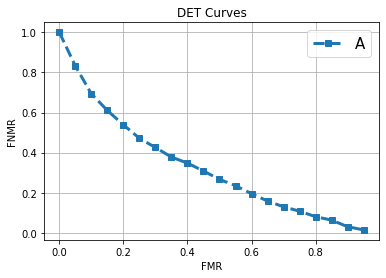

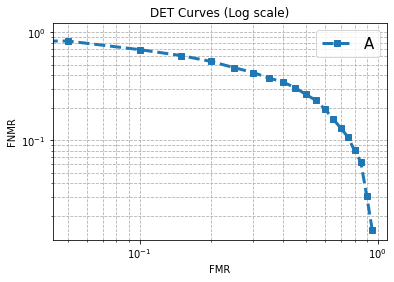

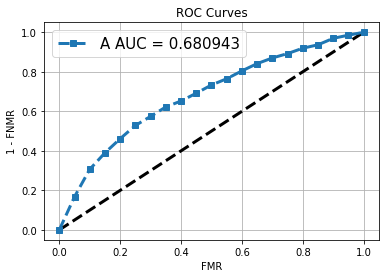

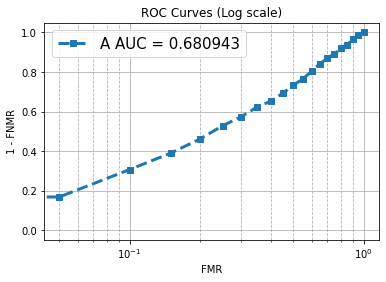

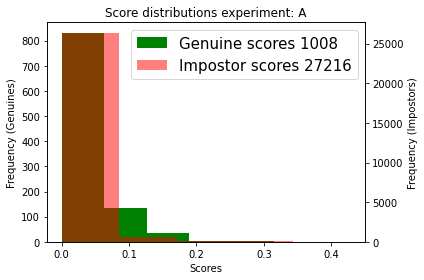

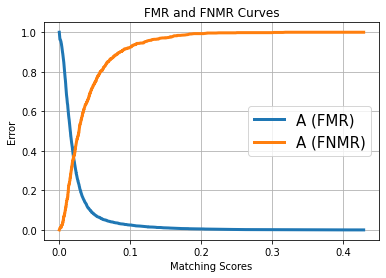

In [9]:
stat = get_eer_stats(genuine, imposter)
generate_eer_report([stat], ['A'], 'KAZE.html')
plot_eer_stats([stat], ['A'],save_plots=False,bins=5)

In [10]:
def plot_mk(stats, ids, hformat=False, bins=50,
                      lgf_size=15, save_plots=True, dpi=None,
                      save_path='', ext='.png'):

    for i, st in enumerate(stats):
        # Plotting score distributions
        title = 'Score distributions experiment: ' + ids[i]
        fig, ax1 = plt.subplots()

        ax1.grid(False)
        ax1.set_xlabel('Scores')
        ax1.set_title(title)
        ax1.set_ylabel('Frequency (Genuines)')
        # ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()
        ax2.set_ylabel('Frequency (Impostors)')

        if hformat:
            # Obtaining histogram
            m = max(st.gen_scores)
            x = np.arange(m)
            ghist = np.histogram(st.gen_scores, bins=np.arange(m + 1))[0]

            ax1.plot(x, ghist, color='g',
                     label='Genuine scores %d' % len(st.gen_scores))

            x = np.arange(len(st.imp_scores))
            ax2.plot(x, st.imp_scores, color='r',
                     label='Impostor scores %d' % sum(st.imp_scores))
        else:
            ax1.hist(st.gen_scores, bins=bins, color='g',
                     label='Genuine scores %d' % len(st.gen_scores))
            ax2.hist(st.imp_scores, bins=bins, alpha=0.5, color='r',
                     label='Impostor scores %d' % len(st.imp_scores))

        fig.legend(prop=FontProperties(size=lgf_size), bbox_to_anchor=(1, 1),
                   bbox_transform=ax1.transAxes)
        fig.tight_layout()

        if save_plots:
            fig_name = 'Distributions (%s)' % ids[i] + ext
            fig.savefig(join(save_path, fig_name), dpi=dpi)
            plt.close('all')
        else:
            plt.show()

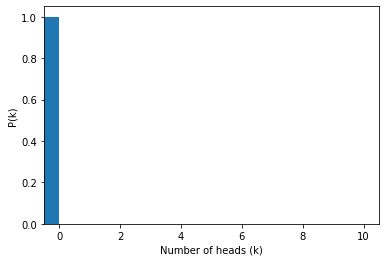

In [12]:
b = np.bincount(genuine,minlength=10)
p = b / float(b.sum())

plt.bar(np.arange(len(b)) - 0.5, p, width=1)
plt.xlim(-0.5, 10 + 0.5)
plt.xlabel("Number of heads (k)")
plt.ylabel("P(k)")

plt.show()

In [19]:
count = 0
total = 0
for i in range(length):
    total+=1
    if(float(id3[i]) >= 0.020057):
        count+=1

In [20]:
print("crr ="+str(count/total))

crr =0.3765235260770975
